In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.svm import OneClassSVM as OCSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor as LOF

from SupervisedAD_methods import *
from kdd import *

# Data Preprocessing

In [2]:
path_train = '../../data/KDDTrain+.txt'

df = get_df(path_train, columns=columns, drop=False)
df

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
125968                         0.00                  1.00   
125969                         0.00                  0.00   
125970                         0.00                  0.72   
125971                         0.00                  1.00   
125972                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
125968                      1.00                  0.00   
125969                      0.00                  0.00   
125970                      0.00                  0.01   
125971                      1.00                  0.00   
125972                      0.00                  0.00   

        dst_host_srv_rerror_rate   attack  level  
0                           

In [3]:
path_test = '../../data/KDDTest+.txt'

test_df = get_df(path_test, columns=columns, drop=False)
test_df

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                   0       0    0  ...                    0.04   
1                   0       0    0  ...                    0.00   
2                   0       0    0  ...                    0.61   
3                   0       0    0  ...                    1.00   
4                   0       0    0  ...                    0.31   
...               ...     ...  ...  ...                     ...   
22539               0       0    0  ...                    0.72   
22540               0       0    0  ...                    1.00   
22541               0       0    2  ...                    1.00   
22542               0       0    0  ...                    0.99   
22543               0       0    0  ...                    0.08   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.06                         0.00   
1                        0.06                         0.00   
2                        0.04                         0.61   
3                        0.00                         1.00   
4                        0.17                         0.03   
...                       ...                          ...   
22539                    0.06                         0.01   
22540                    0.00                         0.01   
22541                    0.00                         0.00   
22542                    0.01                         0.00   
22543                    0.03                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.02                  0.00   
3                             0.28                  0.00   
4                             0.02                  0.00   
...                            ...                   ...   
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.0                  1.00   
1                           0.0                  1.00   
2                           0.0                  0.00   
3                           0.0                  0.00   
4                           0.0                  0.83   
...                         ...                   ...   
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate   attack  level  
0                          1.00  neptune     21  
1                         

In [4]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [5]:
data_train, data_test = feat_eng(df, test_df)
data_train

protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0                    False               True              False        False   
1                    False              False               True        False   
2                    False               True              False        False   
3                    False               True              False        False   
4                    False               True              False        False   
...                    ...                ...                ...          ...   
125968               False               True              False        False   
125969               False              False               True        False   
125970               False               True              False        False   
125971               False               True              False        False   
125972               False               True              False        False   

        service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0             False           False        False         False        False   
1             False           False        False         False        False   
2             False           False        False         False        False   
3             False           False        False         False        False   
4             False           False        False         False        False   
...             ...             ...          ...           ...          ...   
125968        False           False        False         False        False   
125969        False           False        False         False        False   
125970        False           False        False         False        False   
125971        False           False        False         False        False   
125972        False           False        False         False        False   

        service_courier  ...  serror_rate  duration  su_attempted  \
0                 False  ...          0.0         0             0   
1                 False  ...          0.0         0             0   
2                 False  ...          1.0         0             0   
3                 False  ...          0.2         0             0   
4                 False  ...          0.0         0             0   
...                 ...  ...          ...       ...           ...   
125968            False  ...          1.0         0             0   
125969            False  ...          0.0         8             0   
125970            False  ...          0.0         0             0   
125971            False  ...          1.0         0             0   
125972            False  ...          0.0         0             0   

        is_host_login  num_root  dst_host_same_srv_rate  \
0                   0         0                    0.17   
1                   0         0                    0.00   
2                   0         0                    0.10   
3                   0         0                    1.00   
4                   0         0                    1.00   
...               ...       ...                     ...   
125968              0         0                    0.10   
125969              0         0                    0.96   
125970              0         0                    0.12   
125971              0         0                    0.03   
125972              0         0                    0.30   

        dst_host_diff_srv_rate  num_compromised  srv_rerror_rate  \
0                         0.03                0              0.0   
1                         0.60                0              0.0   
2                         0.05                0              0.0   
3                         0.00                0              0.0   
4                         0.00                0              0.0   
...                        ...              ...              ...   
125968                    0.06                0              0.0   
1259

In [6]:
df['attack_map'].value_counts()

attack_map
0    67343
1    45927
2    11656
4      995
3       52
Name: count, dtype: int64

In [7]:
test_df['attack_map'].value_counts()

attack_map
0    9844
1    7460
4    2752
2    2421
3      67
Name: count, dtype: int64

In [8]:
scaler = StandardScaler()

x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

In [9]:
num_normal = np.sum(y)
print("Baseline train AUPR: ", 1 - num_normal/len(y))

num_normal = np.sum(y_test)
print("Baseline overall AUPR: ", 1 - num_normal/len(y_test))

val_counts = test_df['attack_map'].value_counts()[1:]

for att in new_attacks:
    num_att = val_counts[att]
    print(f"Baseline AUPR {att}: ", num_att/(num_normal + num_att))

Baseline train AUPR:  0.4054648185750861
Baseline overall AUPR:  0.5692423704755145
Baseline AUPR 1:  0.43445343893774385
Baseline AUPR 2:  0.19955489614243324
Baseline AUPR 3:  0.0068521169973409695
Baseline AUPR 4:  0.2208136082805103


# Modelling

## Shallow Models

In [10]:
from sklearn.model_selection import GridSearchCV
def cross_validate(x_train, y, 
#                    x_test_input, y_test, 
                   model, model_name, params):
    
    gridsearch = GridSearchCV(model, params, cv=3)
    gridsearch.fit(x_train, y)

#     print("Train")
#     y_pred = gridsearch.predict_proba(x_train)[:, 1]
#     eval_plot(y, y_pred, model_name)

#     print("Test")
#     y_pred = gridsearch.predict_proba(x_test_input)[:, 1]
#     eval_plot(y_test, y_pred, model_name)

#     y_pred_pos = y_pred[y_test == 1]
#     y_pred_neg = y_pred[y_test == 0]
#     plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
#     plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
#     plt.legend()
#     plt.show()

    return gridsearch.best_params_

## SVM

{'C': 100.0, 'class_weight': None}


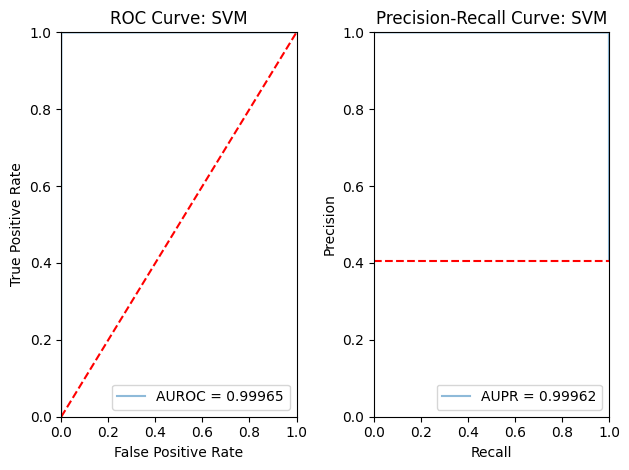

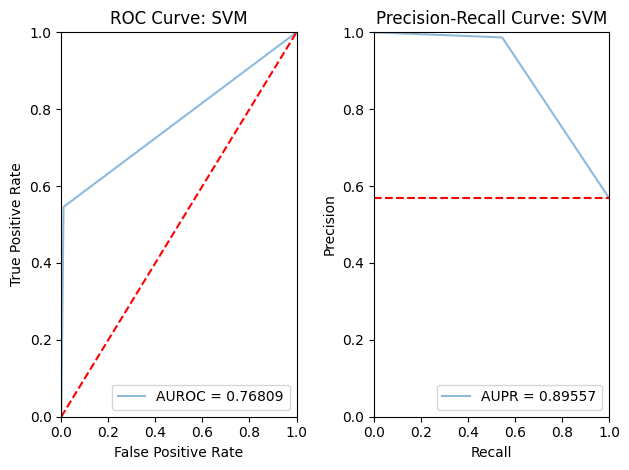

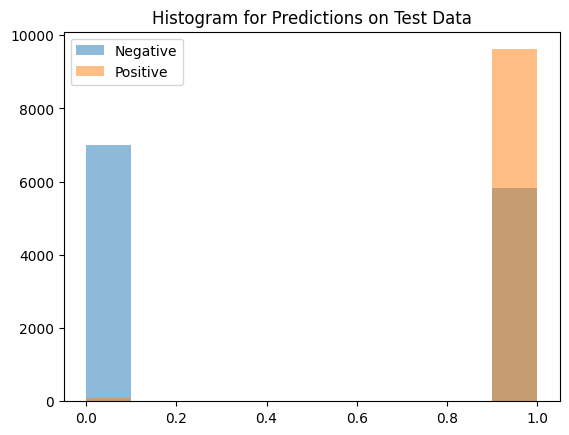

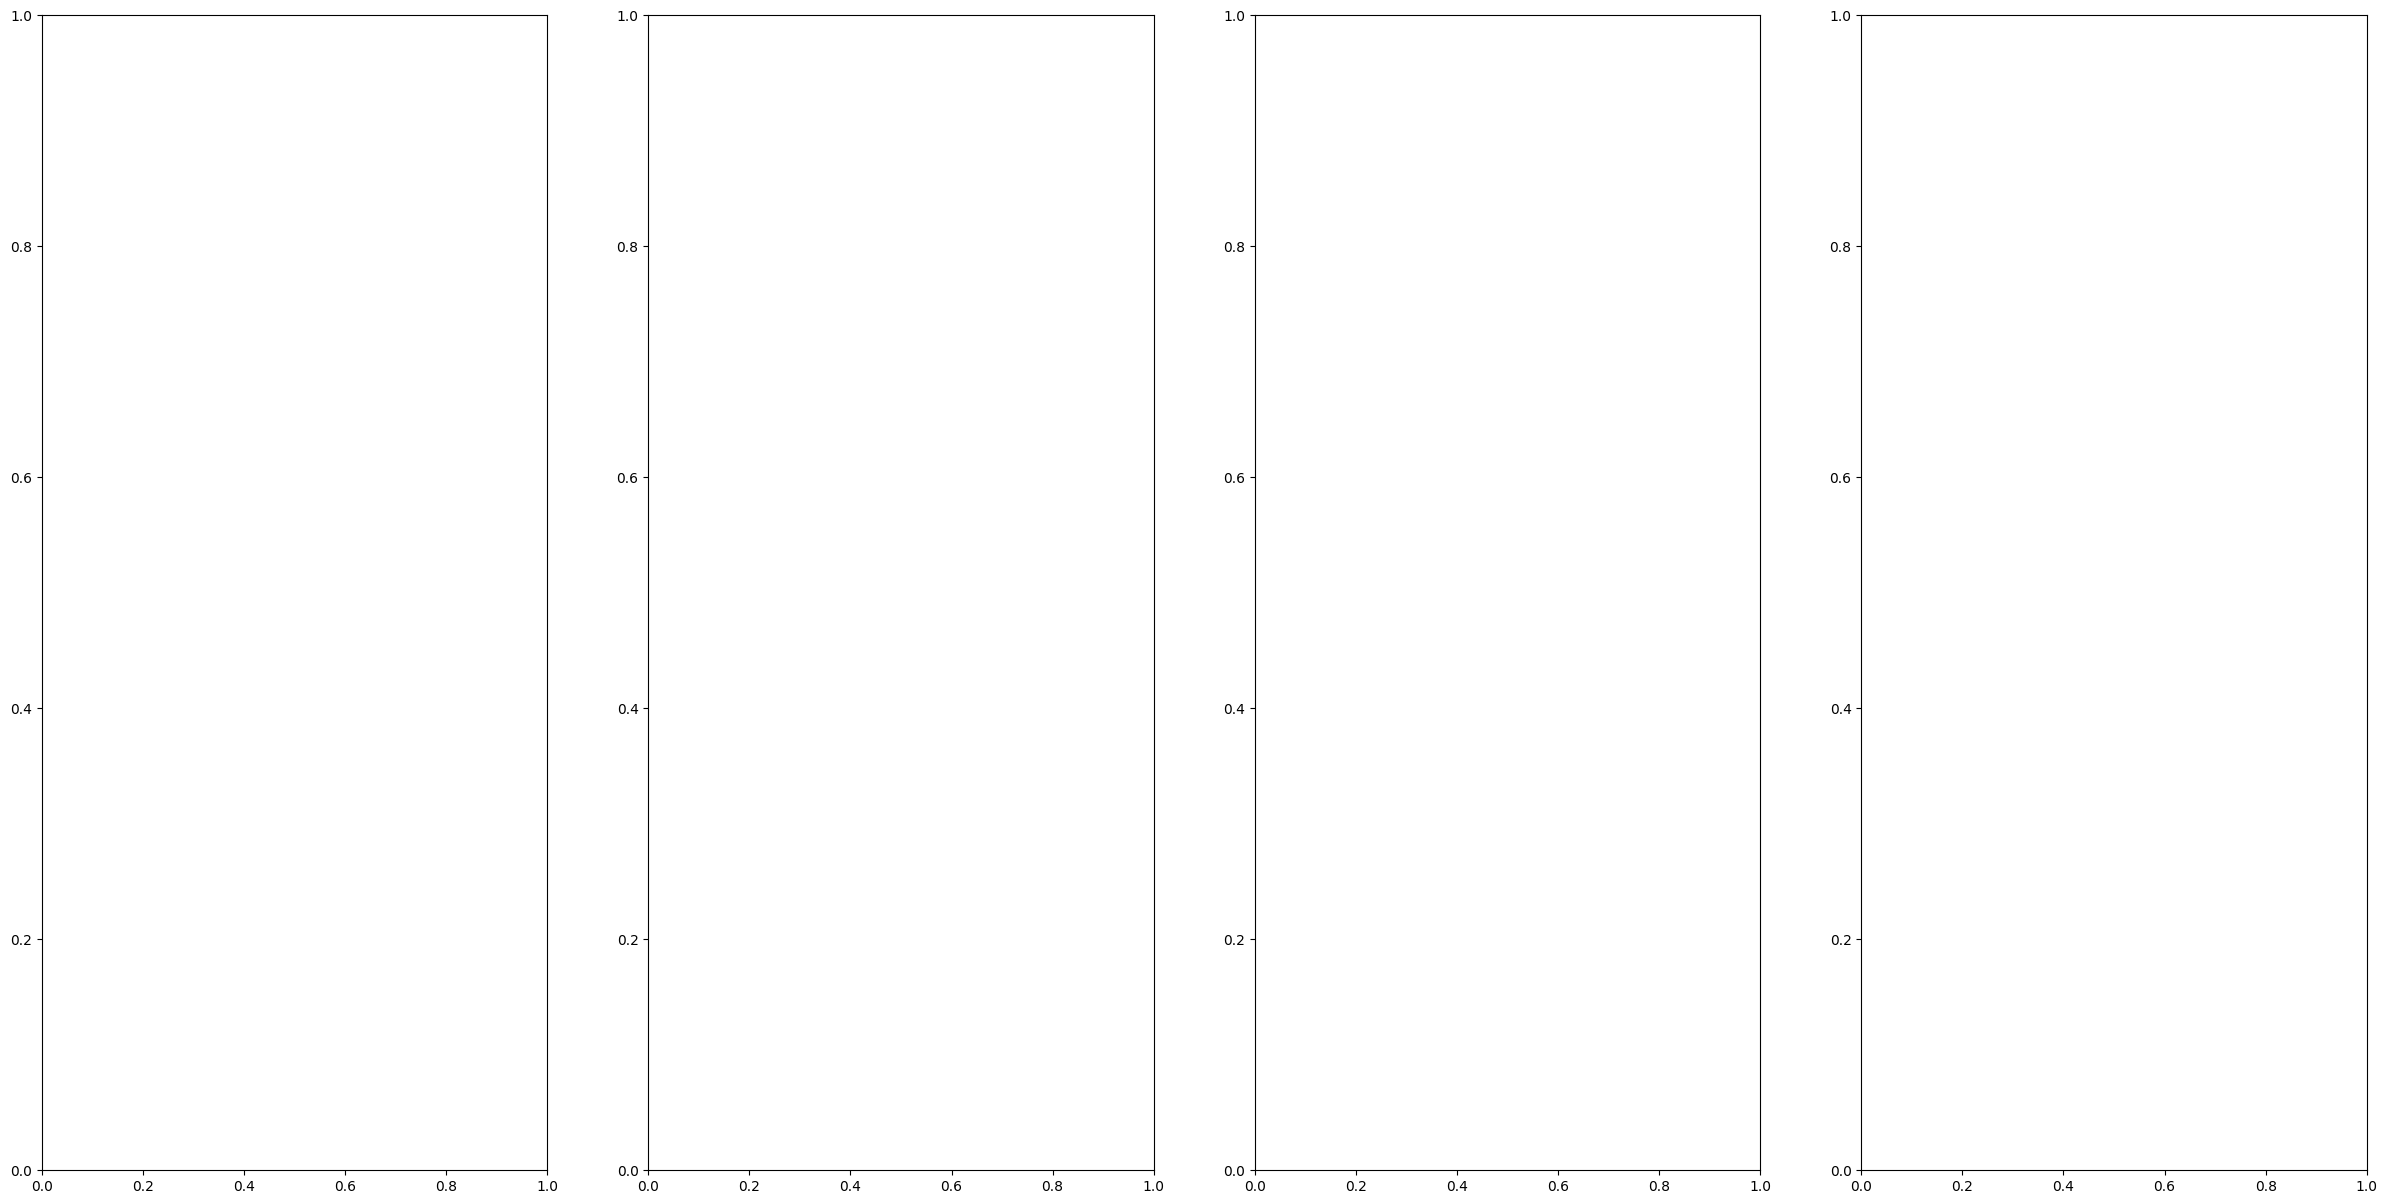

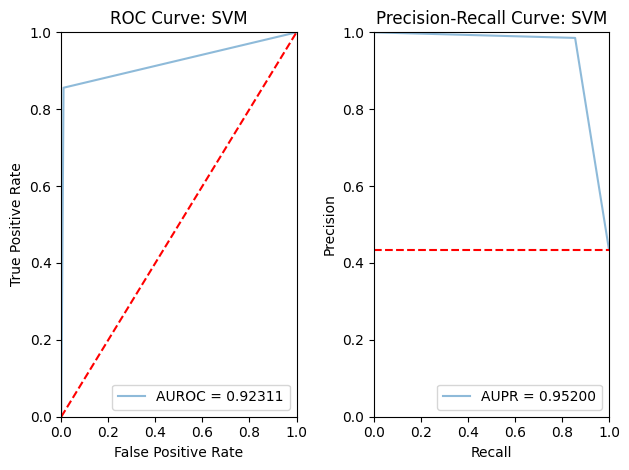

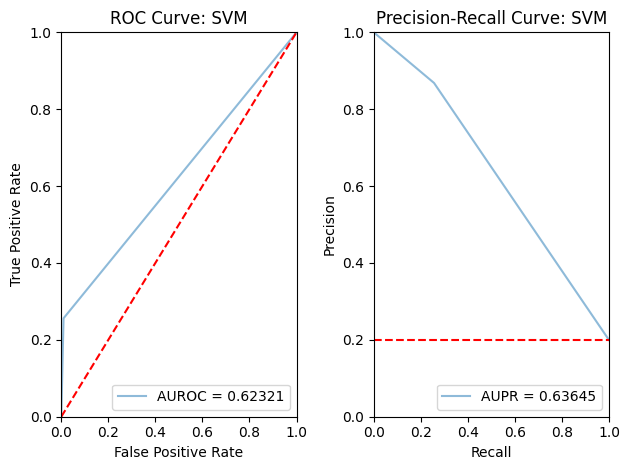

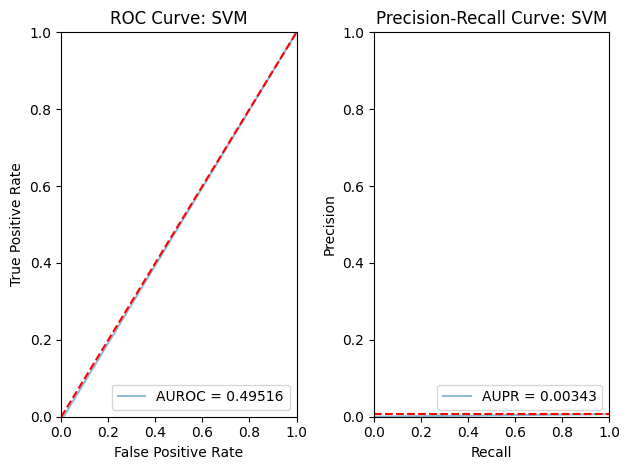

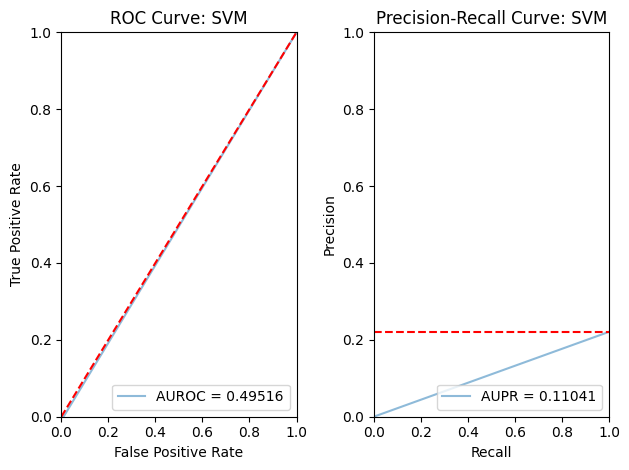

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


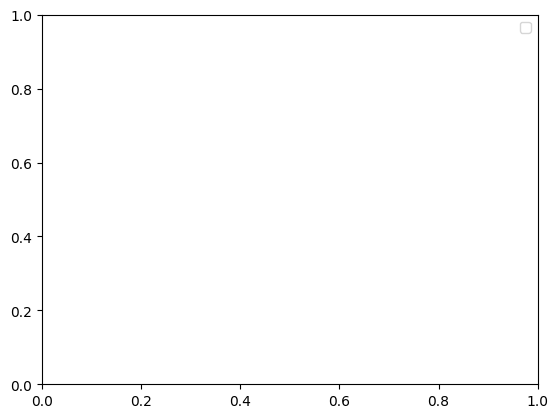

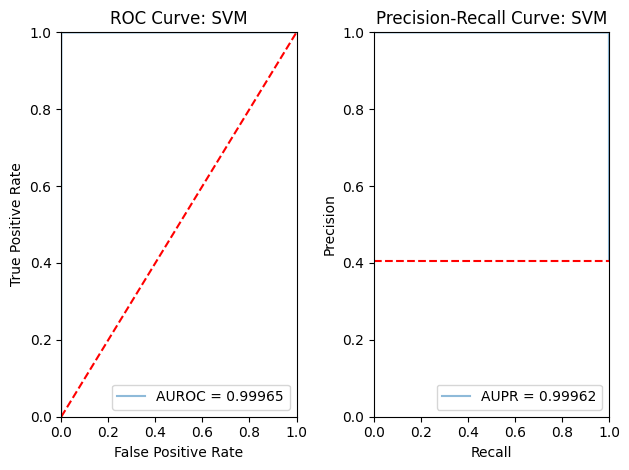

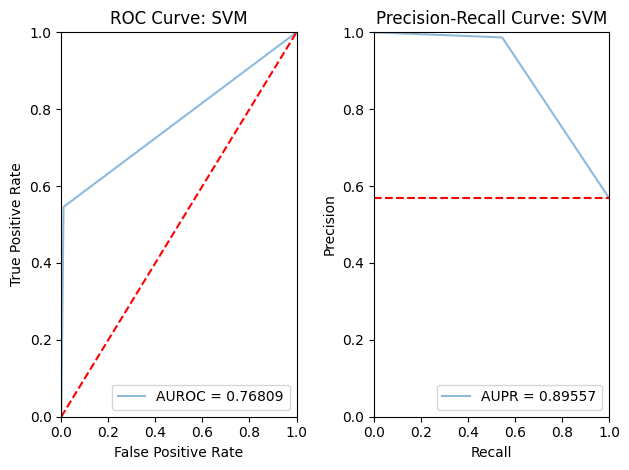

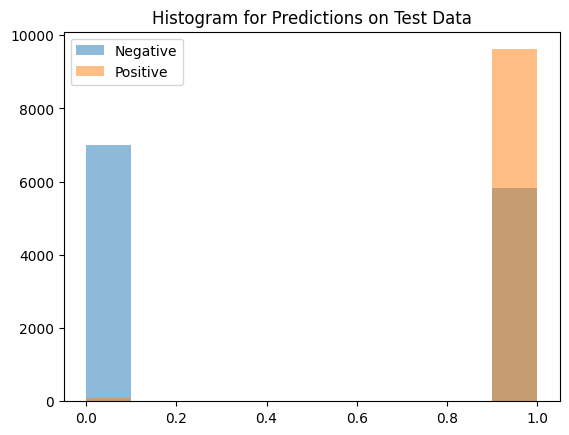

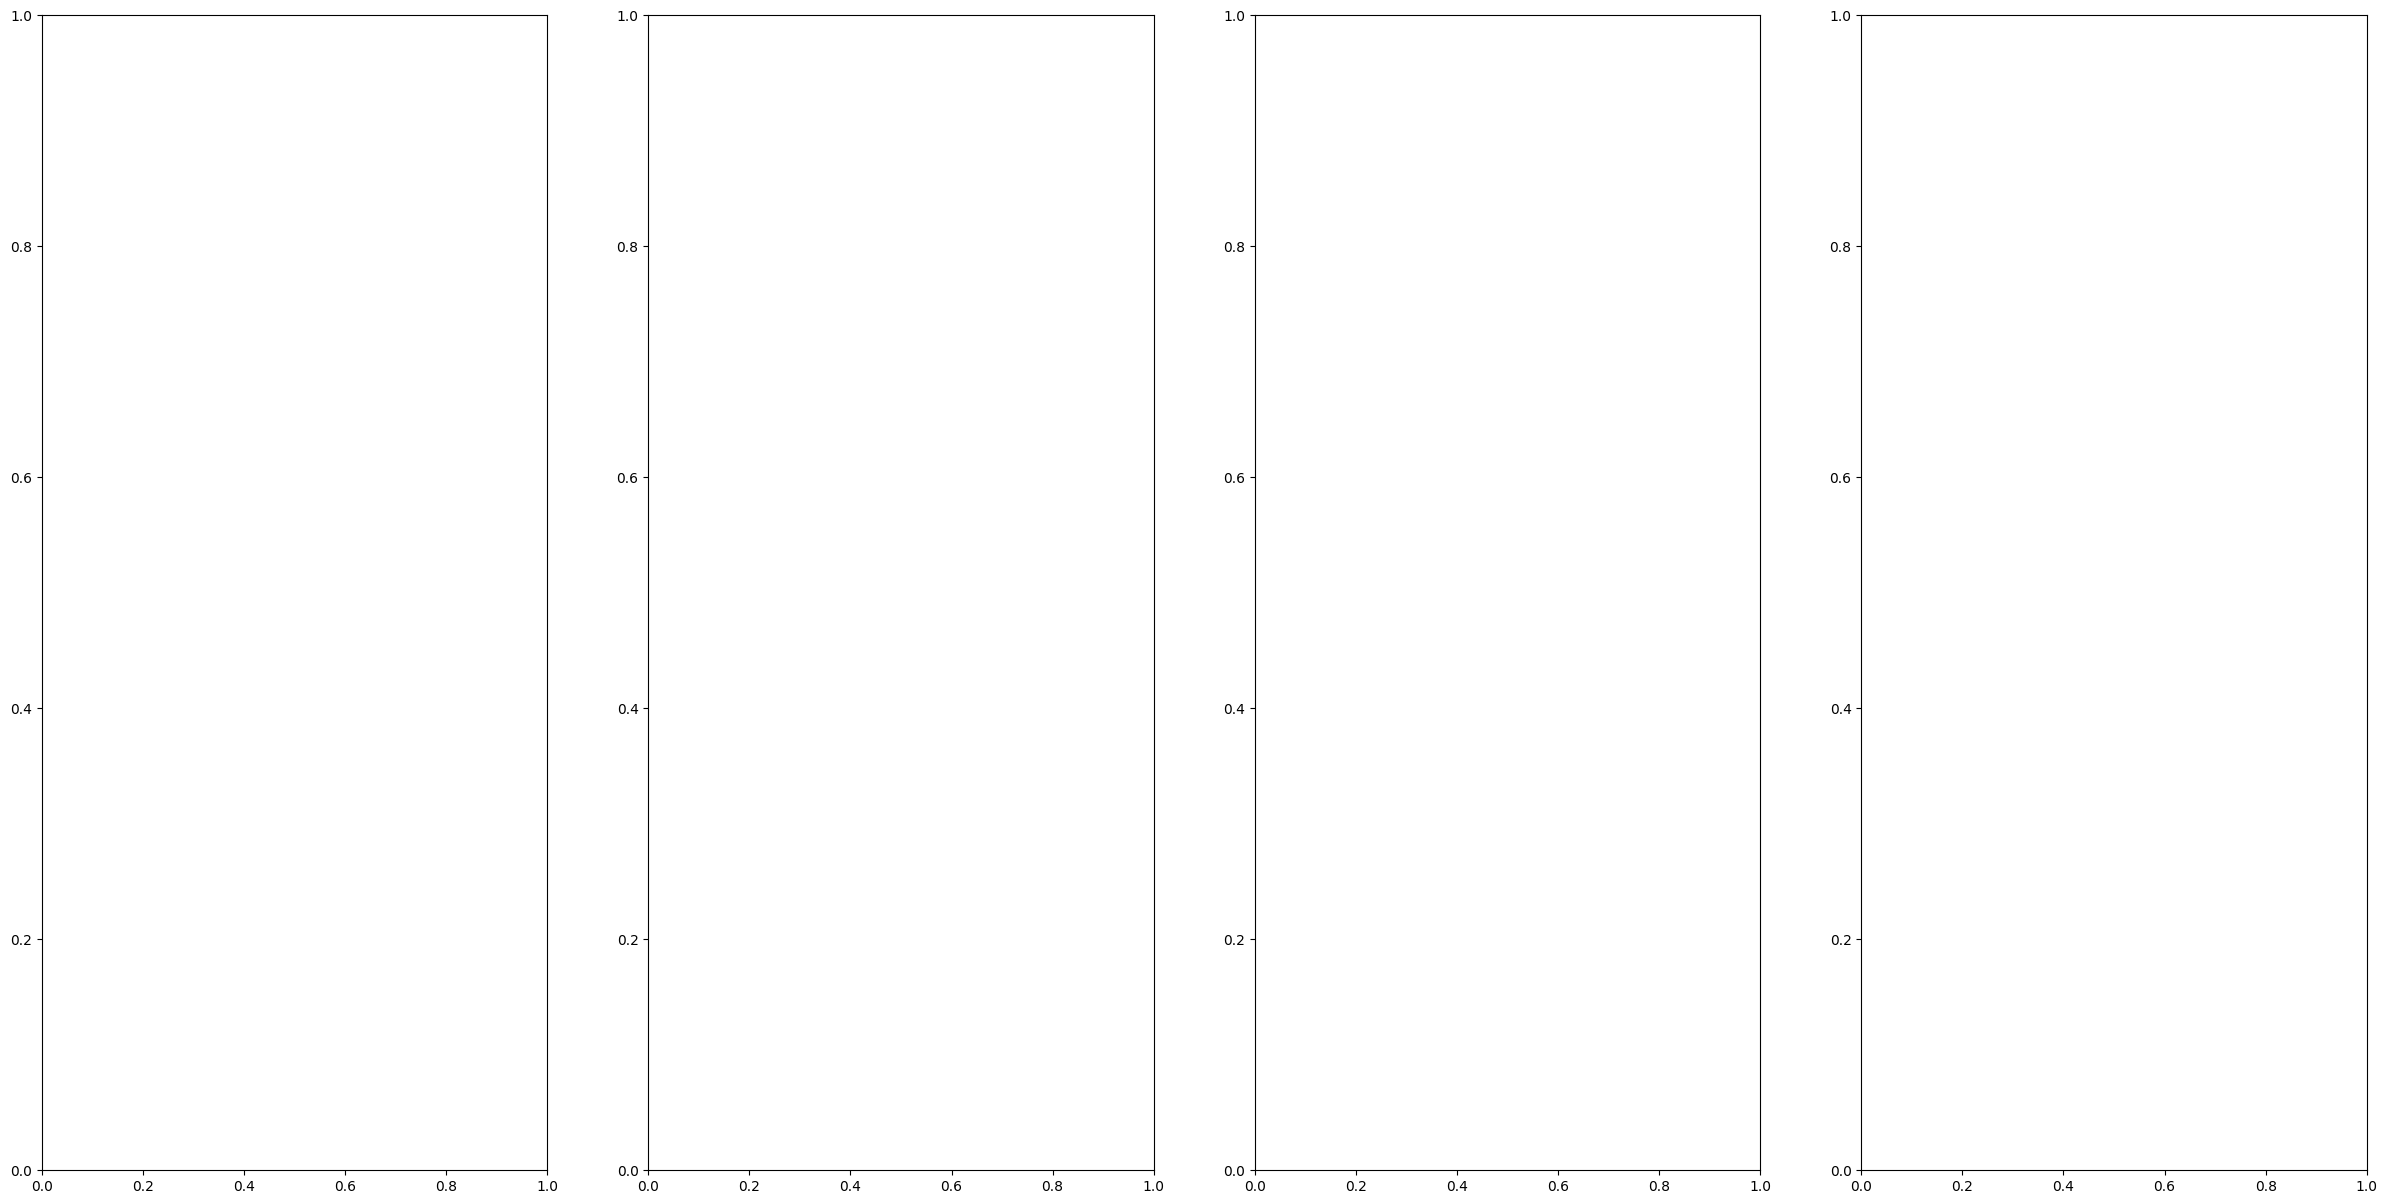

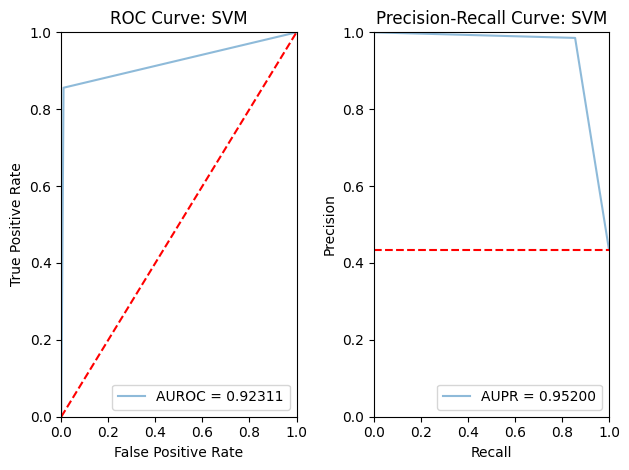

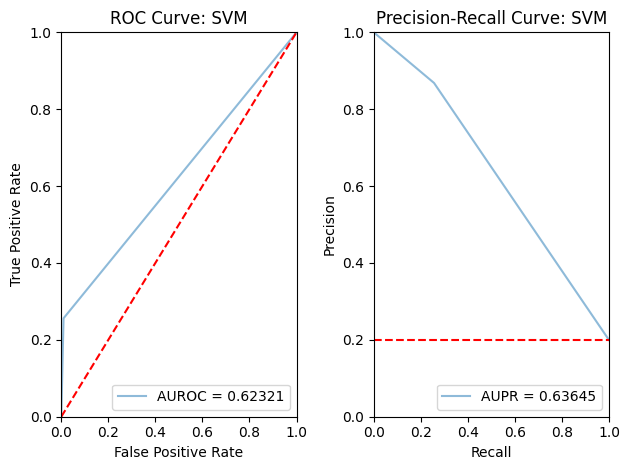

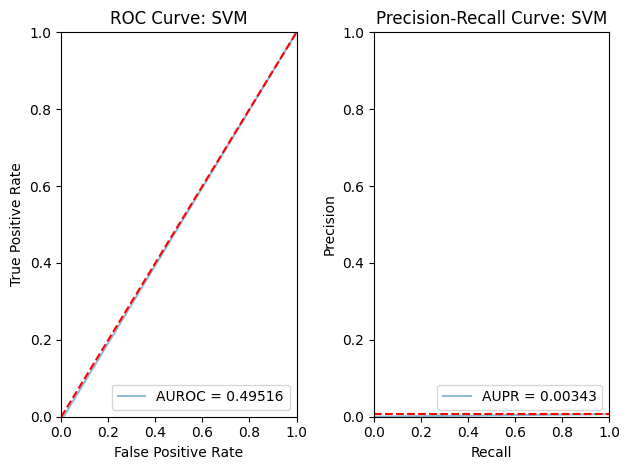

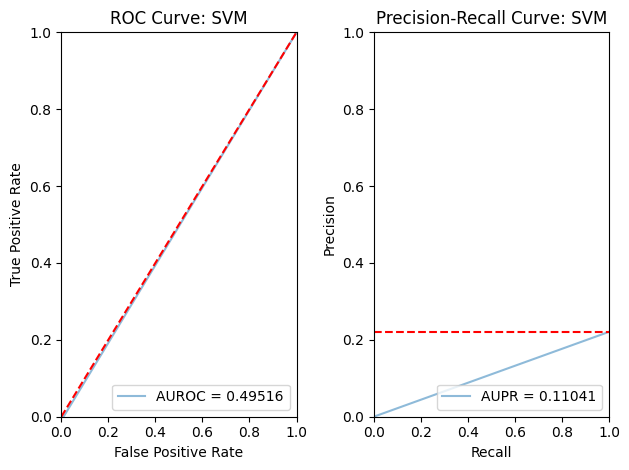

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


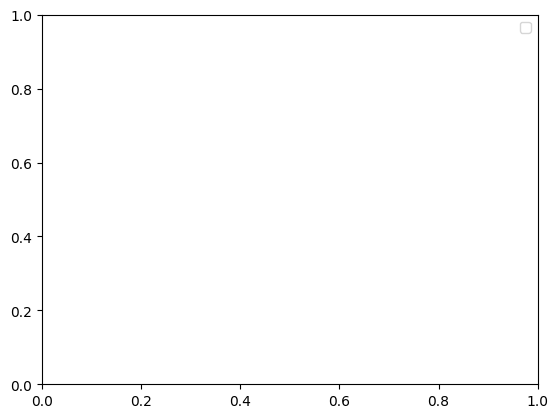

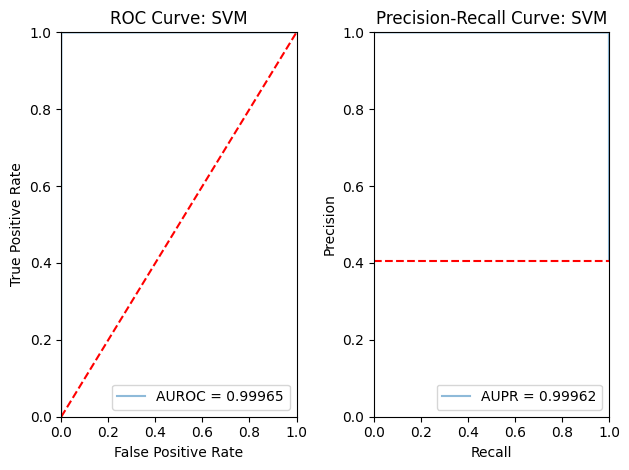

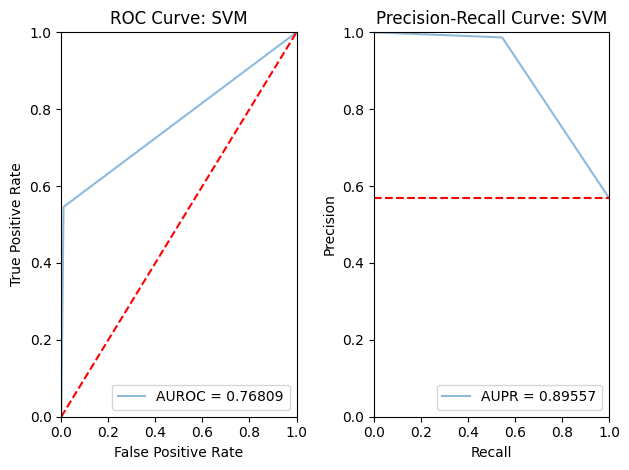

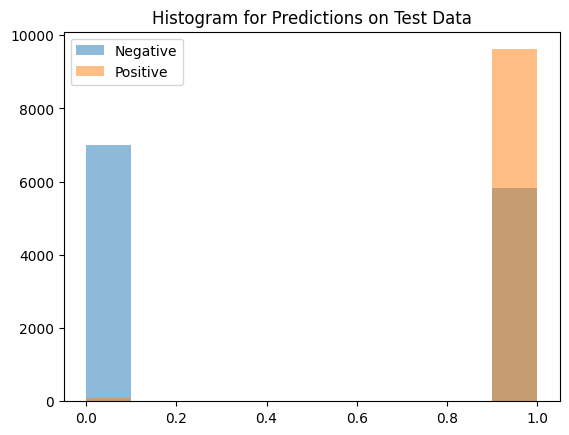

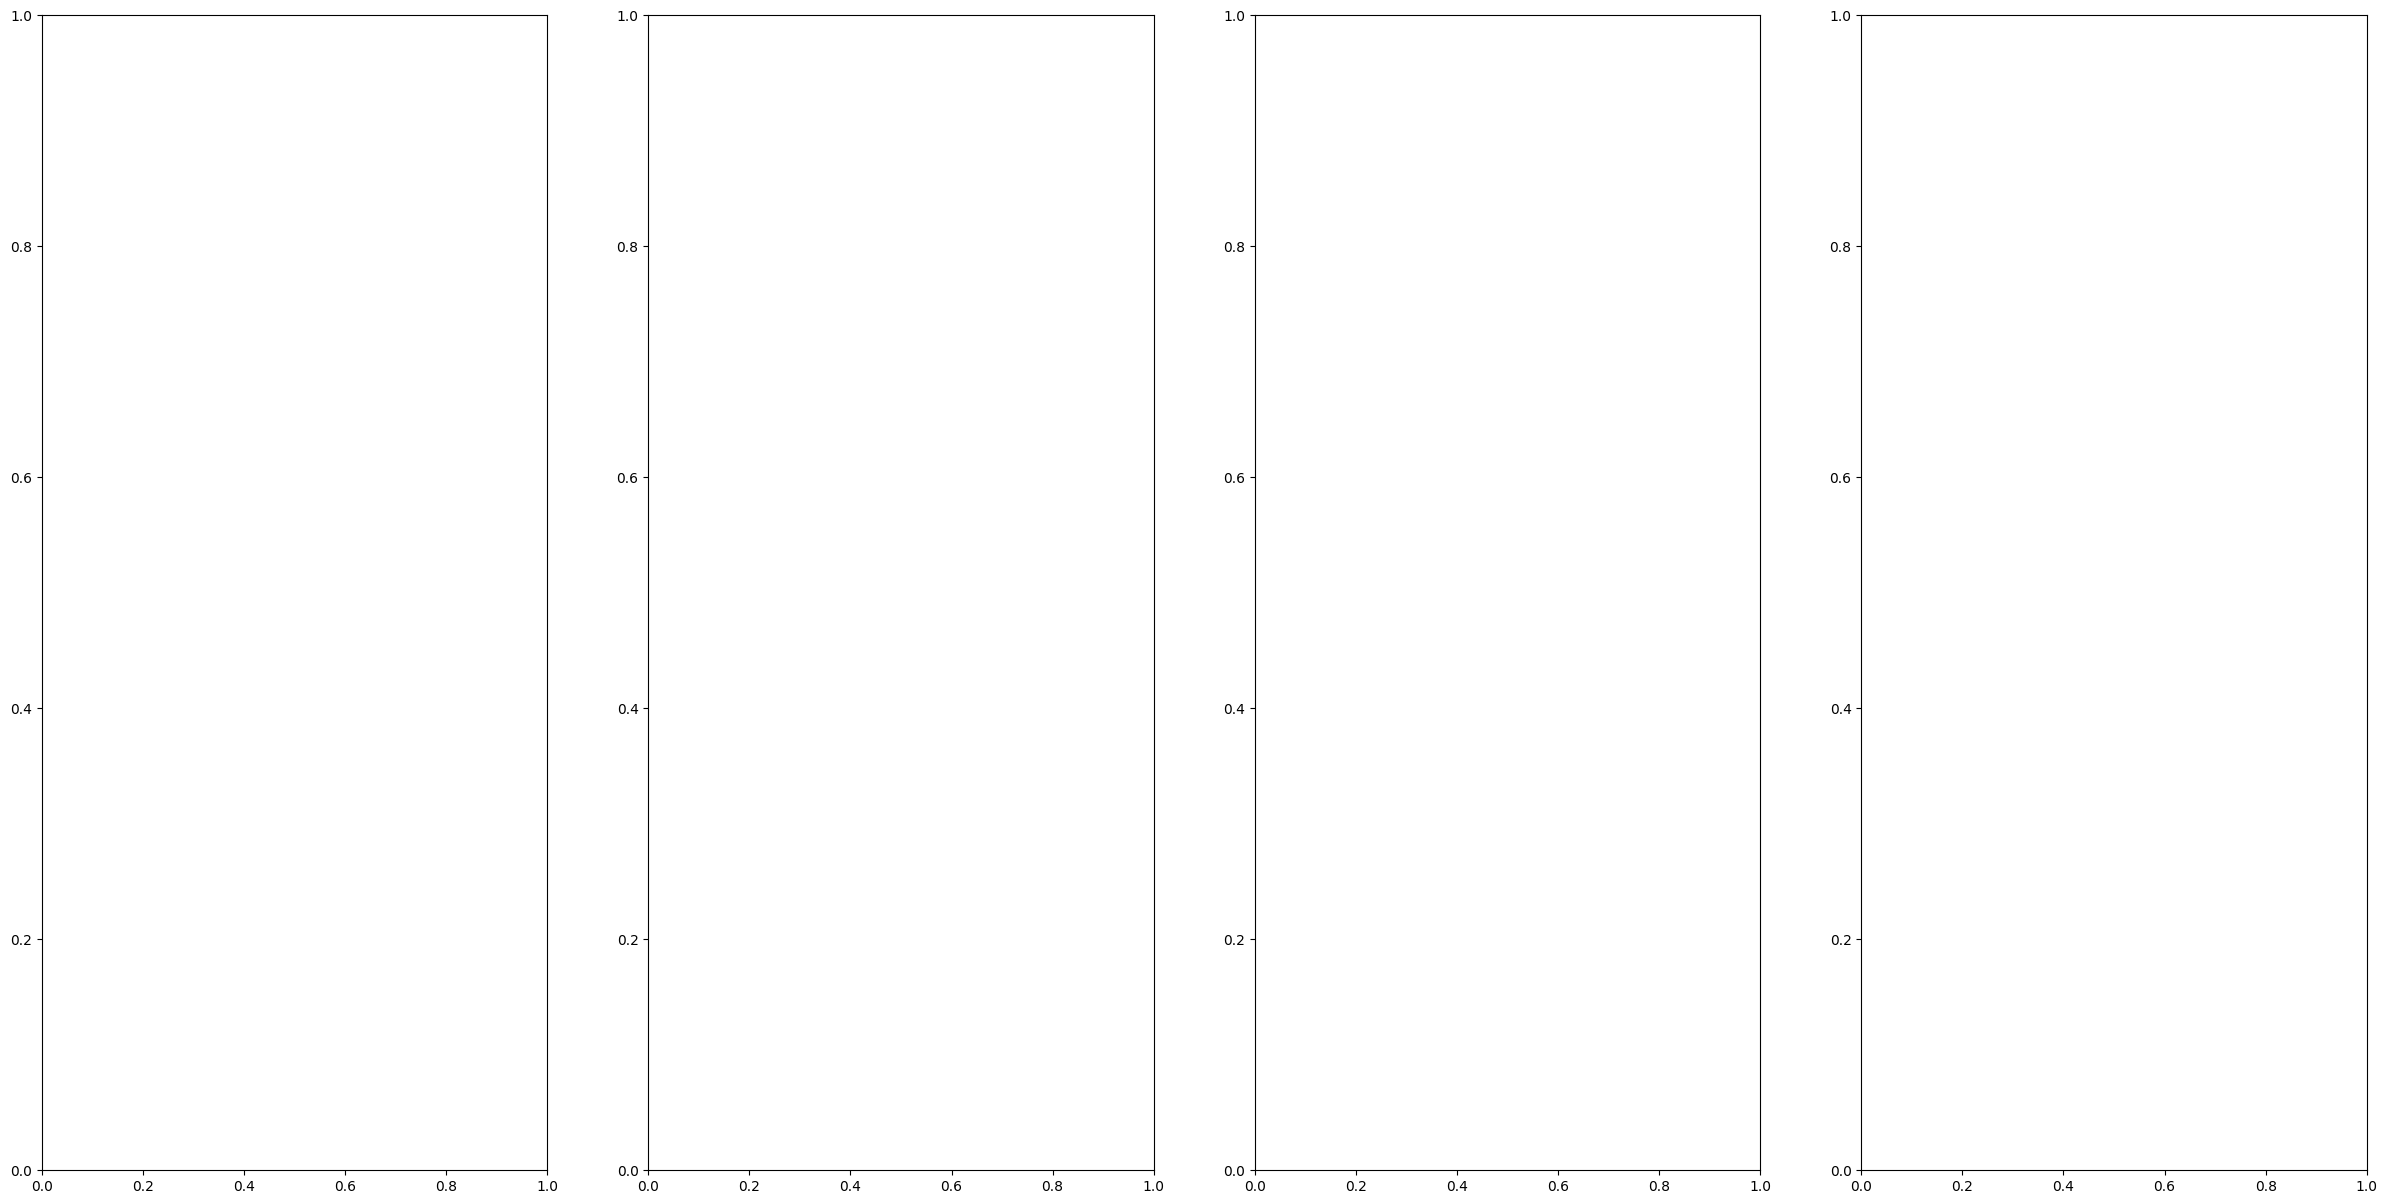

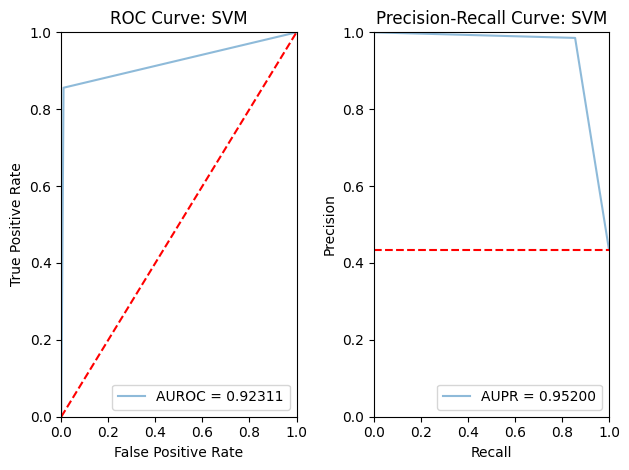

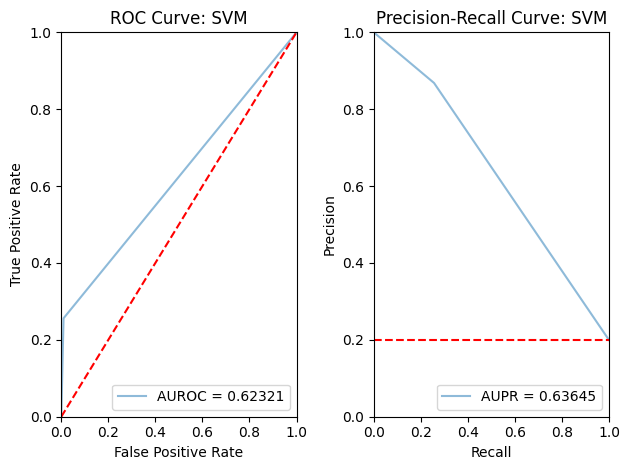

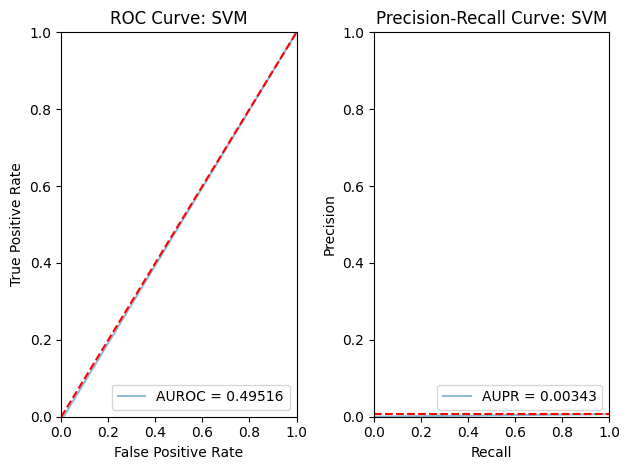

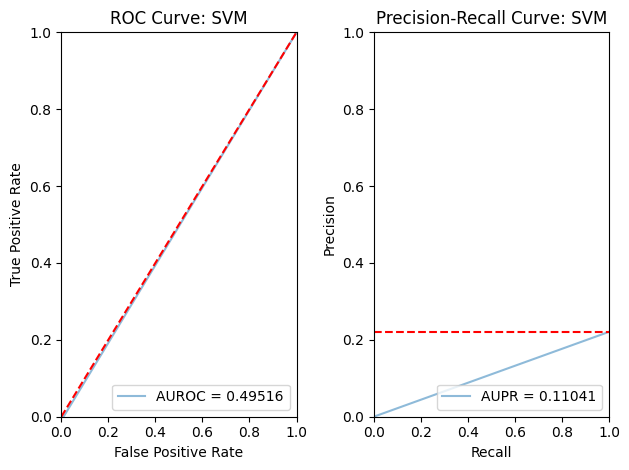

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


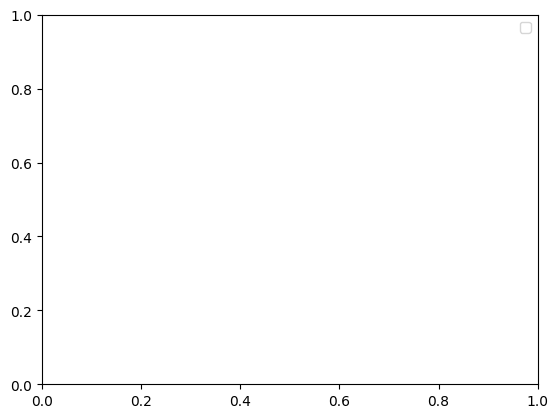

AUPR (Train): 0.9996155218919217+-0.0
AUPR (Test): 0.8955668554431572+-1.1102230246251565e-16


0         1         2  AUPR Mean      AUPR Std
1  0.951998  0.951998  0.951998   0.951998  1.359740e-16
2  0.636445  0.636445  0.636445   0.636445  0.000000e+00
3  0.003426  0.003426  0.003426   0.003426  0.000000e+00
4  0.110407  0.110407  0.110407   0.110407  0.000000e+00

([0.9996155218919217, 0.9996155218919217, 0.9996155218919217],
 [0.8955668554431571, 0.8955668554431571, 0.8955668554431571],
 {0: [0.9519976337057761,
   0.6364451209243179,
   0.0034260584986704847,
   0.11040680414025515],
  1: [0.9519976337057761,
   0.6364451209243179,
   0.0034260584986704847,
   0.11040680414025515],
  2: [0.9519976337057761,
   0.6364451209243179,
   0.0034260584986704847,
   0.11040680414025515]})

In [11]:
model_name = 'SVM'
model = SVC(probability=True, kernel='rbf', random_state=0)

params = {"C": [0.01, 1., 100.], "class_weight": [None, "balanced"]}

best_params = cross_validate(X, y, model, model_name, params)
print(best_params)

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
    svm = SVC(random_state=N, **best_params)
    svm.fit(X, y)
    y_train = svm.predict(X)
    y_pred = svm.predict(x_test)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack

print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

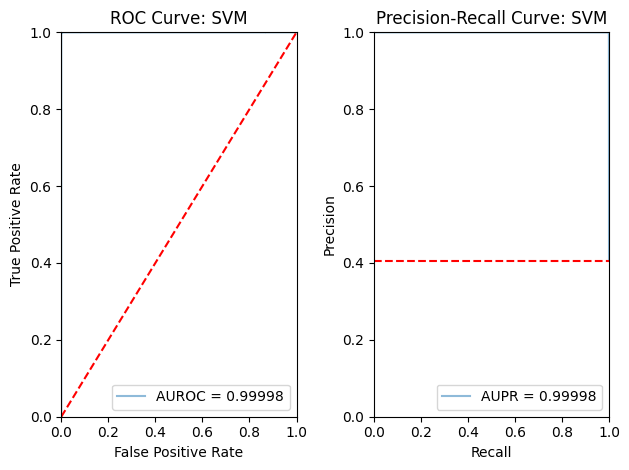

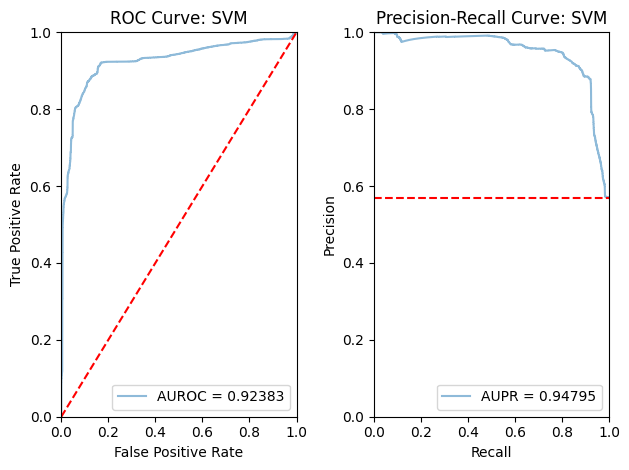

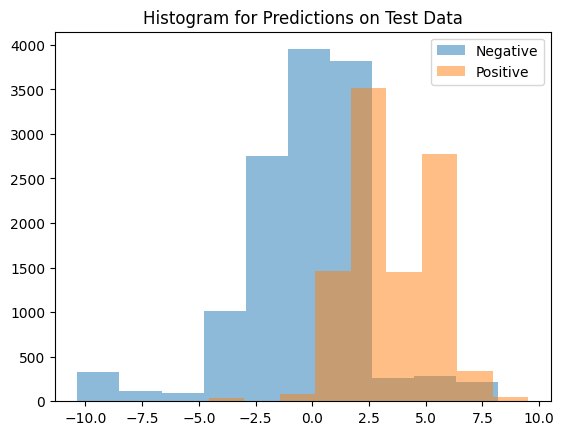

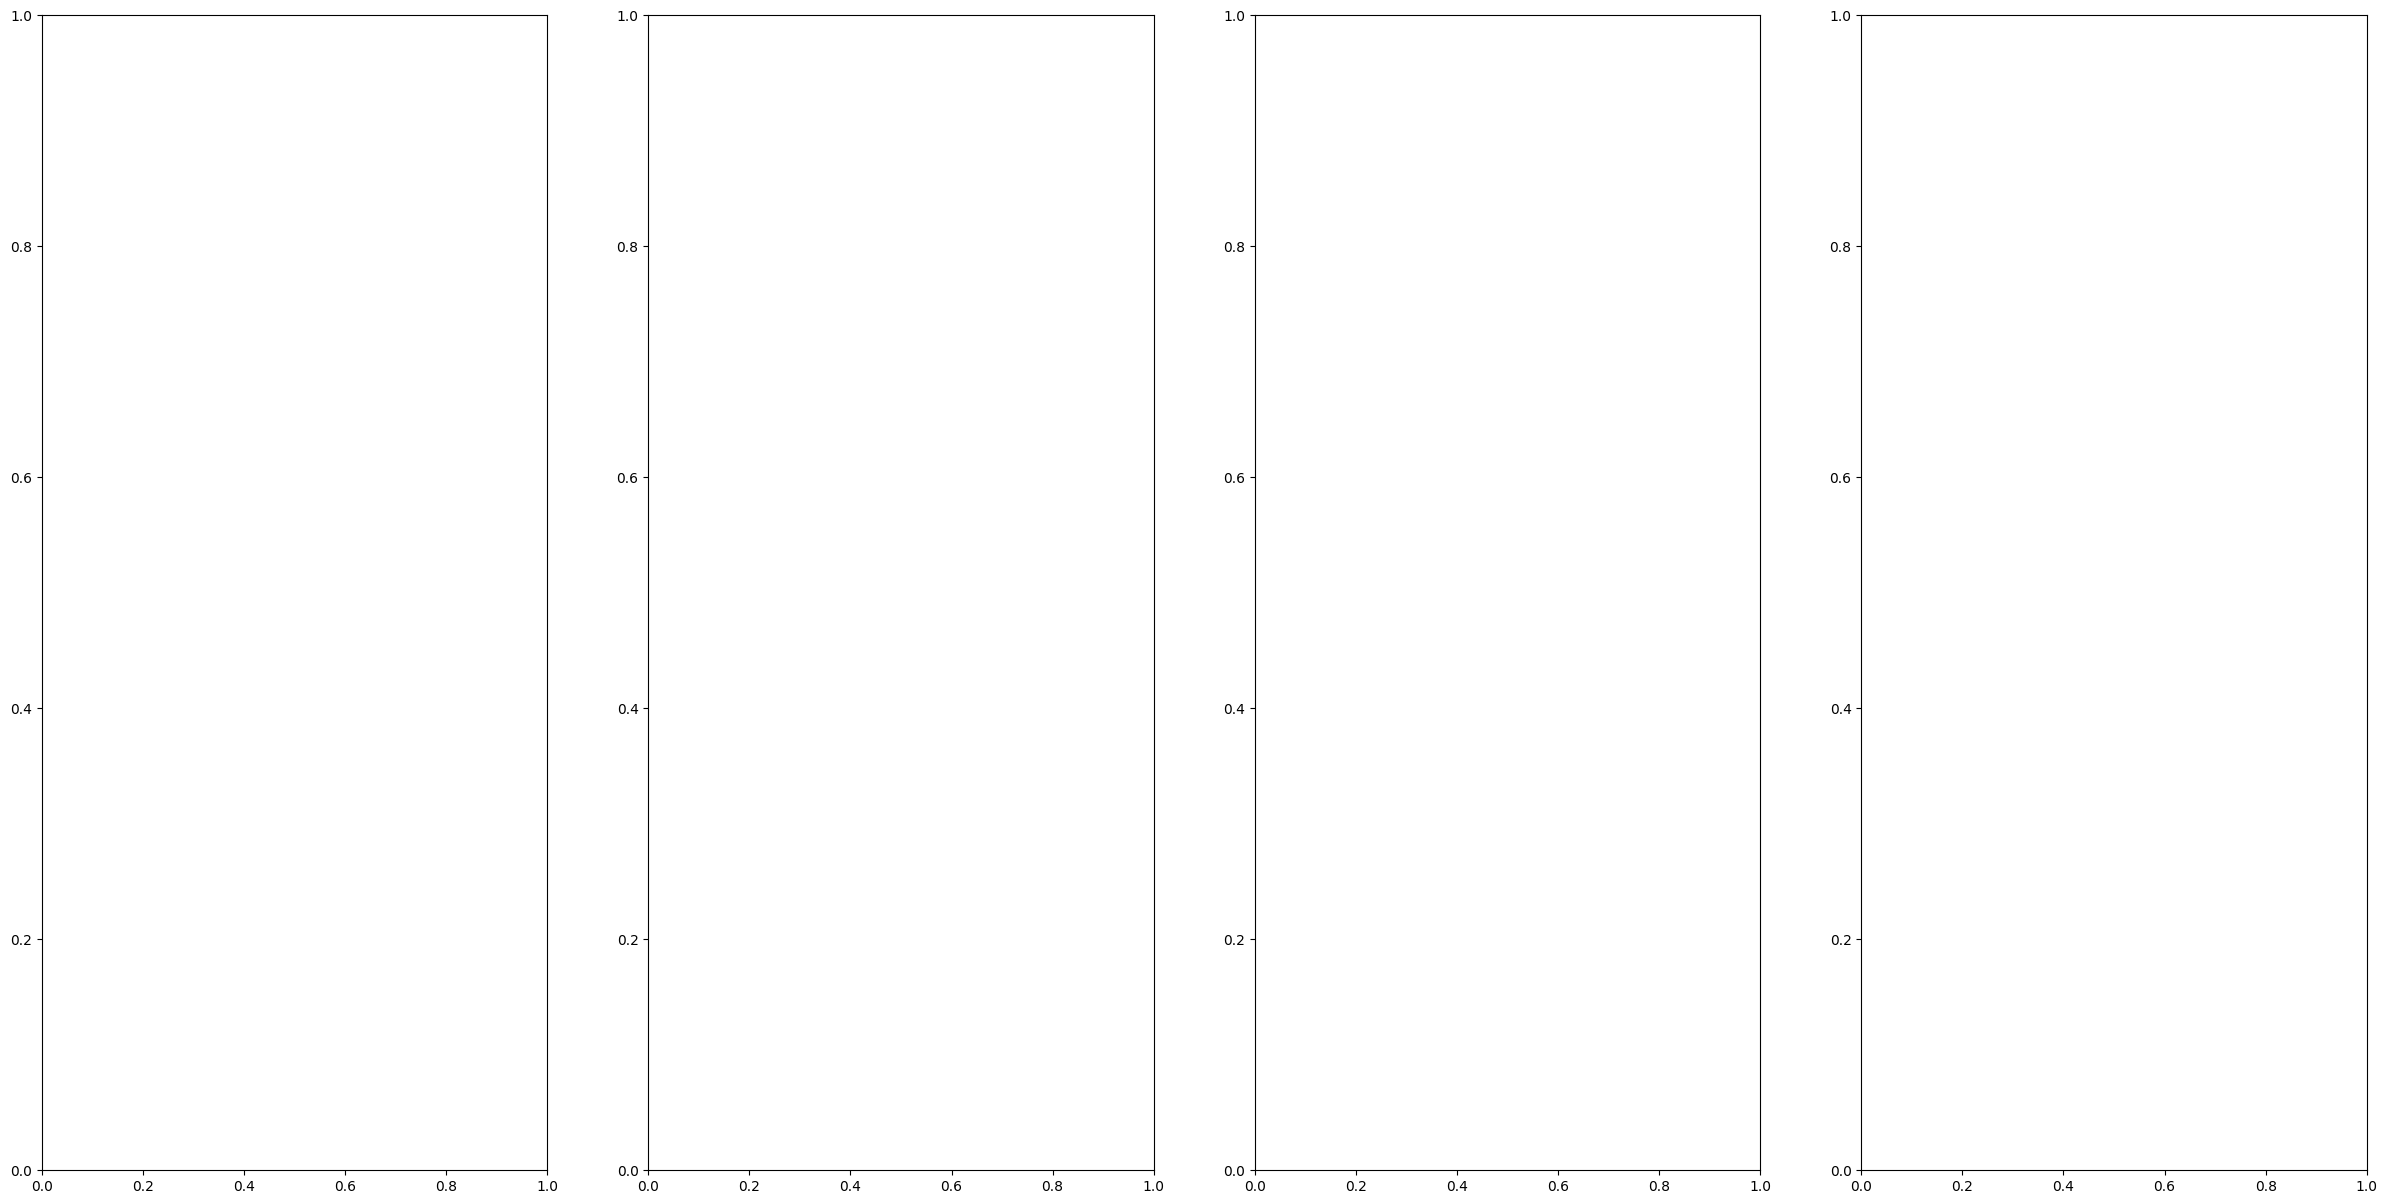

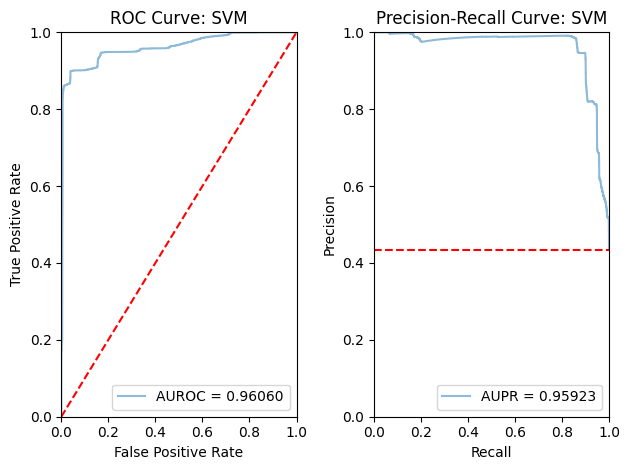

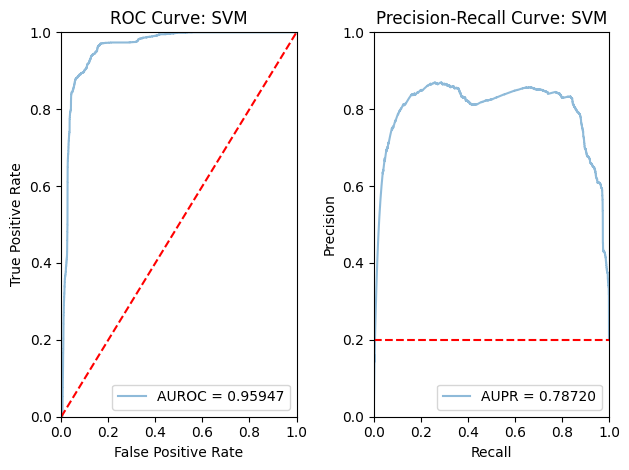

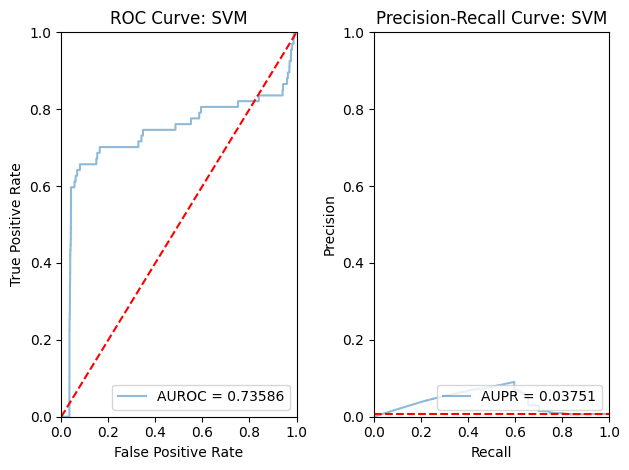

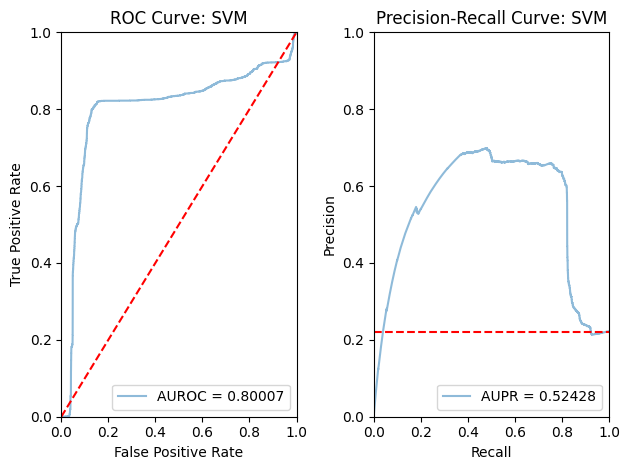

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


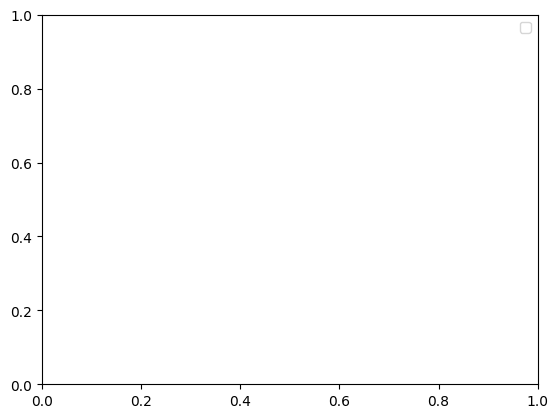

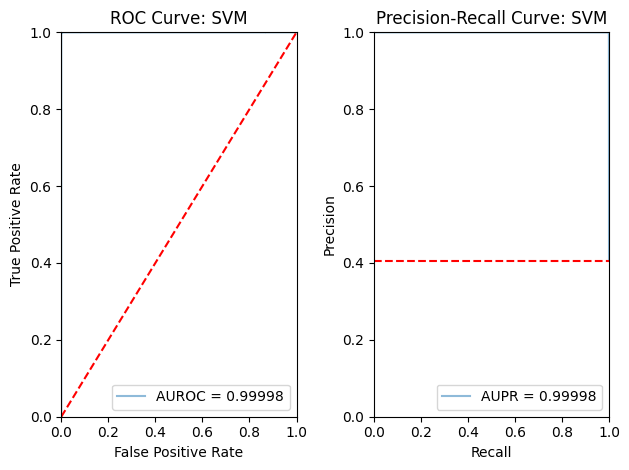

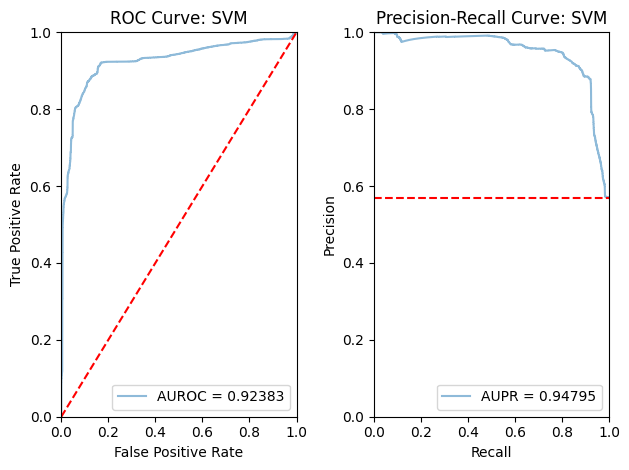

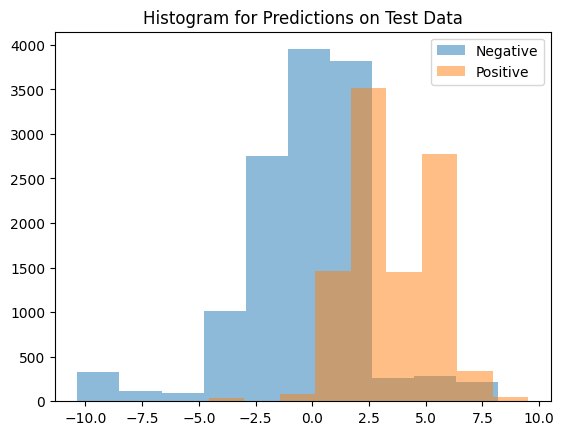

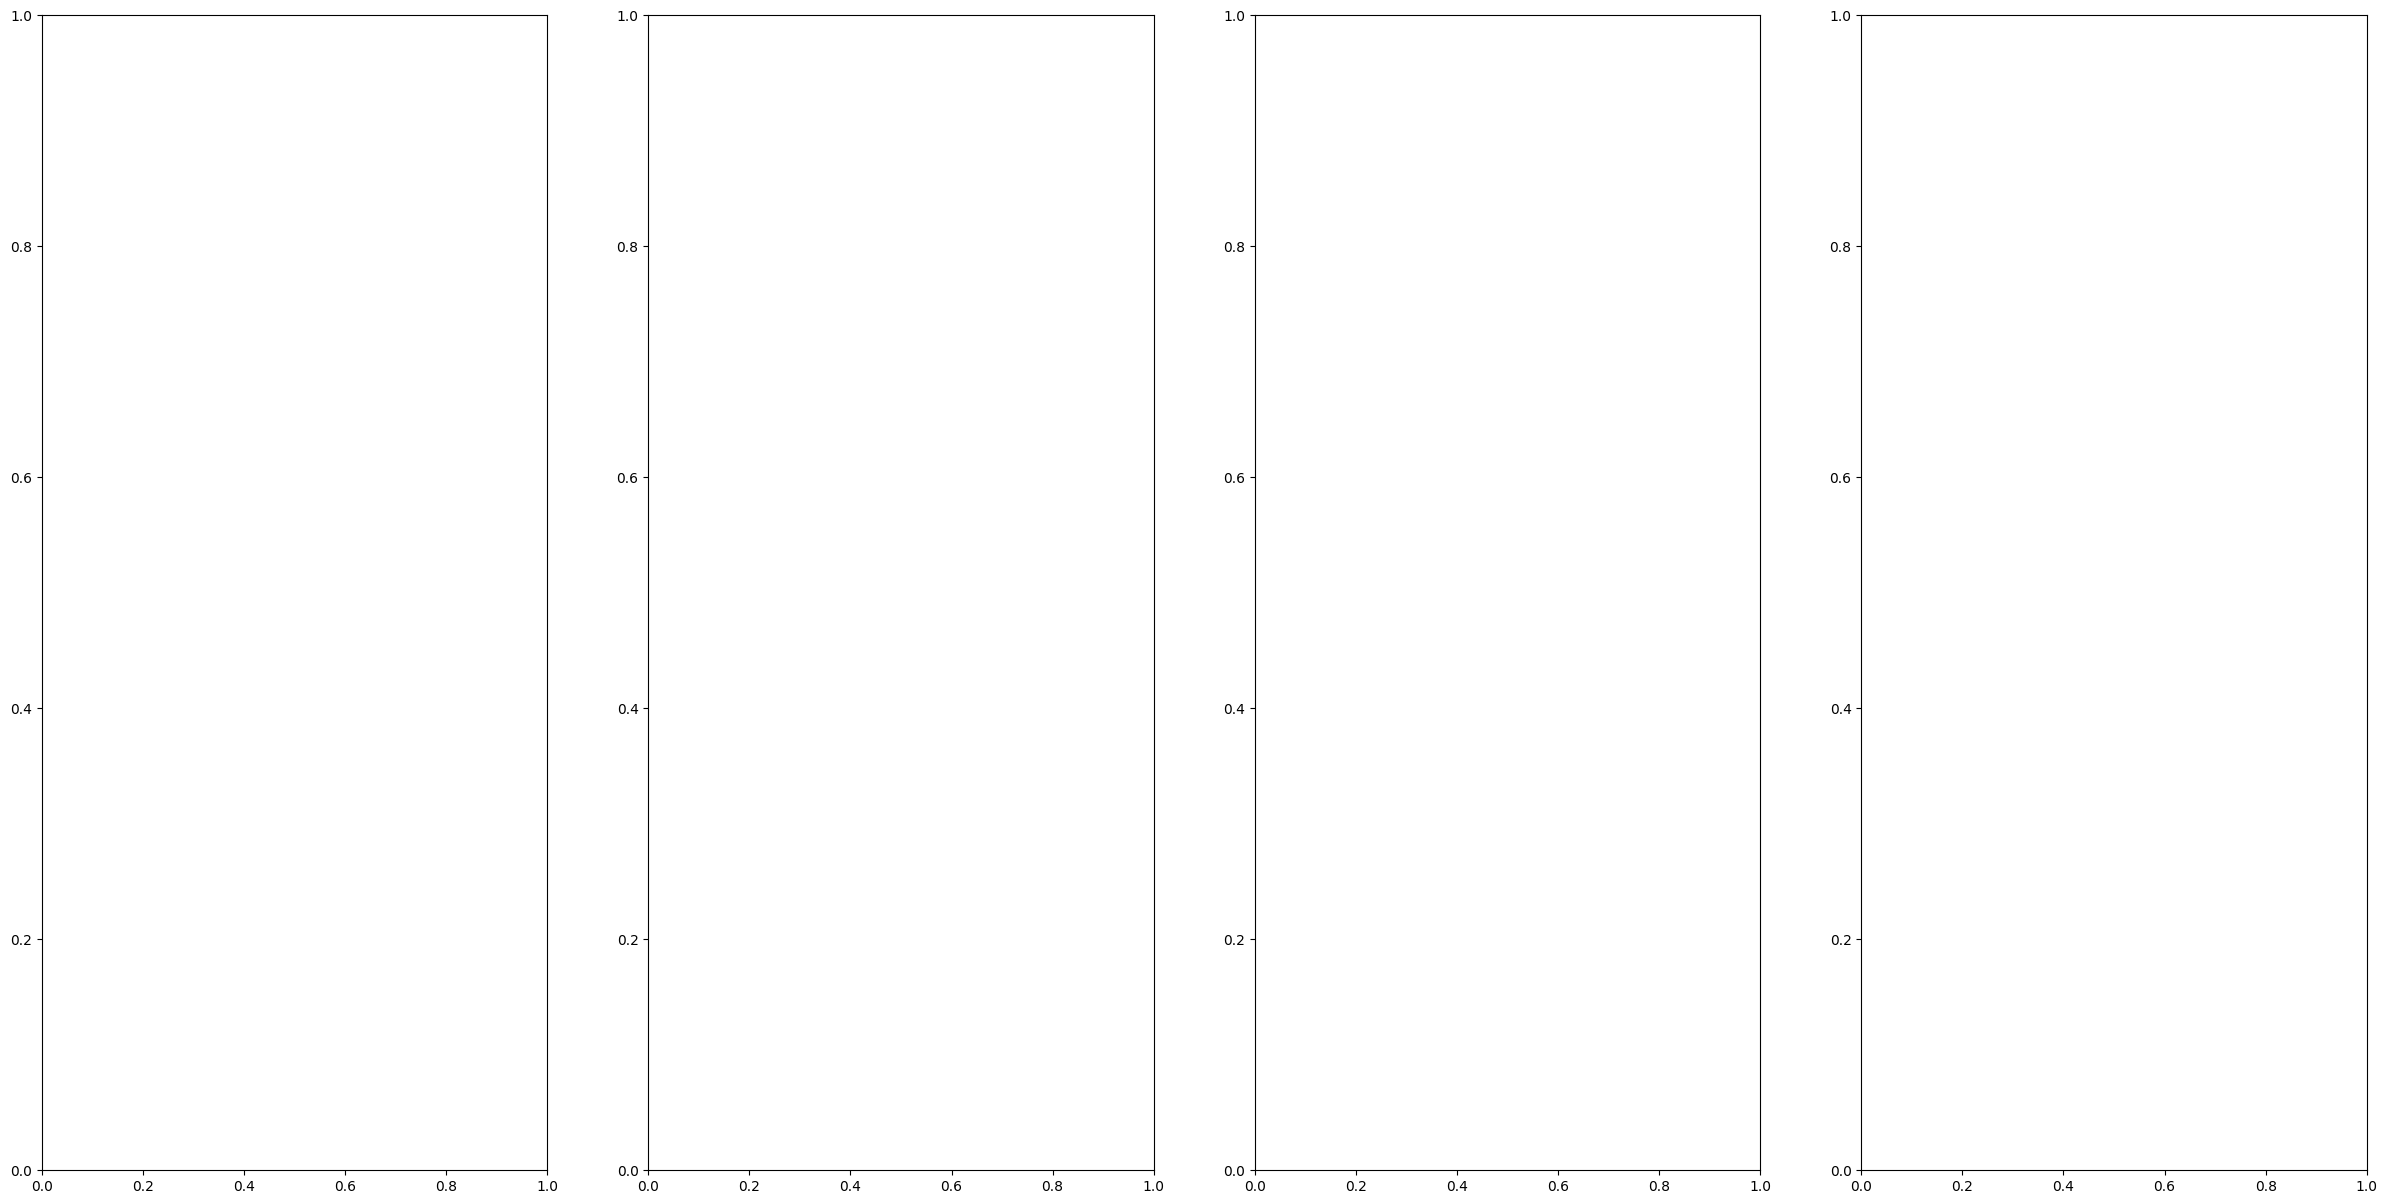

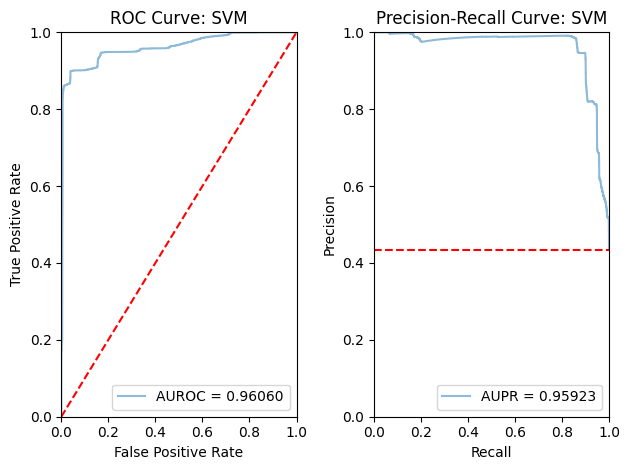

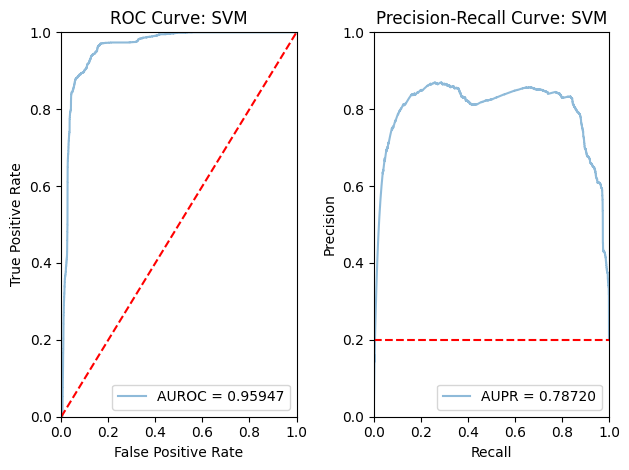

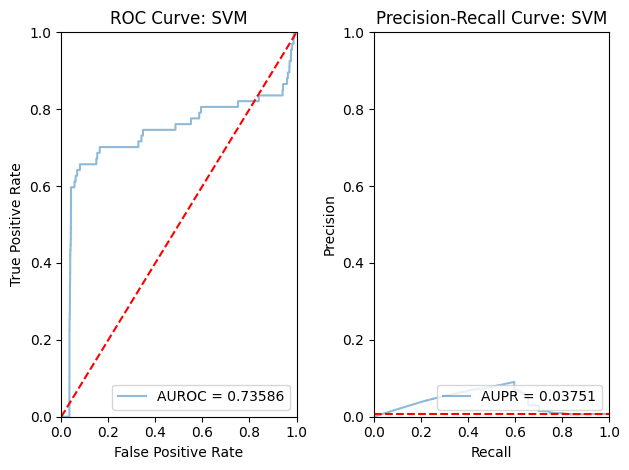

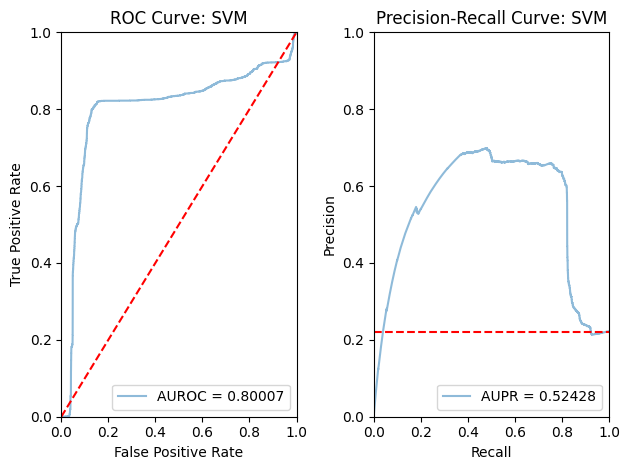

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


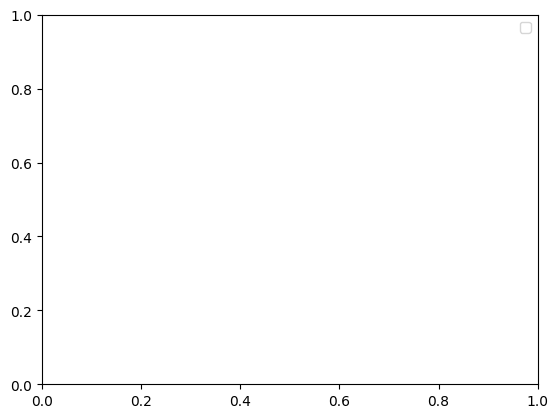

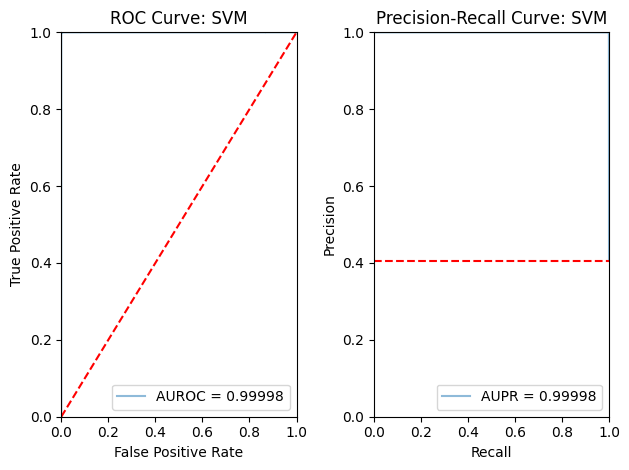

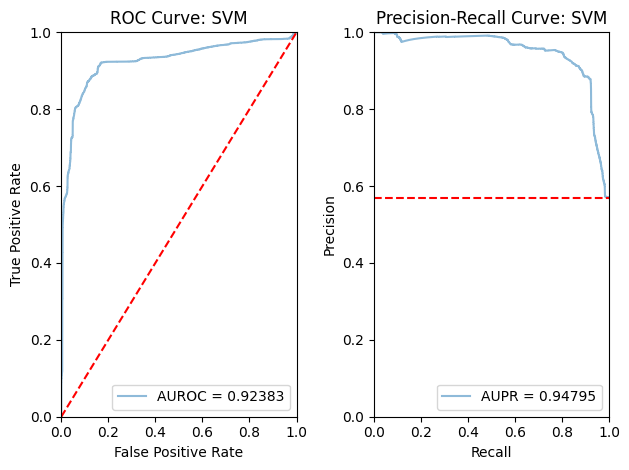

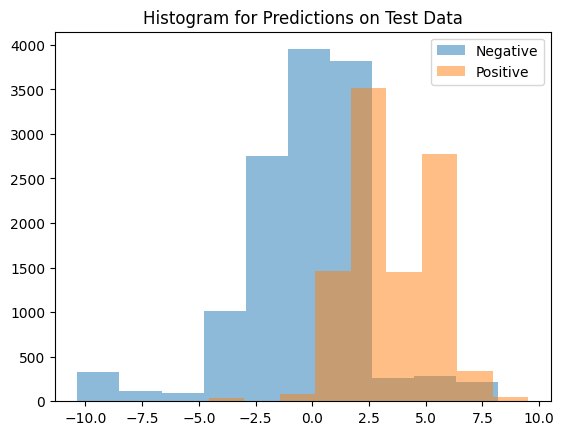

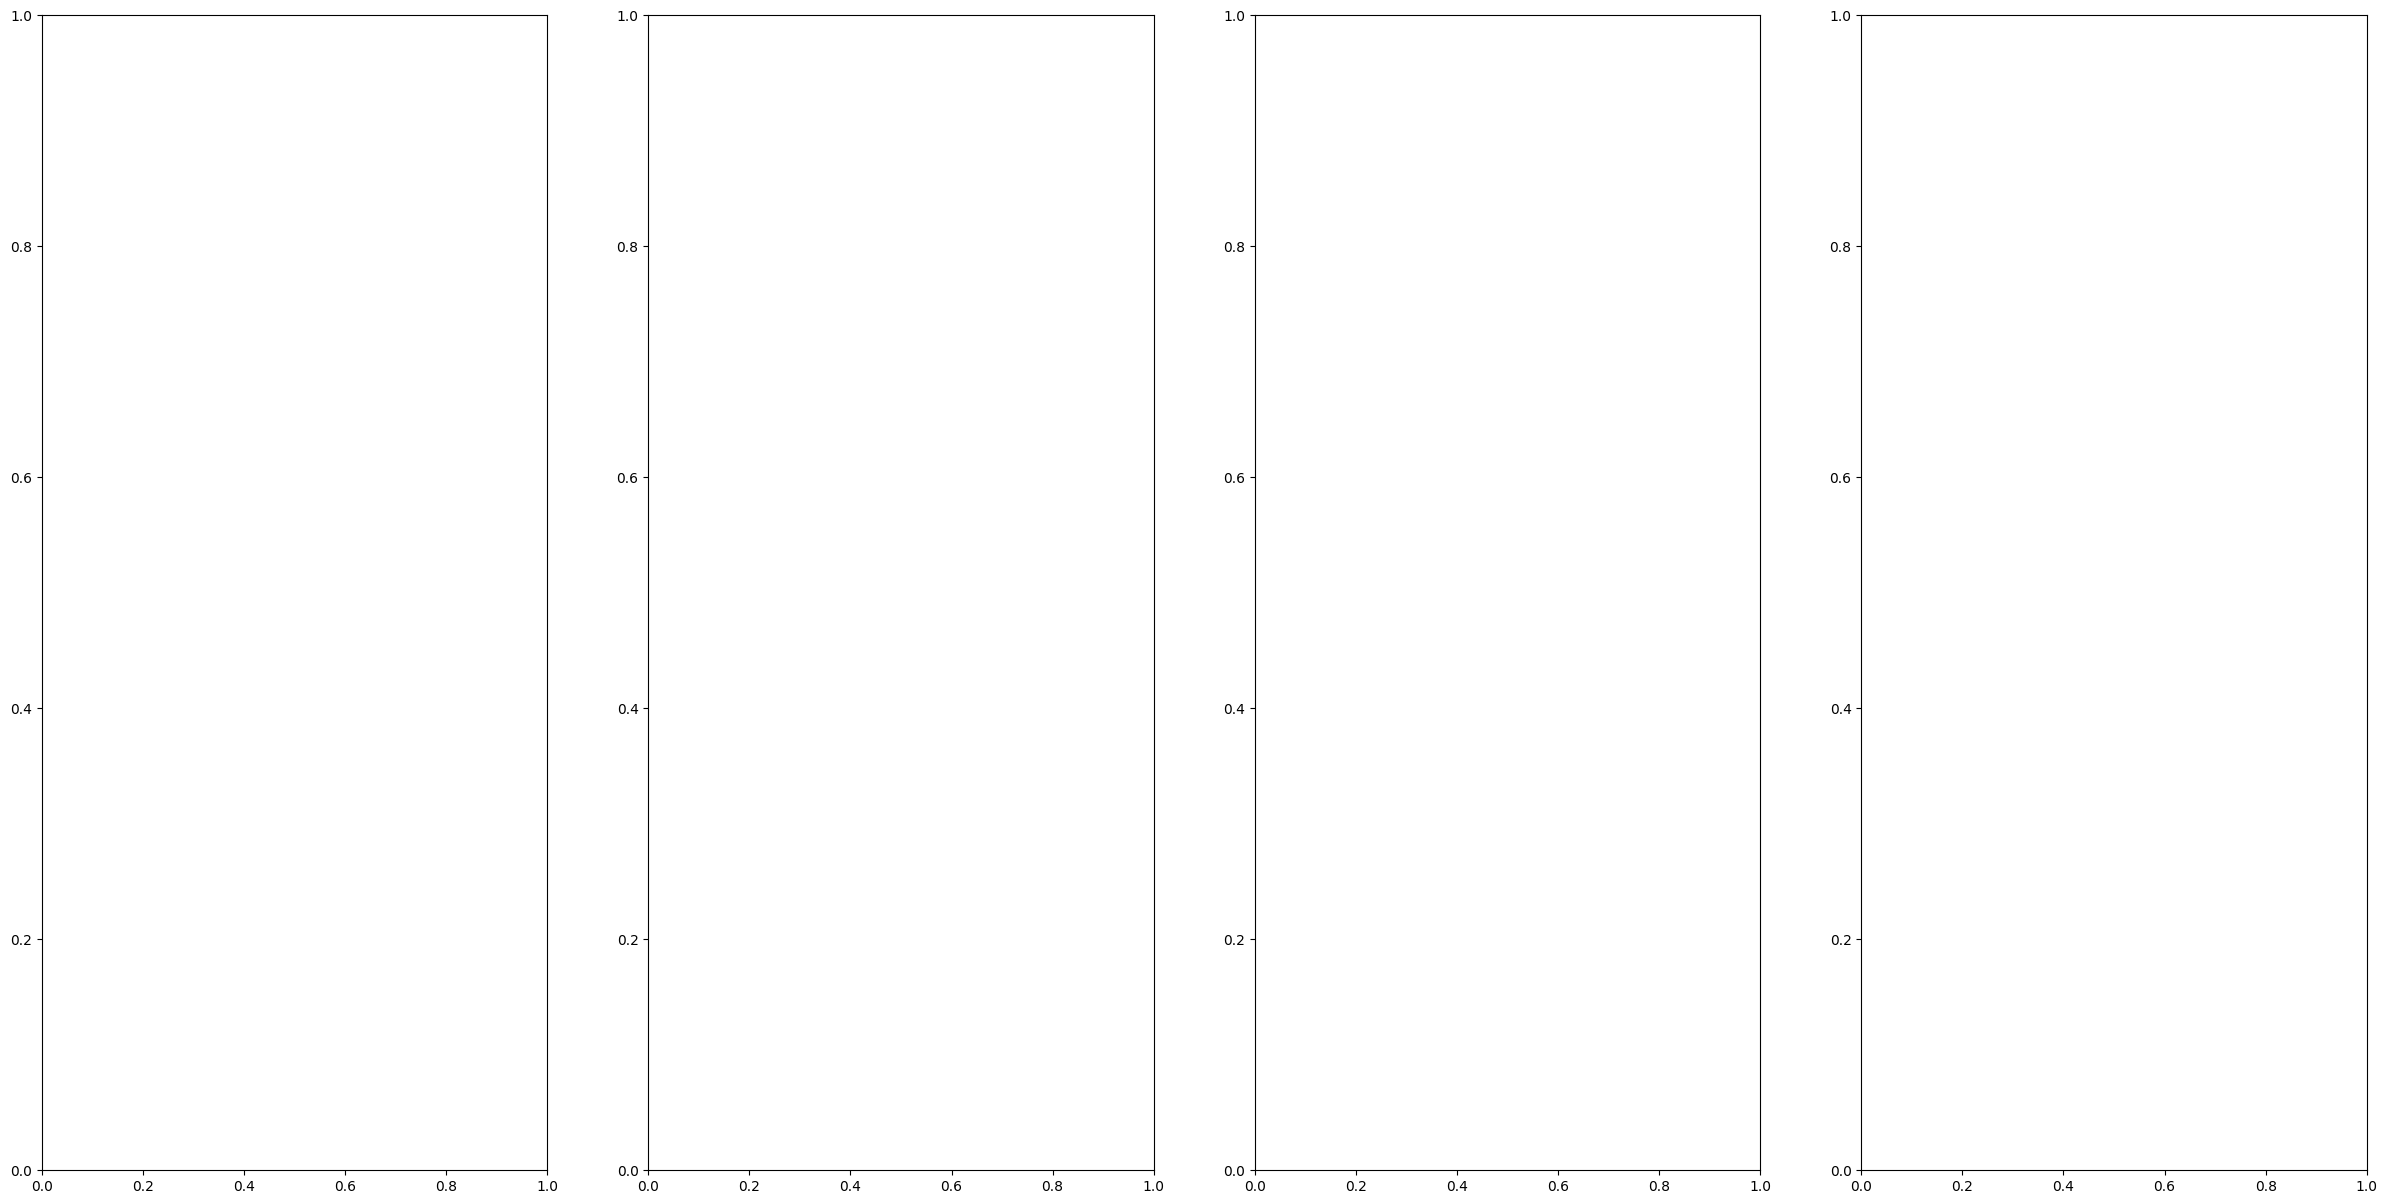

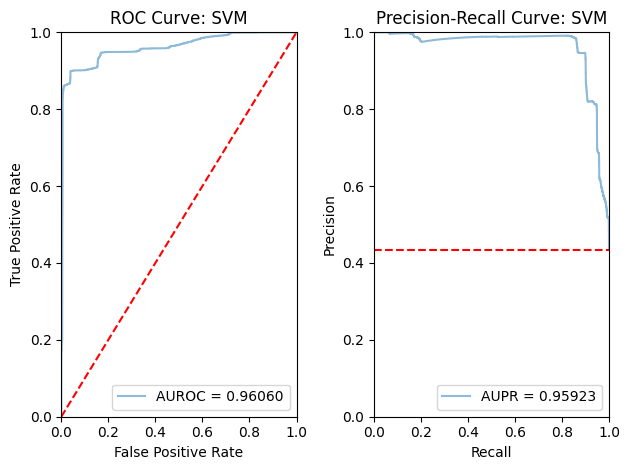

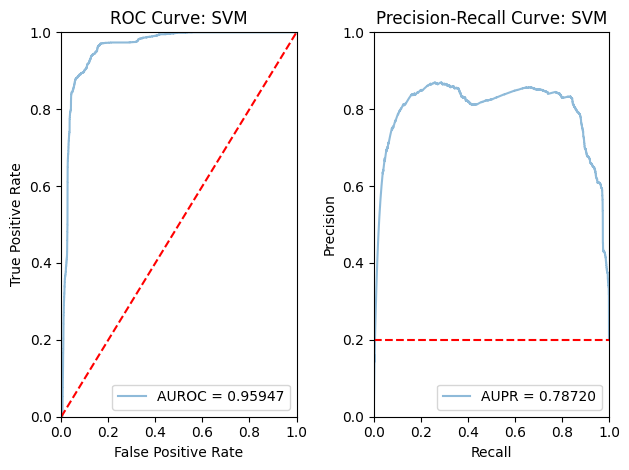

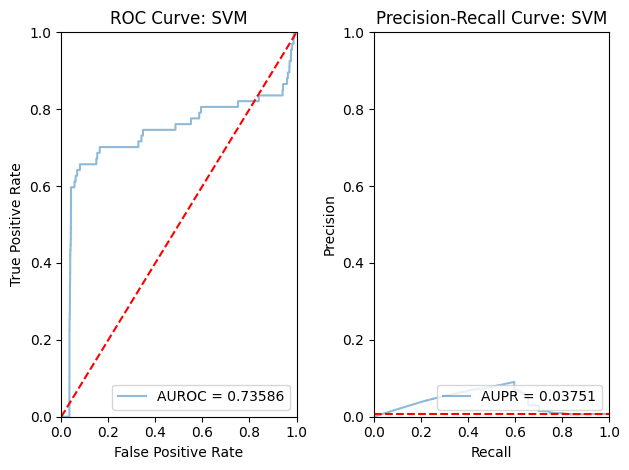

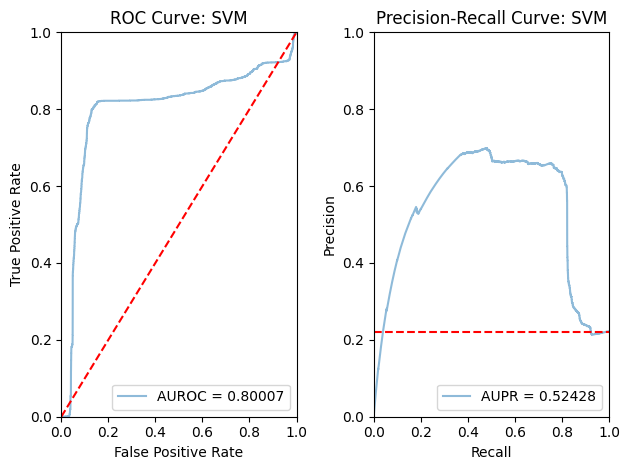

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


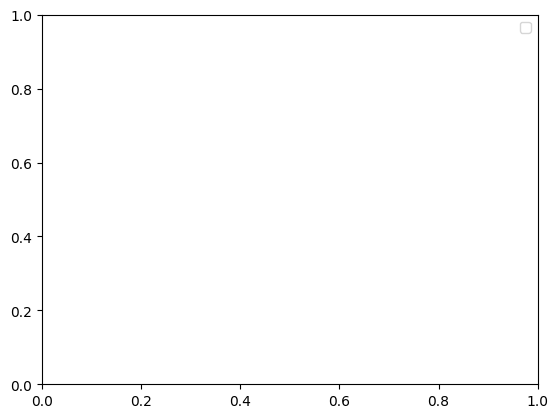

AUPR (Train): 0.9999848718766575+-0.0
AUPR (Test): 0.9479468338605633+-1.1102230246251565e-16


0         1         2  AUPR Mean      AUPR Std
1  0.959227  0.959227  0.959227   0.959227  0.000000e+00
2  0.787202  0.787202  0.787202   0.787202  1.359740e-16
3  0.037507  0.037507  0.037507   0.037507  0.000000e+00
4  0.524279  0.524279  0.524279   0.524279  0.000000e+00

([0.9999848718766575, 0.9999848718766575, 0.9999848718766575],
 [0.9479468338605634, 0.9479468338605634, 0.9479468338605634],
 {0: [0.9592270570859548,
   0.787201669941491,
   0.03750663097546848,
   0.5242789643027422],
  1: [0.9592270570859548,
   0.787201669941491,
   0.03750663097546848,
   0.5242789643027422],
  2: [0.9592270570859548,
   0.787201669941491,
   0.03750663097546848,
   0.5242789643027422]})

In [15]:
# best_params = {'C': 100.0, 'class_weight': None}
# use continuous-valued predictions
model_name = 'SVM'

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
    svm = SVC(random_state=N, **best_params)
    svm.fit(X, y)
    y_train = svm.decision_function(X)
    y_pred = svm.decision_function(x_test)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

## One-vs-set machine

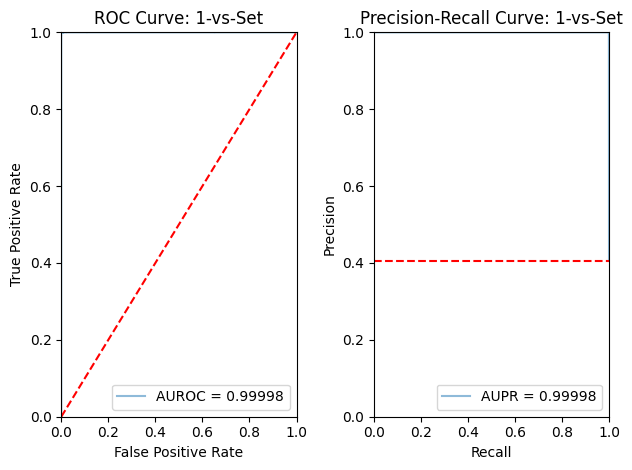

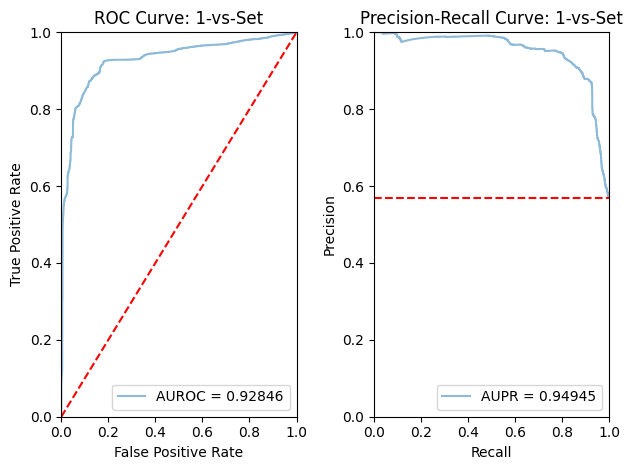

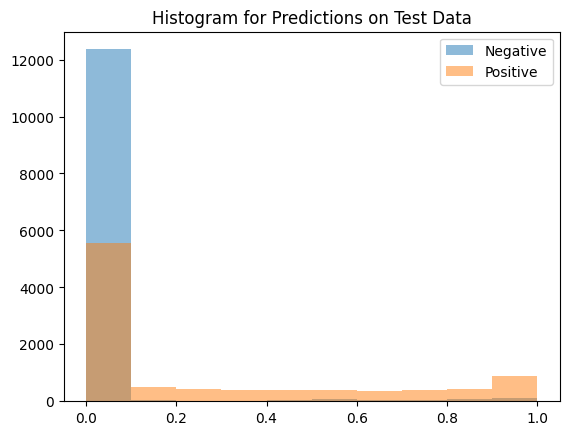

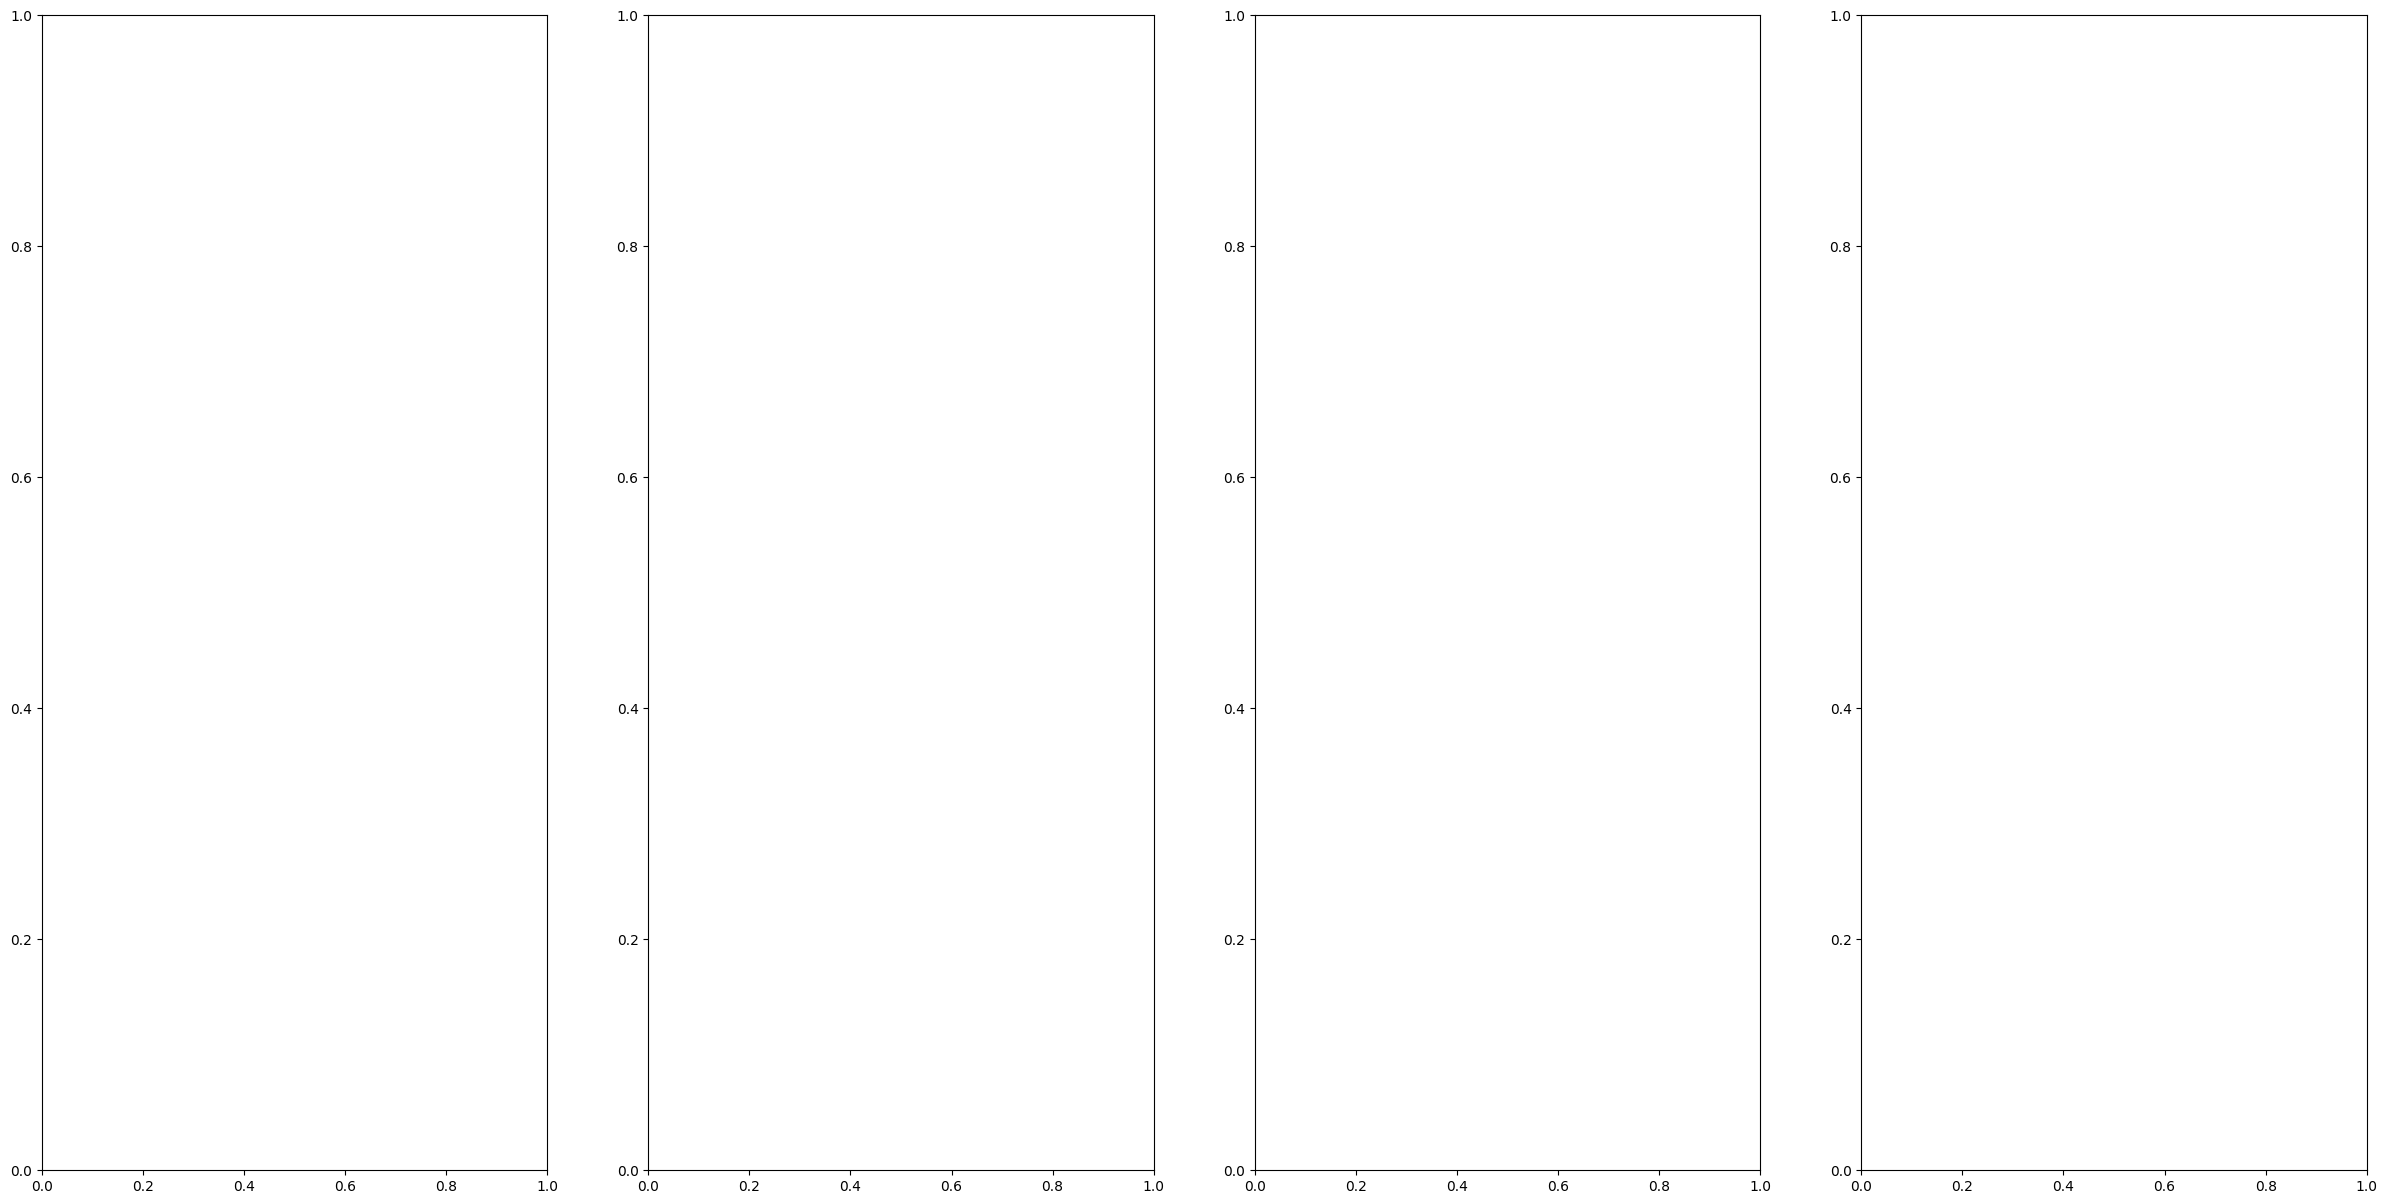

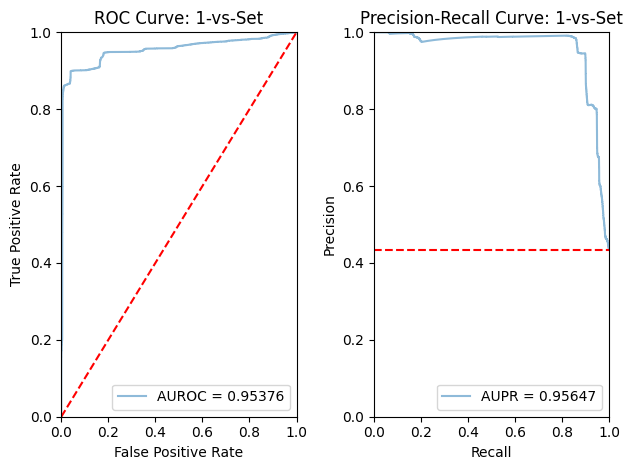

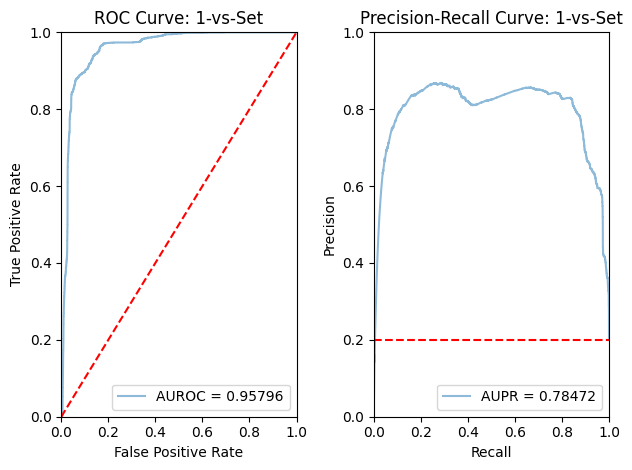

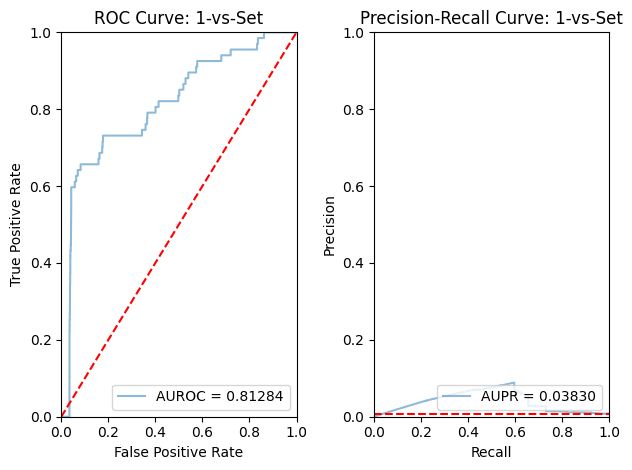

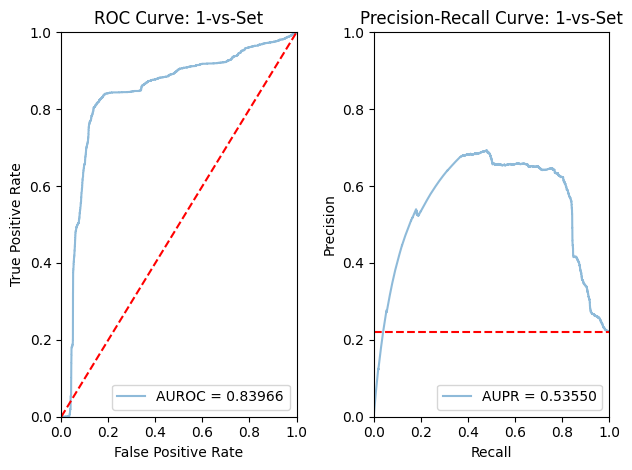

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


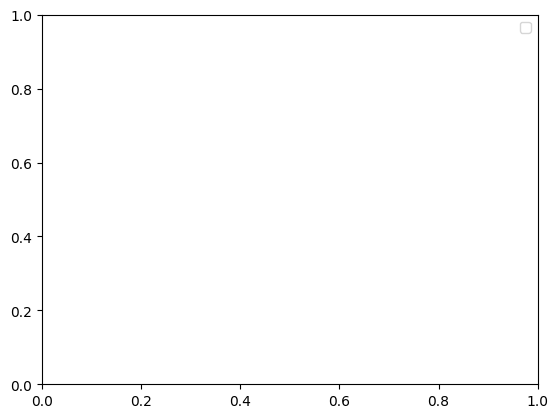

AUPR (Train): 0.9999831110800679+-0.0
AUPR (Test): 0.9494532451903148+-0.0


0  AUPR Mean  AUPR Std
1  0.956469   0.956469       NaN
2  0.784719   0.784719       NaN
3  0.038304   0.038304       NaN
4  0.535496   0.535496       NaN

([0.9999831110800679],
 [0.9494532451903148],
 {0: [0.9564690199363701,
   0.784718761678799,
   0.03830400726700592,
   0.535495540583349]})

In [18]:
# best_params = {'C': 100.0, 'class_weight': None}

model_name = '1-vs-Set'

# no variance
repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
#     svm = SVC(random_state=N, **best_params)
#     svm.fit(X, y)
    y_train = svm.decision_function(X)
    y_pred = svm.decision_function(x_test)
    mu = (svm_train_max - svm_train_min) / 2
    # define dist to hyperplane
    y_train = np.exp(-(y_train - mu) ** 2)
    y_pred = np.exp(-(y_pred - mu) ** 2)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

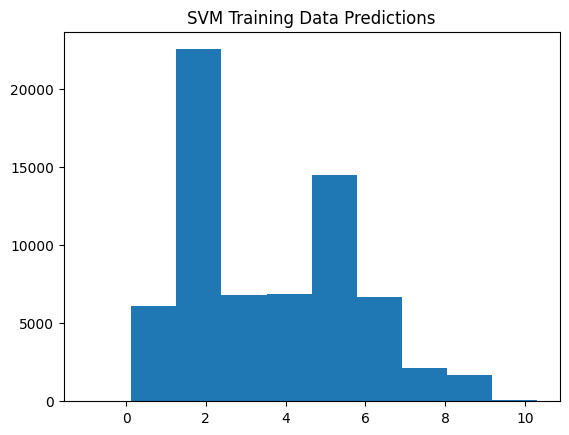

svm_train_max 10.300981981317072
svm_train_min 1.0002601634842943


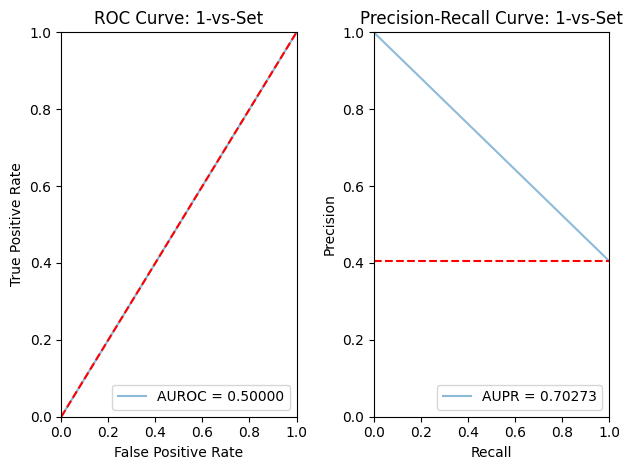

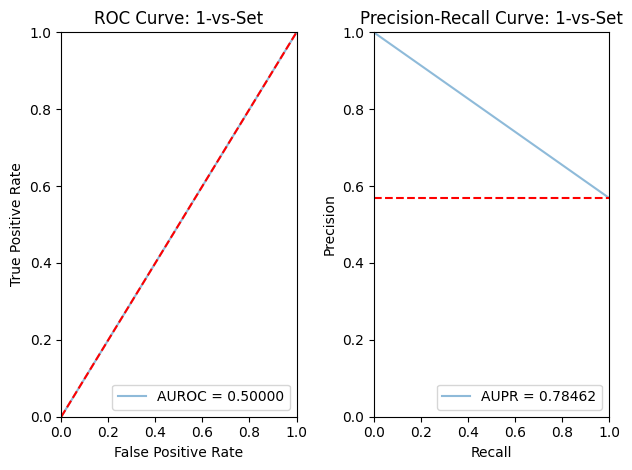

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


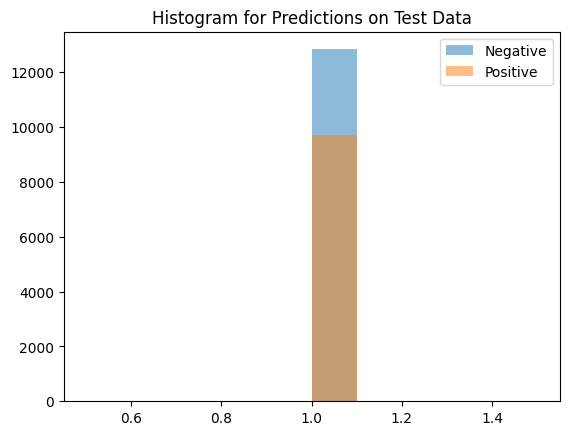

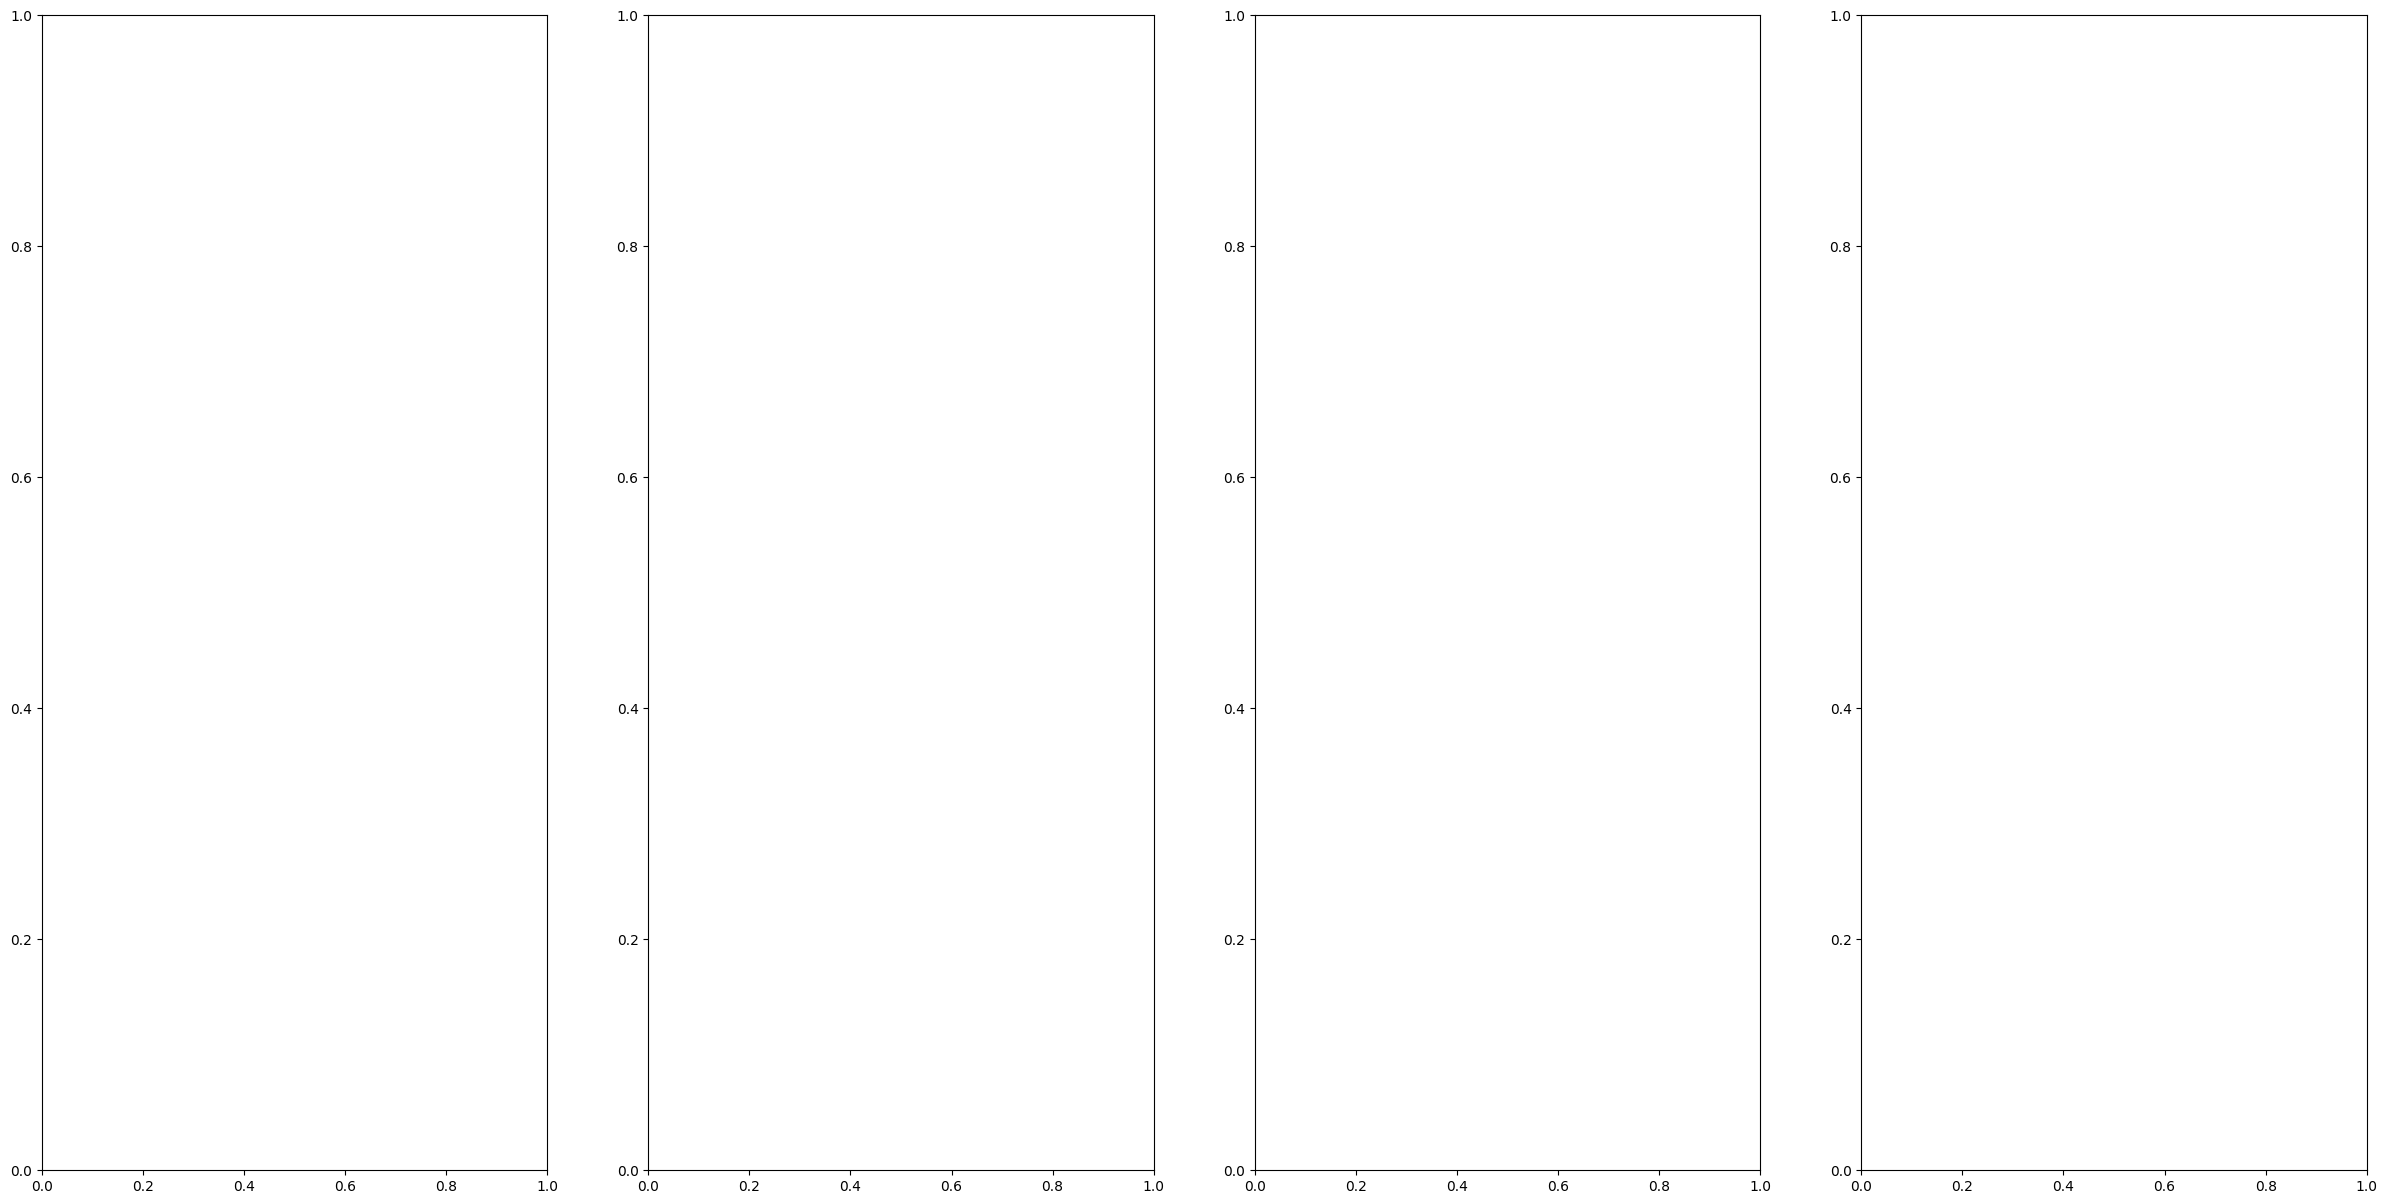

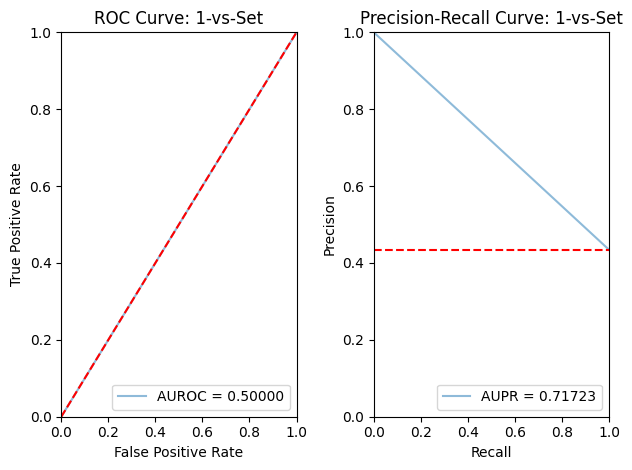

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


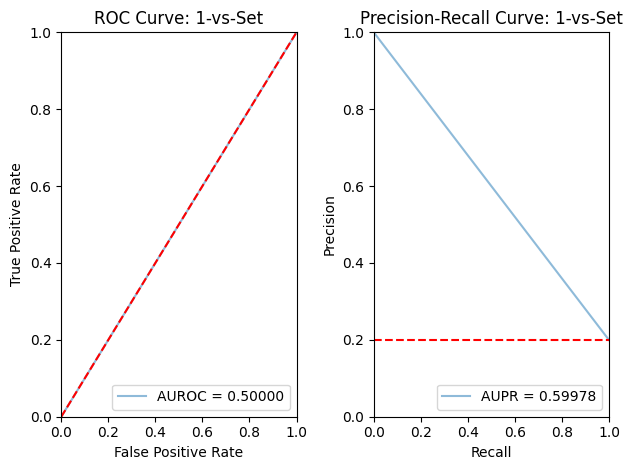

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


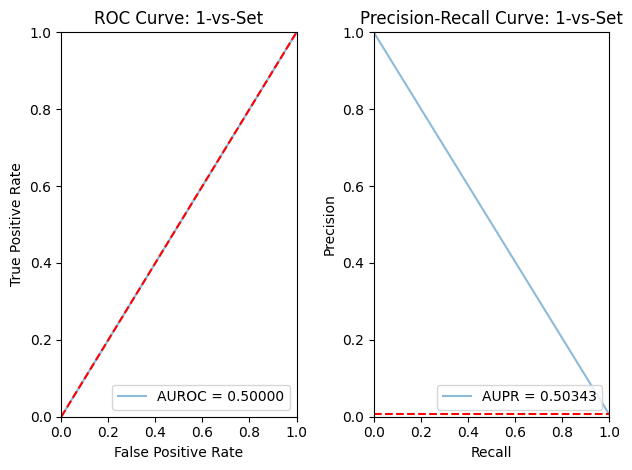

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


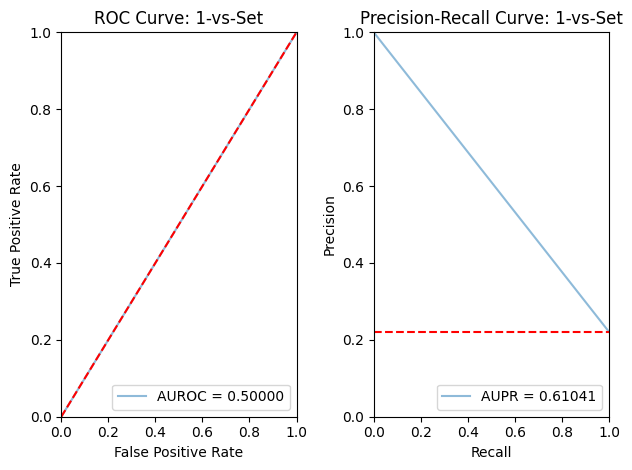

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


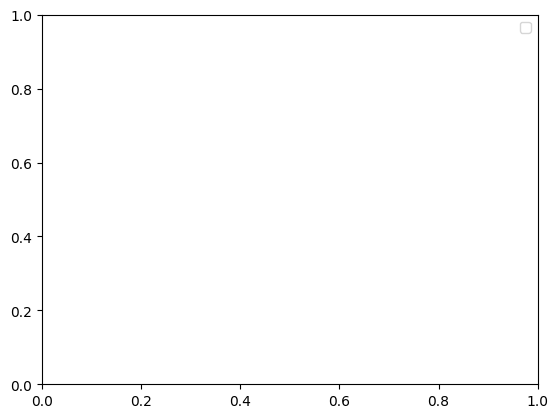

AUPR (Train): 0.7027324092875431+-0.0
AUPR (Test): 0.7846211852377573+-0.0


0  AUPR Mean  AUPR Std
1  0.717227   0.717227       NaN
2  0.599777   0.599777       NaN
3  0.503426   0.503426       NaN
4  0.610407   0.610407       NaN

([0.7027324092875431],
 [0.7846211852377573],
 {0: [0.717226719468872,
   0.5997774480712166,
   0.5034260584986705,
   0.6104068041402552]})

In [48]:
# best_params = {'C': 100.0, 'class_weight': None}

def one_v_set(y_score, y_max, y_min):
    return np.logical_or((y_score <= y_max), (y_score >= y_min))

model_name = '1-vs-Set'
best_params = {'C': 100.0, 'class_weight': None}
repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
    svm = SVC(random_state=N, **best_params)
    svm.fit(X, y)
    y_train_score = svm.decision_function(X)
    y_pred_score = svm.decision_function(x_test)

    y_train_normal_indices = (y == 1)
    svm_train_sorted = np.sort(y_train_score[y_train_normal_indices])
    plt.title("SVM Training Data Predictions")
    plt.hist(y_train_score[y_train_normal_indices])
    plt.show()

    fpr = 0.05
    svm_train_max = svm_train_sorted[-1]
    svm_train_min = svm_train_sorted[int(fpr * num_normal)]
    print("svm_train_max", svm_train_max)
    print("svm_train_min", svm_train_min)
#     mu = (svm_train_max - svm_train_min) / 2
    # define dist to hyperplane
    y_train = one_v_set(y_train_score, svm_train_max, svm_train_min)
    y_pred = one_v_set(y_pred_score, svm_train_max, svm_train_min)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

### Linear SVM

{'C': 100.0, 'class_weight': 'balanced'}


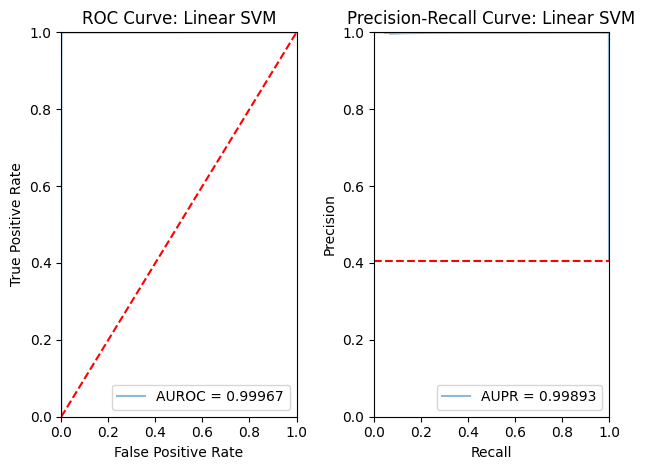

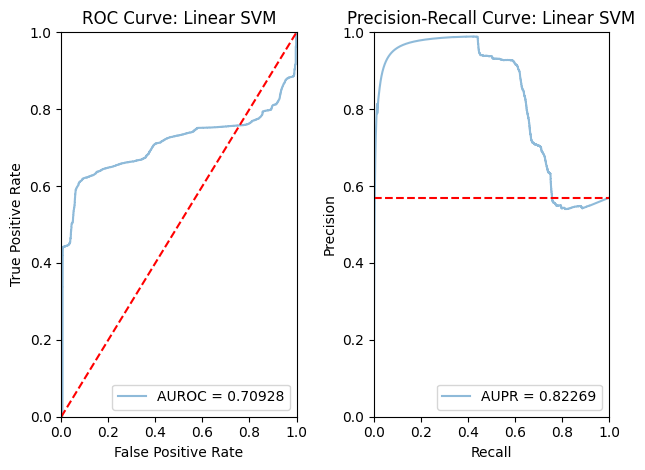

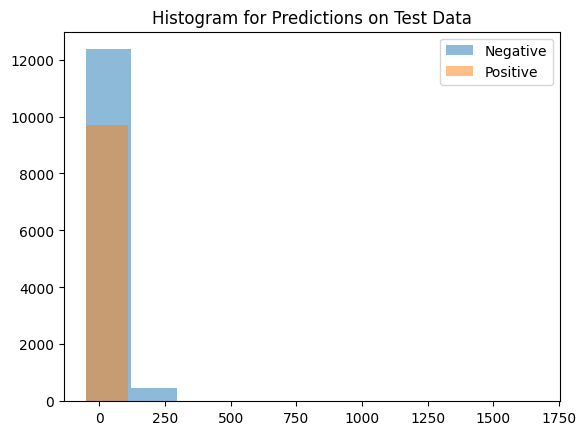

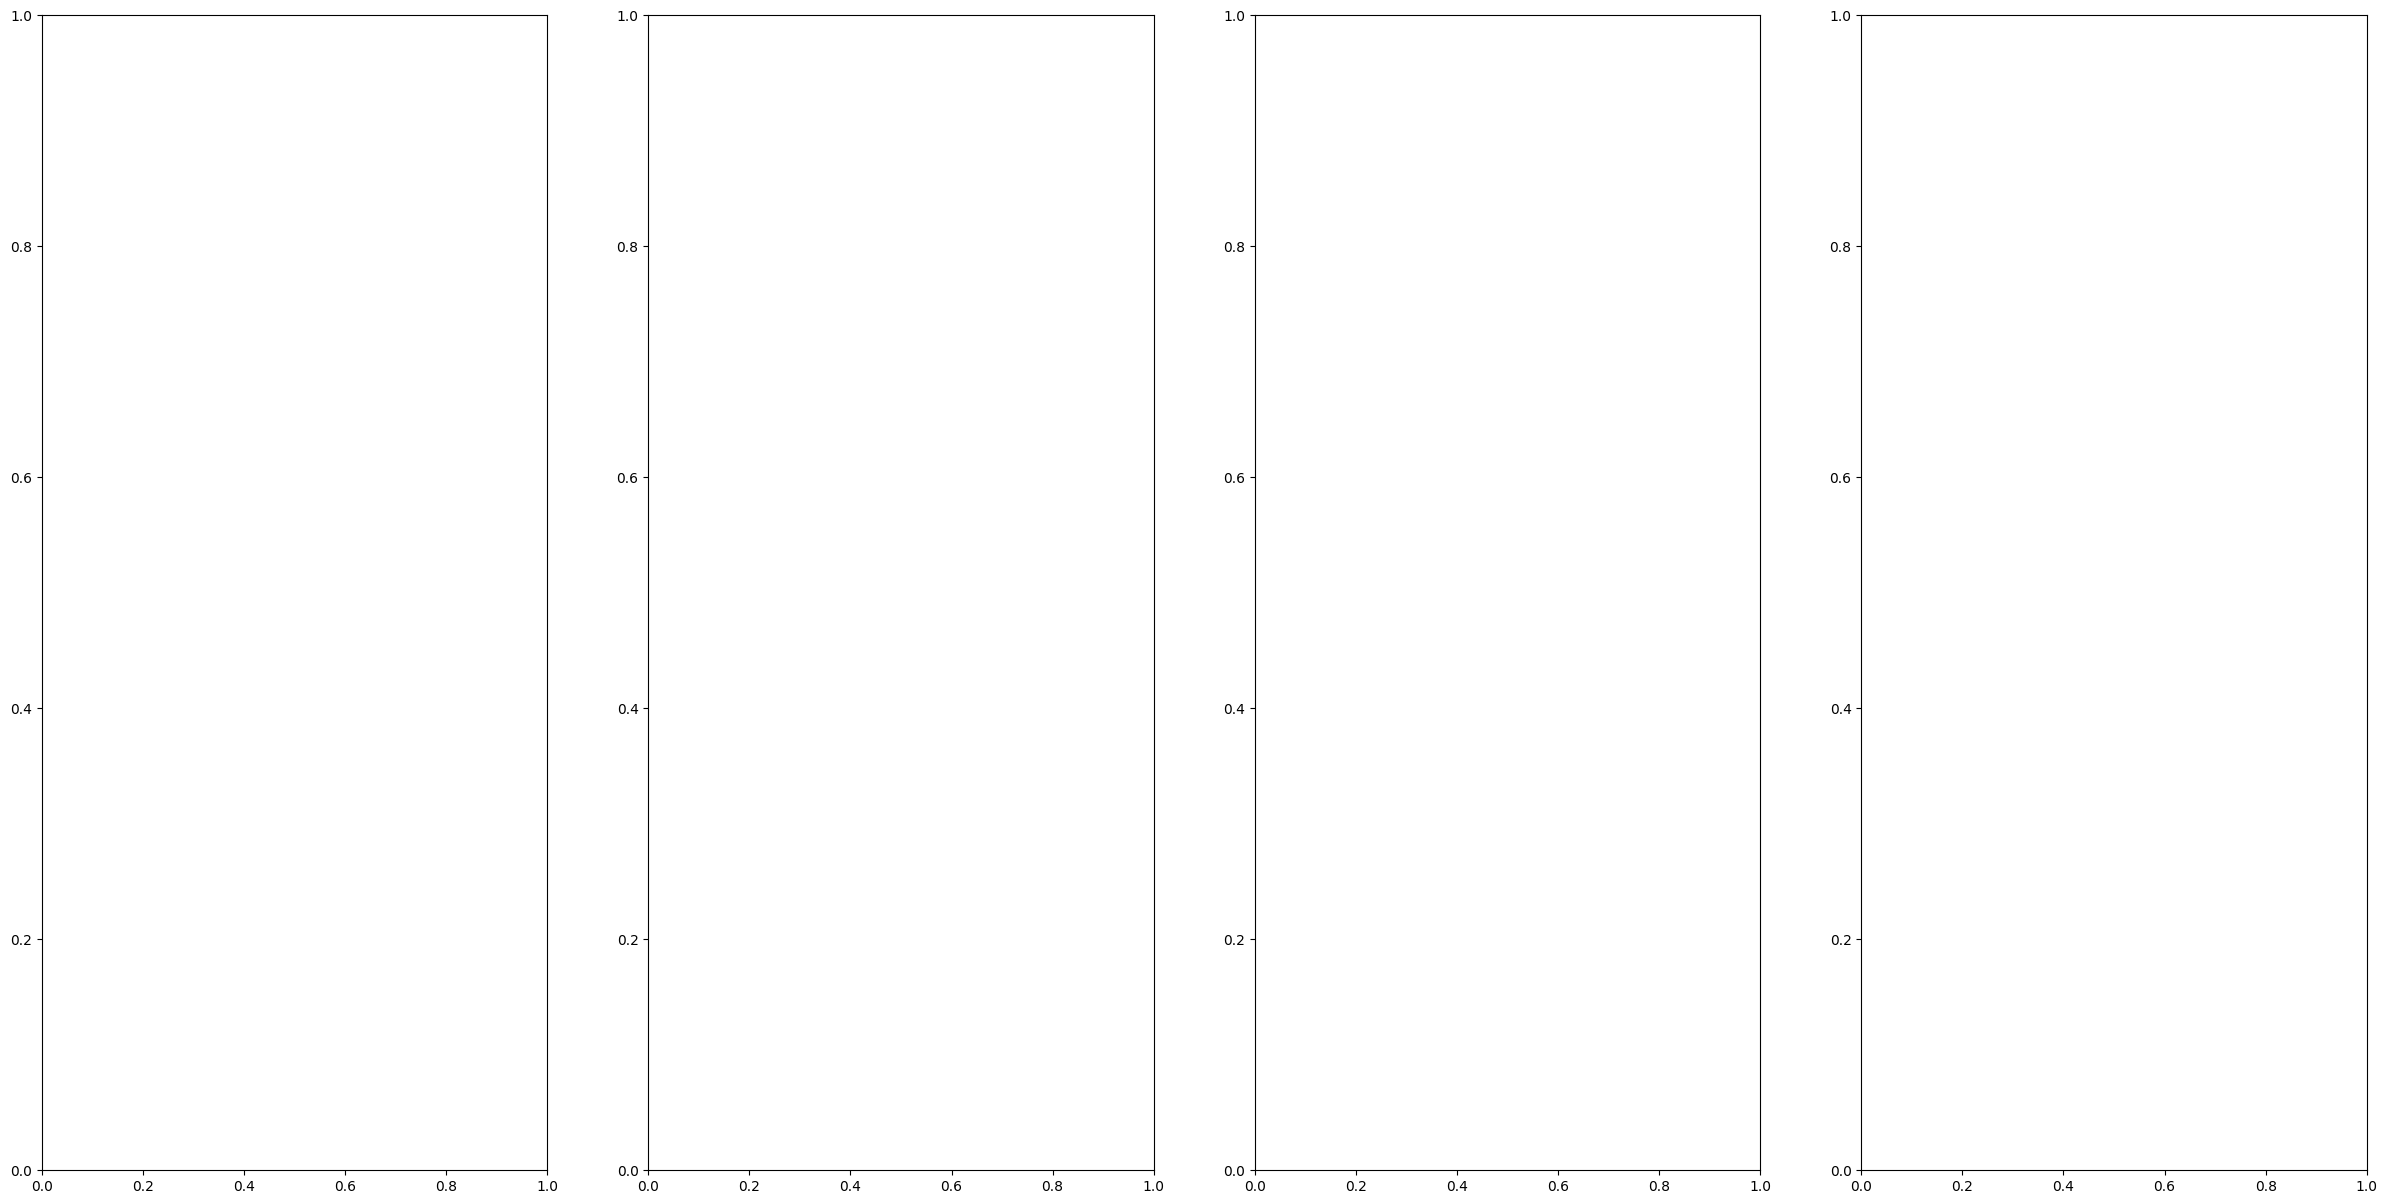

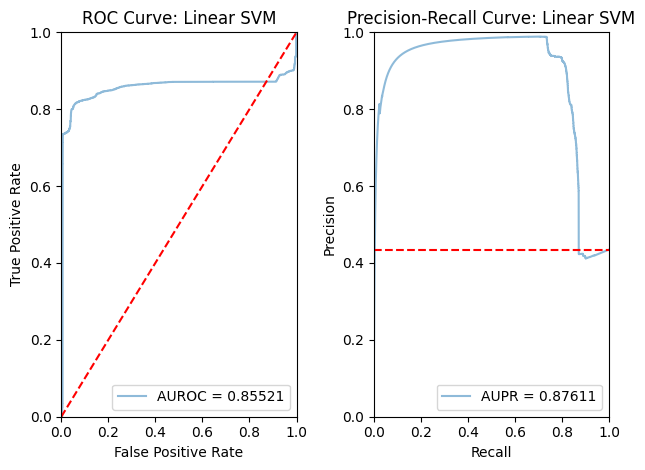

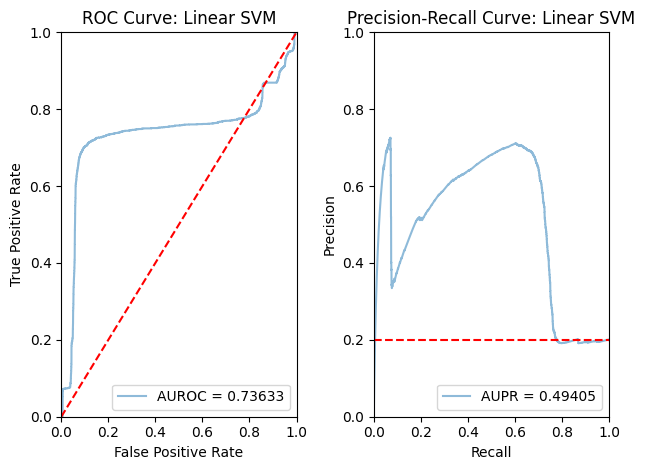

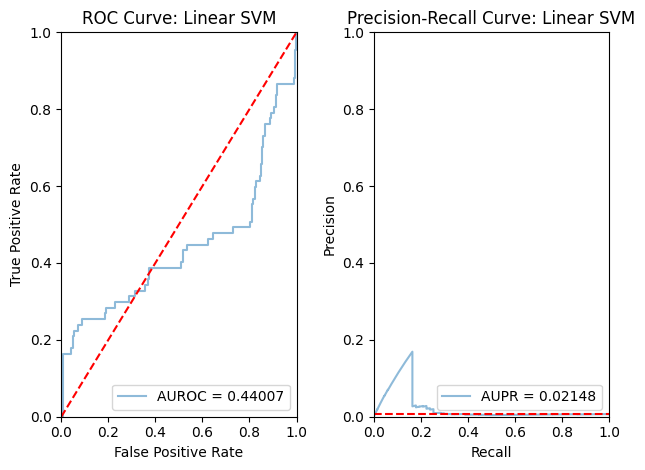

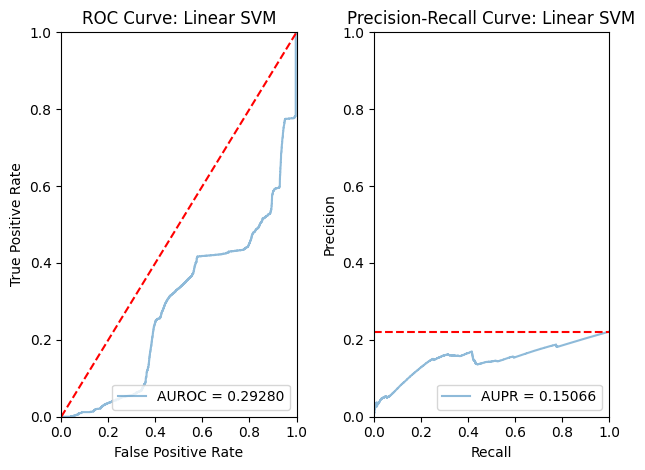

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


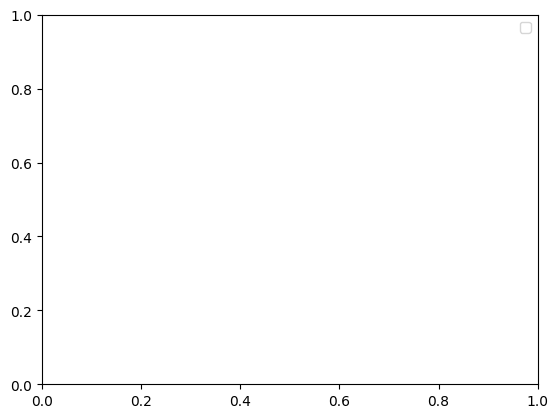

AUPR (Train): 0.9989299837949659+-0.0
AUPR (Test): 0.8226850826491263+-0.0


0  AUPR Mean  AUPR Std
1  0.876112   0.876112       NaN
2  0.494052   0.494052       NaN
3  0.021481   0.021481       NaN
4  0.150656   0.150656       NaN

([0.9989299837949659],
 [0.8226850826491263],
 {0: [0.8761118181871576,
   0.494052109511983,
   0.021480967804455967,
   0.15065603742167466]})

In [36]:
model_name = 'Linear SVM'
model = SVC(probability=True, kernel='linear', random_state=0)

params = {"C": [0.01, 1., 100.], "class_weight": [None, "balanced"]}

best_params = cross_validate(X, y, model, model_name, params)
# best_params = {'C': 100.0, 'class_weight': 'balanced'}
print(best_params)

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
    svm = SVC(random_state=N, kernel='linear', **best_params)
    svm.fit(X, y)
    y_train = svm.decision_function(X)
    y_pred = svm.decision_function(x_test)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack

print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

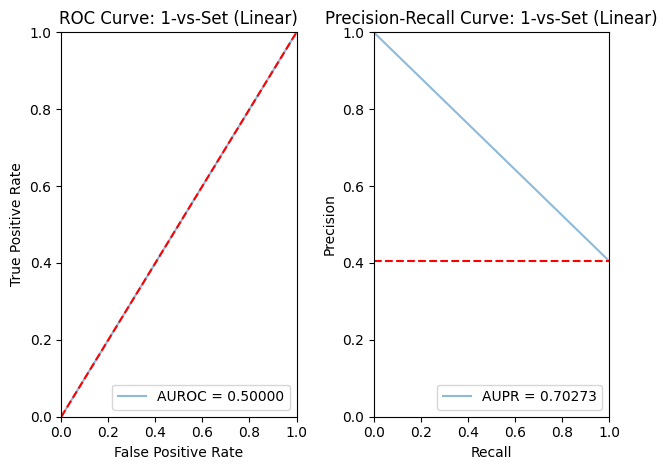

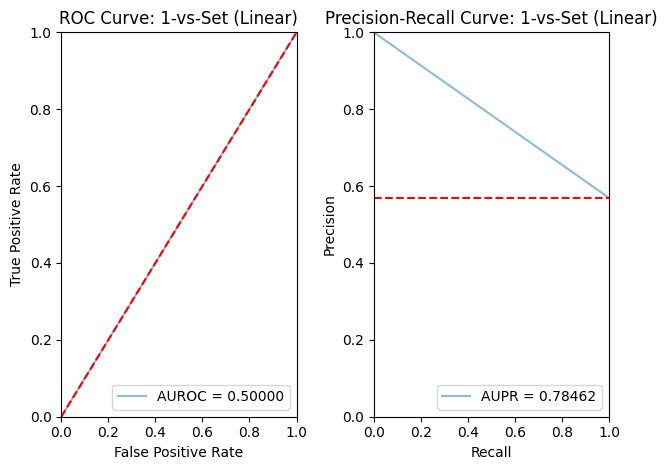

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


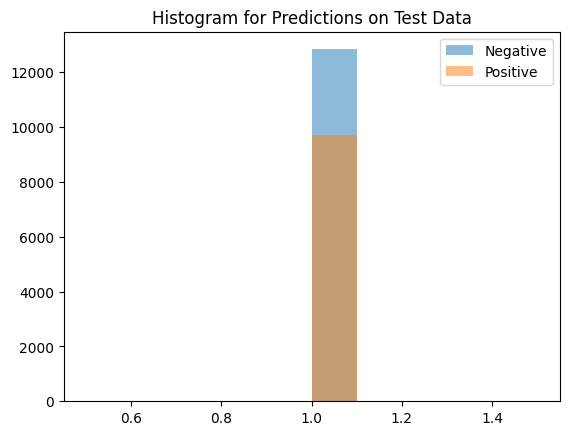

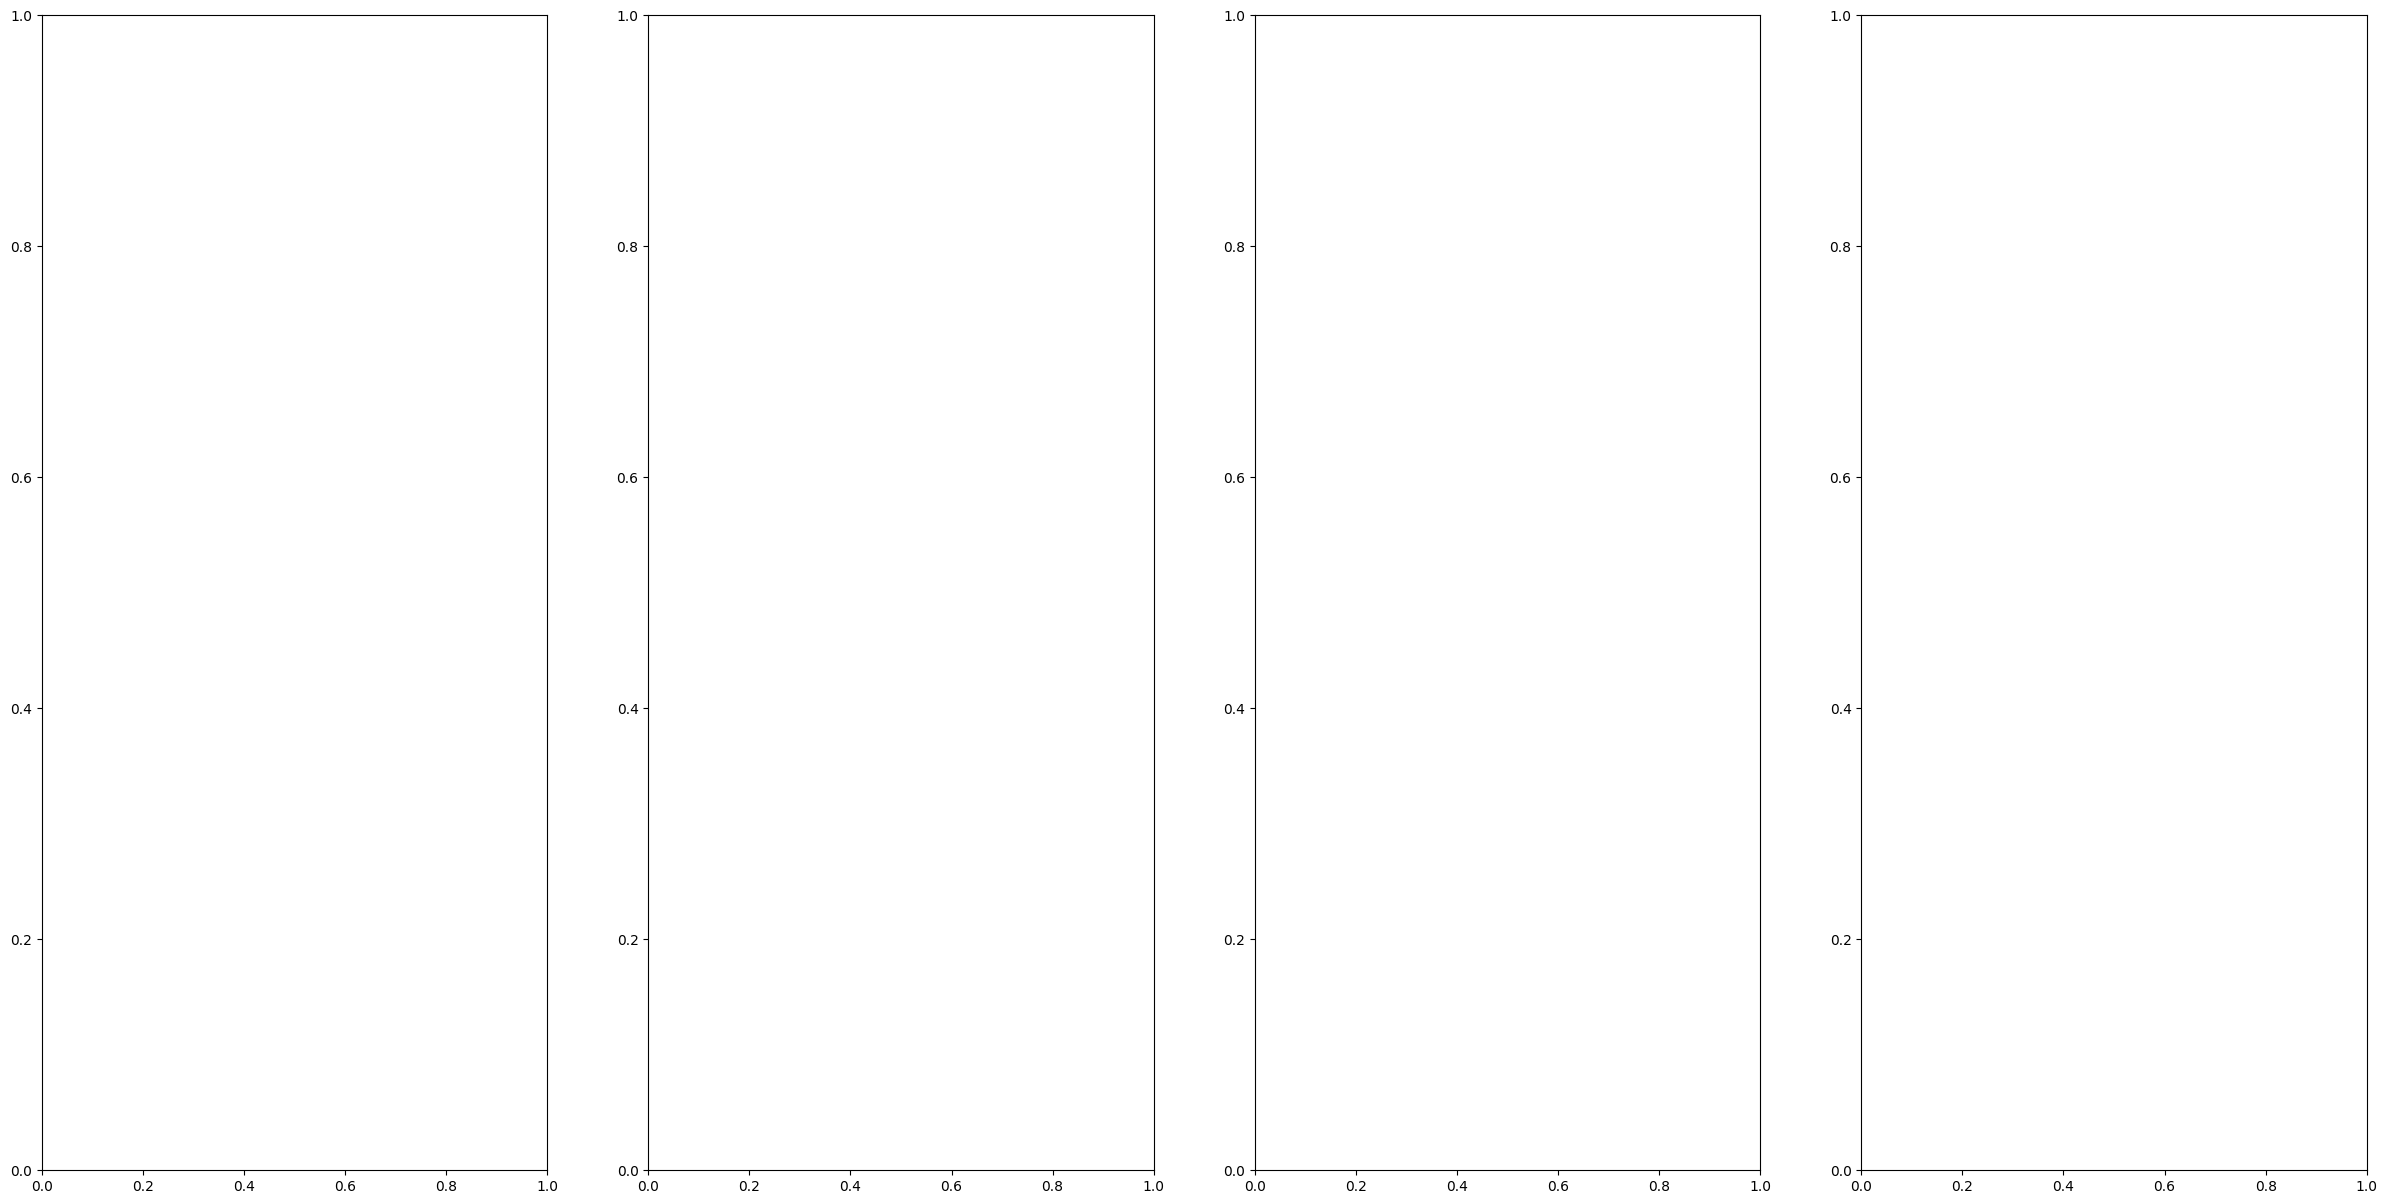

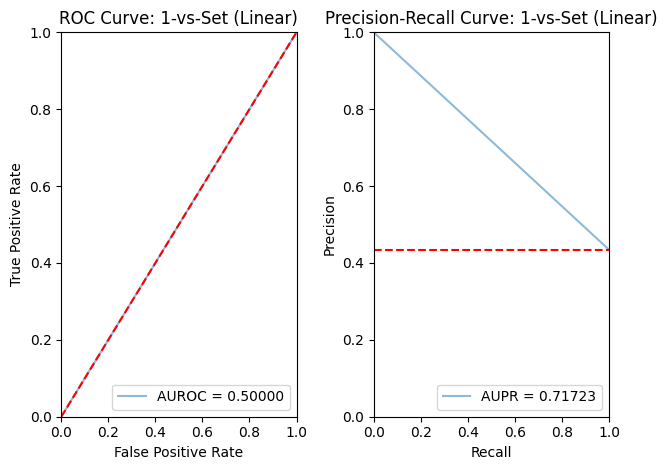

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


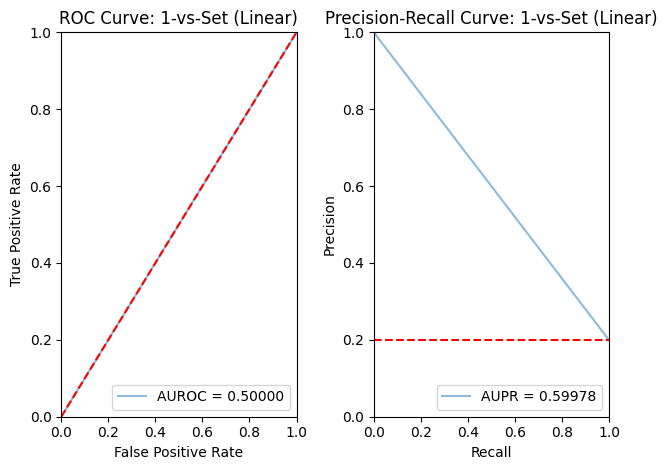

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


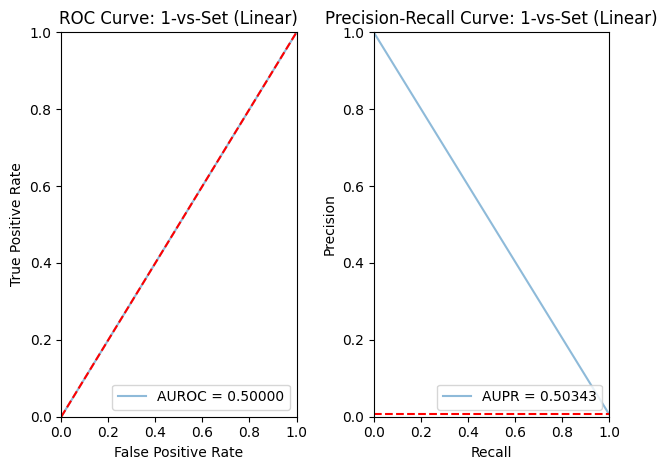

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


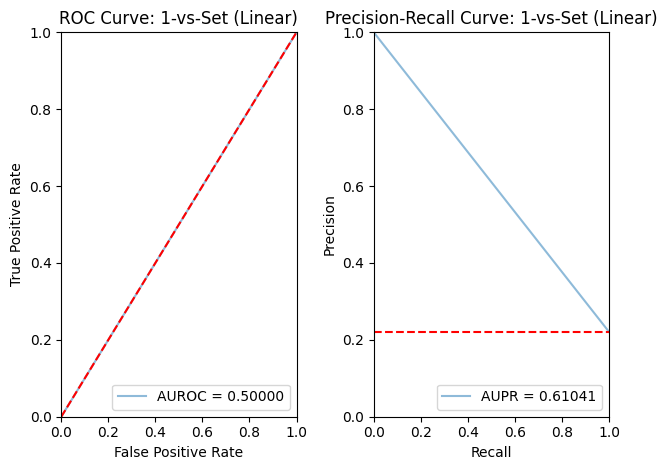

C:\Users\mlau40\AppData\Local\anaconda3\envs\projects\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


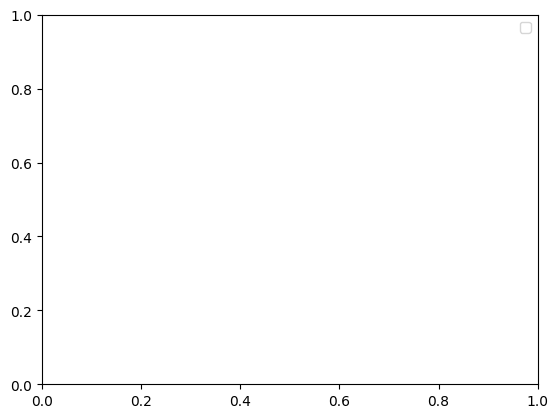

AUPR (Train): 0.7027324092875431+-0.0
AUPR (Test): 0.7846211852377573+-0.0


0  AUPR Mean  AUPR Std
1  0.717227   0.717227       NaN
2  0.599777   0.599777       NaN
3  0.503426   0.503426       NaN
4  0.610407   0.610407       NaN

([0.7027324092875431],
 [0.7846211852377573],
 {0: [0.717226719468872,
   0.5997774480712166,
   0.5034260584986705,
   0.6104068041402552]})

In [38]:
# best_params = {'C': 100.0, 'class_weight': None}

def one_v_set(y_score, y_max, y_min):
    return np.logical_or((y_score <= y_max), (y_score >= y_min))

model_name = '1-vs-Set (Linear)'

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

# y_train_normal_indices = (y == 1)
# svm_train_sorted = np.sort(y_train[y_train_normal_indices])
# plt.title("Linear SVM Training Data Predictions")
# plt.hist(y_train[y_train_normal_indices])
# plt.show()

# fpr = 0.05
# svm_train_max = svm_train_sorted[-1]
# svm_train_min = svm_train_sorted[int(fpr * num_normal)]
# print("svm_train_max", svm_train_max)
# print("svm_train_min", svm_train_min)

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
#     svm = SVC(random_state=N, **best_params)
#     svm.fit(X, y)
    y_train_score = svm.decision_function(X)
    y_pred_score = svm.decision_function(x_test)
#     mu = (svm_train_max - svm_train_min) / 2
    # define dist to hyperplane
    y_train = one_v_set(y_train_score, svm_train_max, svm_train_min)
    y_pred = one_v_set(y_pred_score, svm_train_max, svm_train_min)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

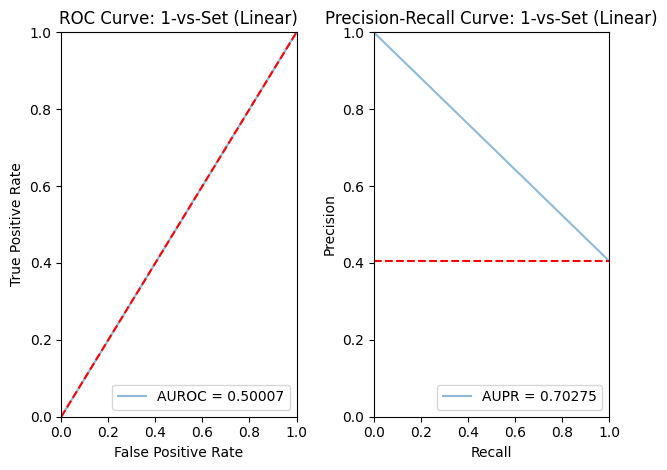

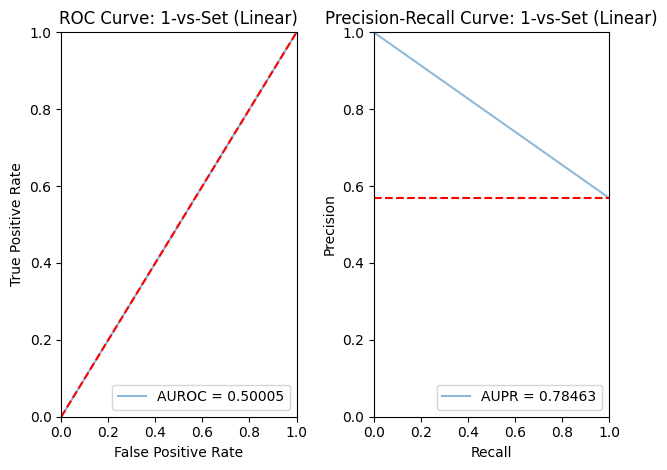

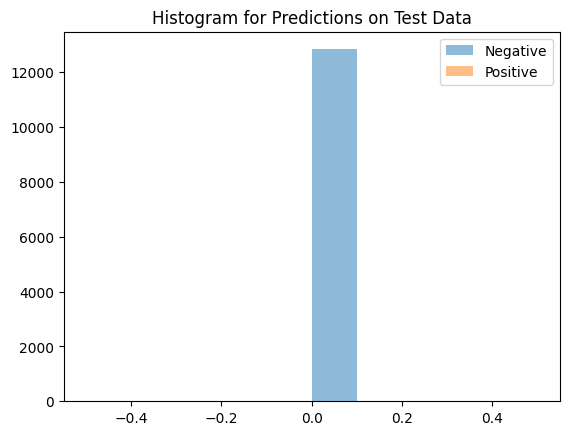

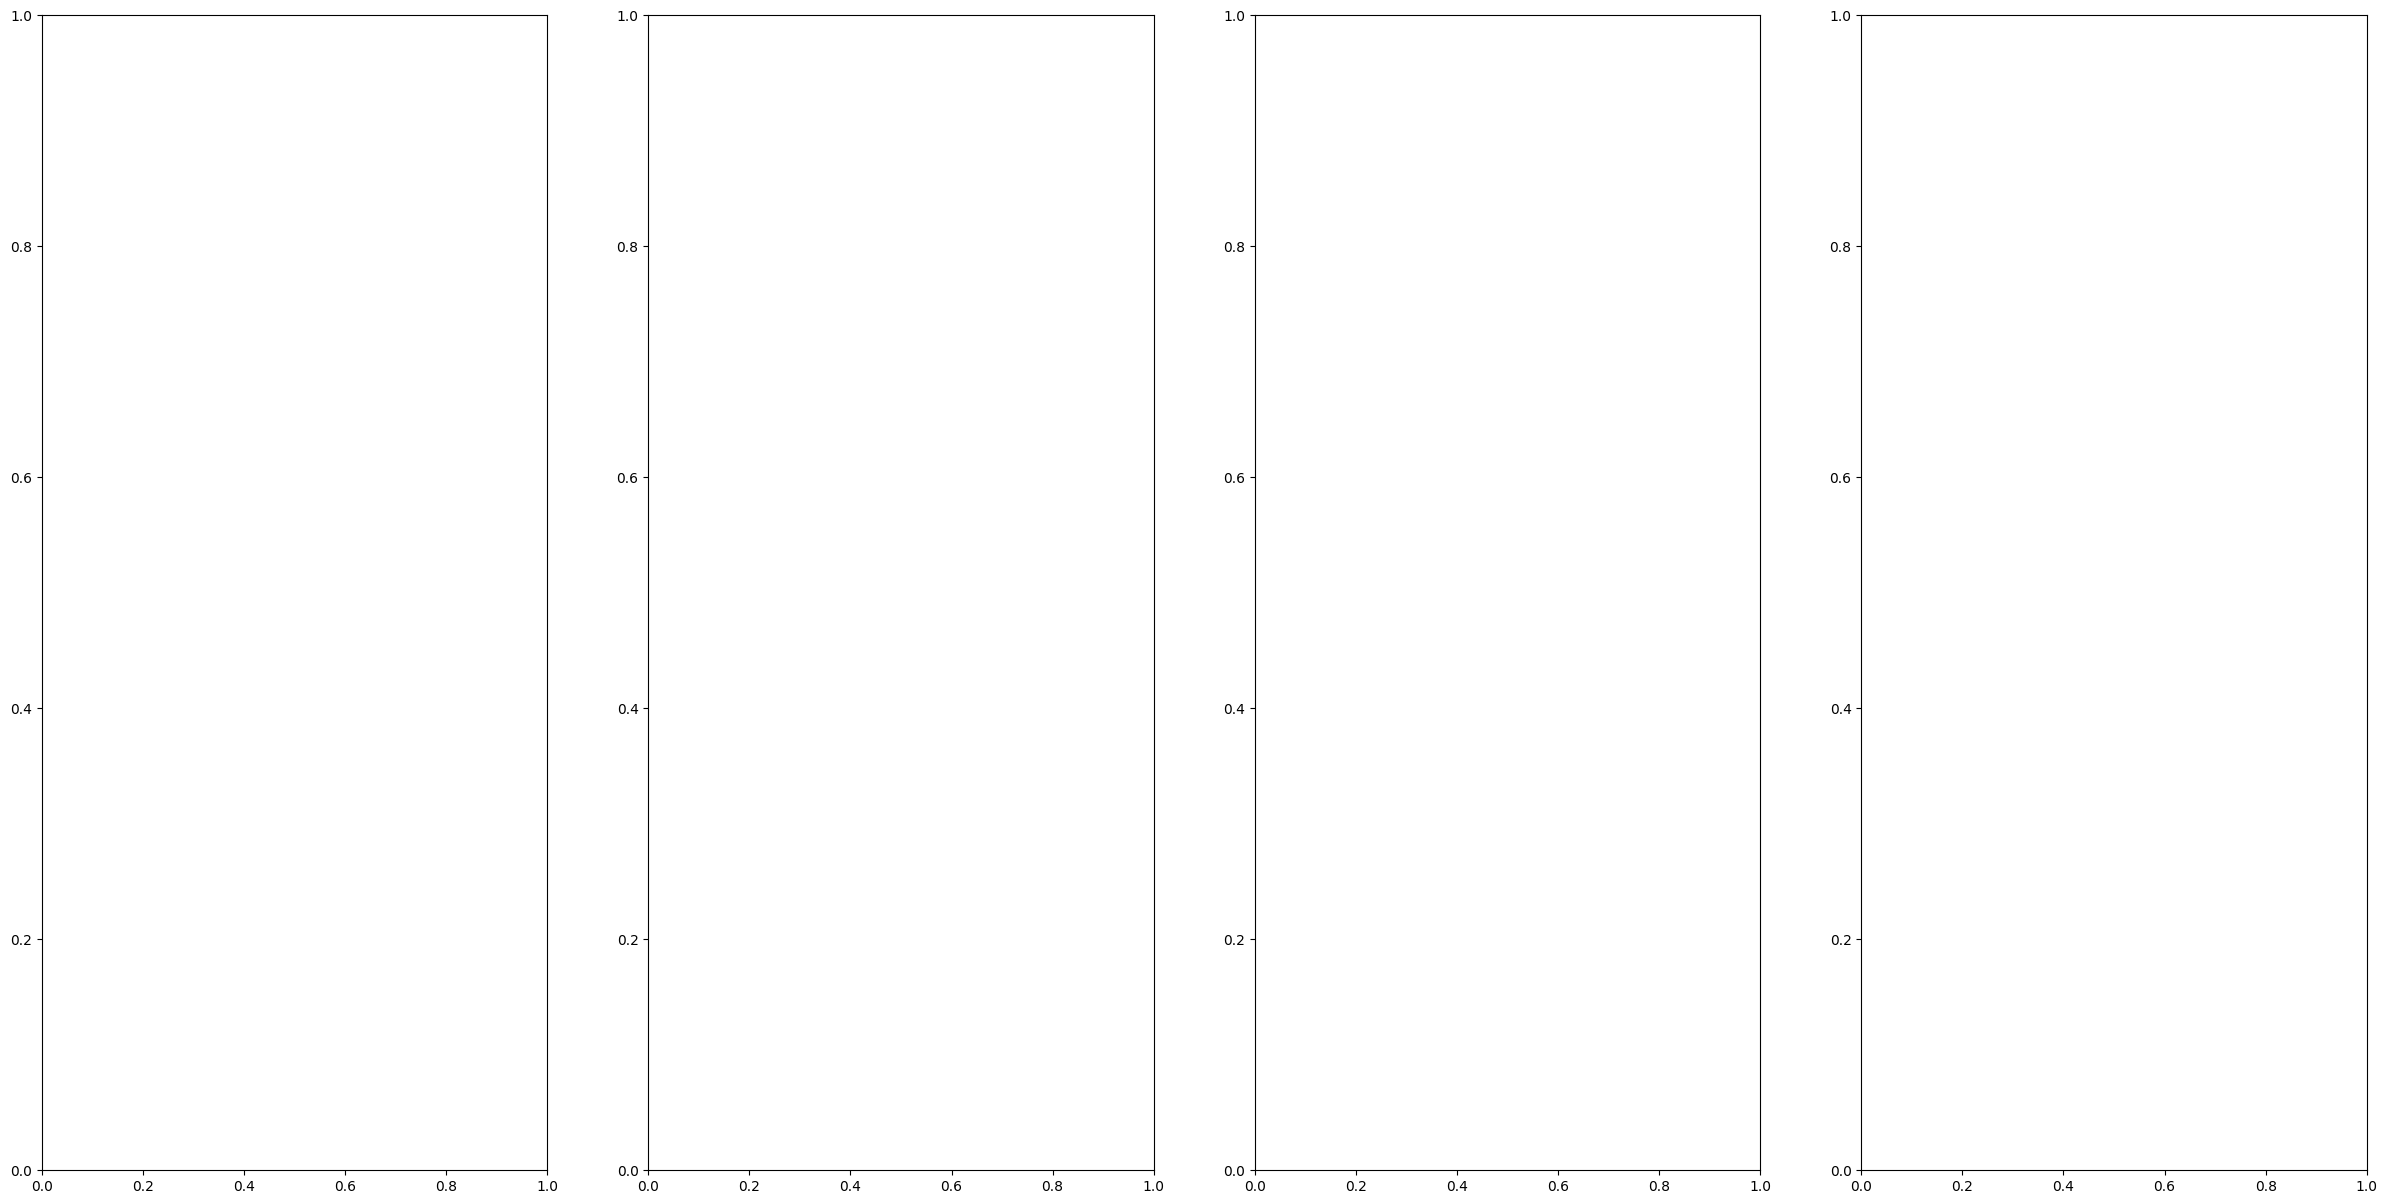

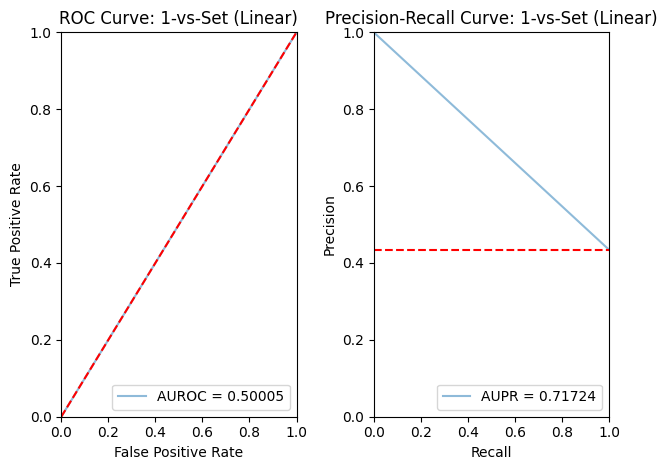

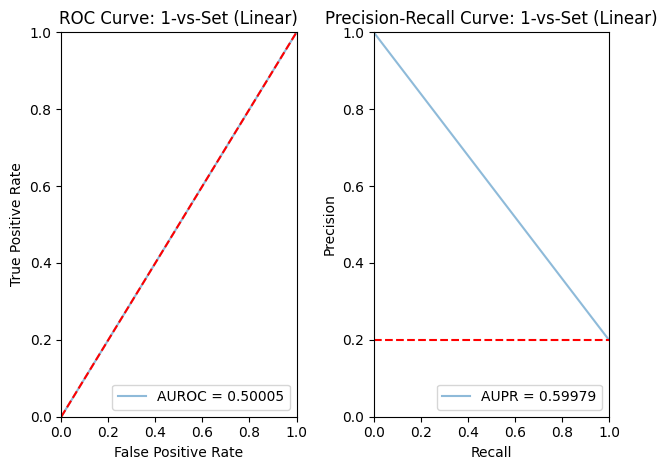

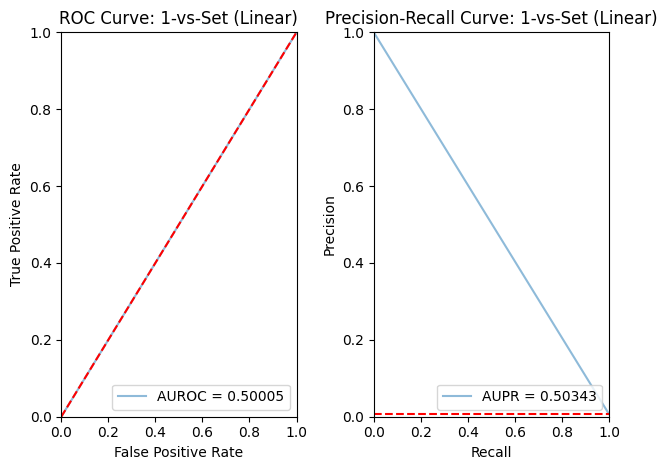

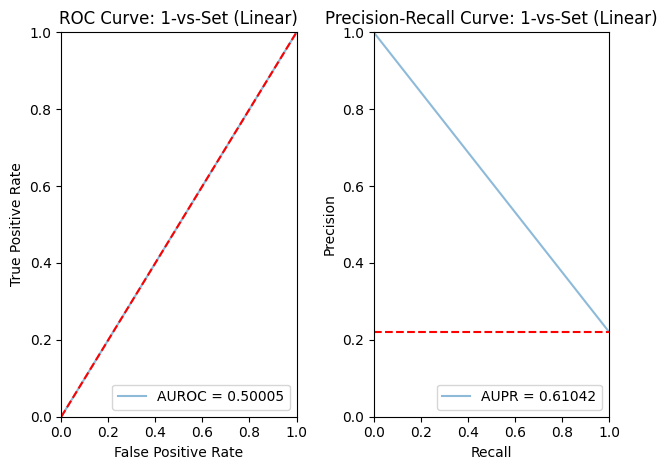

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


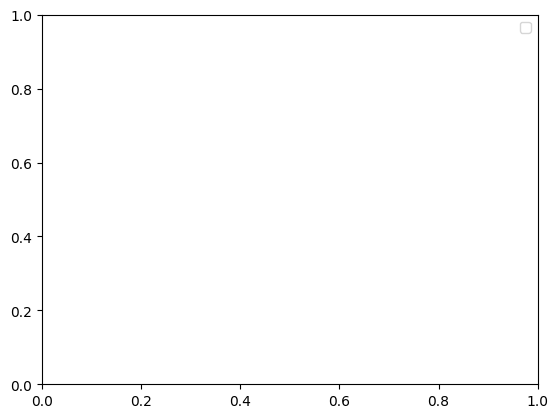

AUPR (Train): 0.7027485189076558+-0.0
AUPR (Test): 0.7846338109390942+-0.0


0  AUPR Mean  AUPR Std
1  0.717239   0.717239       NaN
2  0.599786   0.599786       NaN
3  0.503426   0.503426       NaN
4  0.610416   0.610416       NaN

([0.7027485189076558],
 [0.7846338109390942],
 {0: [0.717239370995923,
   0.5997856730689968,
   0.5034264089188912,
   0.6104156636173969]})

In [42]:
# best_params = {'C': 100.0, 'class_weight': None}

# def one_v_set(y_score, y_max, y_min):
#     return np.logical_or((y_score <= y_max), (y_score >= y_min))

model_name = '1-vs-Set (Linear)'

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

# y_train_normal_indices = (y == 1)
# svm_train_sorted = np.sort(y_train[y_train_normal_indices])
# plt.title("Linear SVM Training Data Predictions")
# plt.hist(y_train[y_train_normal_indices])
# plt.show()

# fpr = 0.05
# svm_train_max = svm_train_sorted[-1]
# svm_train_min = svm_train_sorted[int(fpr * num_normal)]
# print("svm_train_max", svm_train_max)
# print("svm_train_min", svm_train_min)

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
#     svm = SVC(random_state=N, **best_params)
#     svm.fit(X, y)
    y_train_score = svm.decision_function(X)
    y_pred_score = svm.decision_function(x_test)
#     mu = (svm_train_max - svm_train_min) / 2
    # define dist to hyperplane
    mu = (svm_train_max - svm_train_min) / 2
    # define dist to hyperplane
    y_train = np.exp(-((y_train_score - mu) ** 2))
    y_pred = np.exp(-((y_pred_score - mu) ** 2))
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

### Cubic SVM

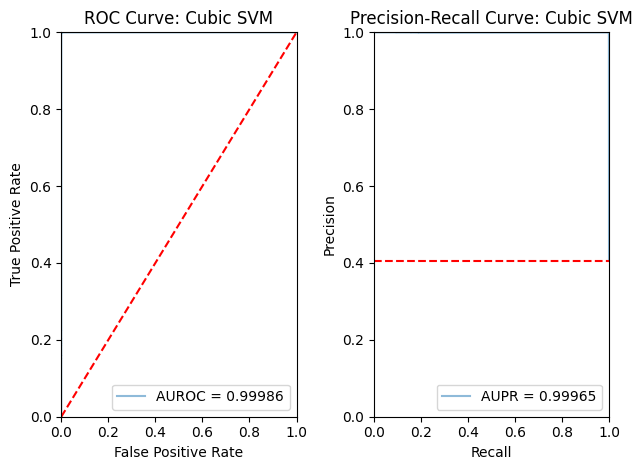

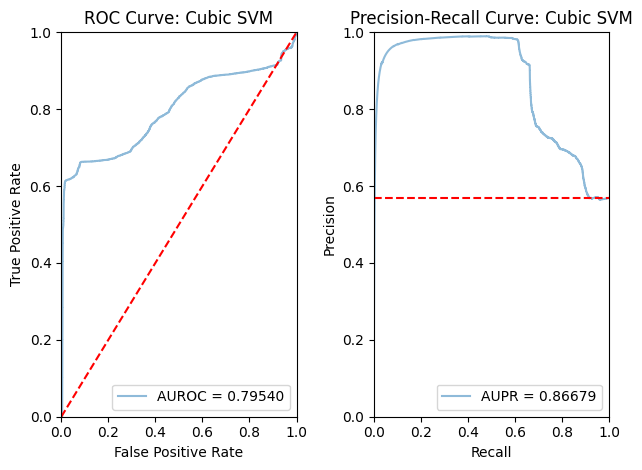

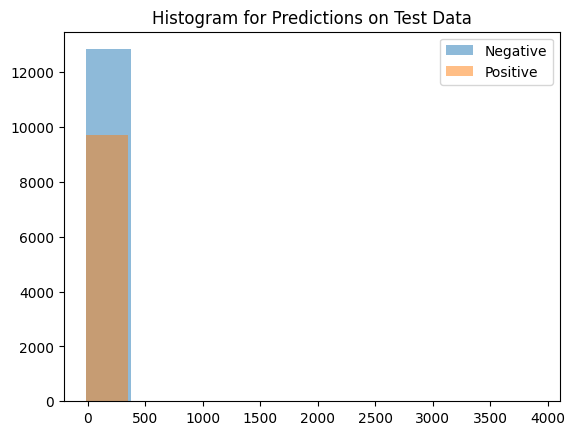

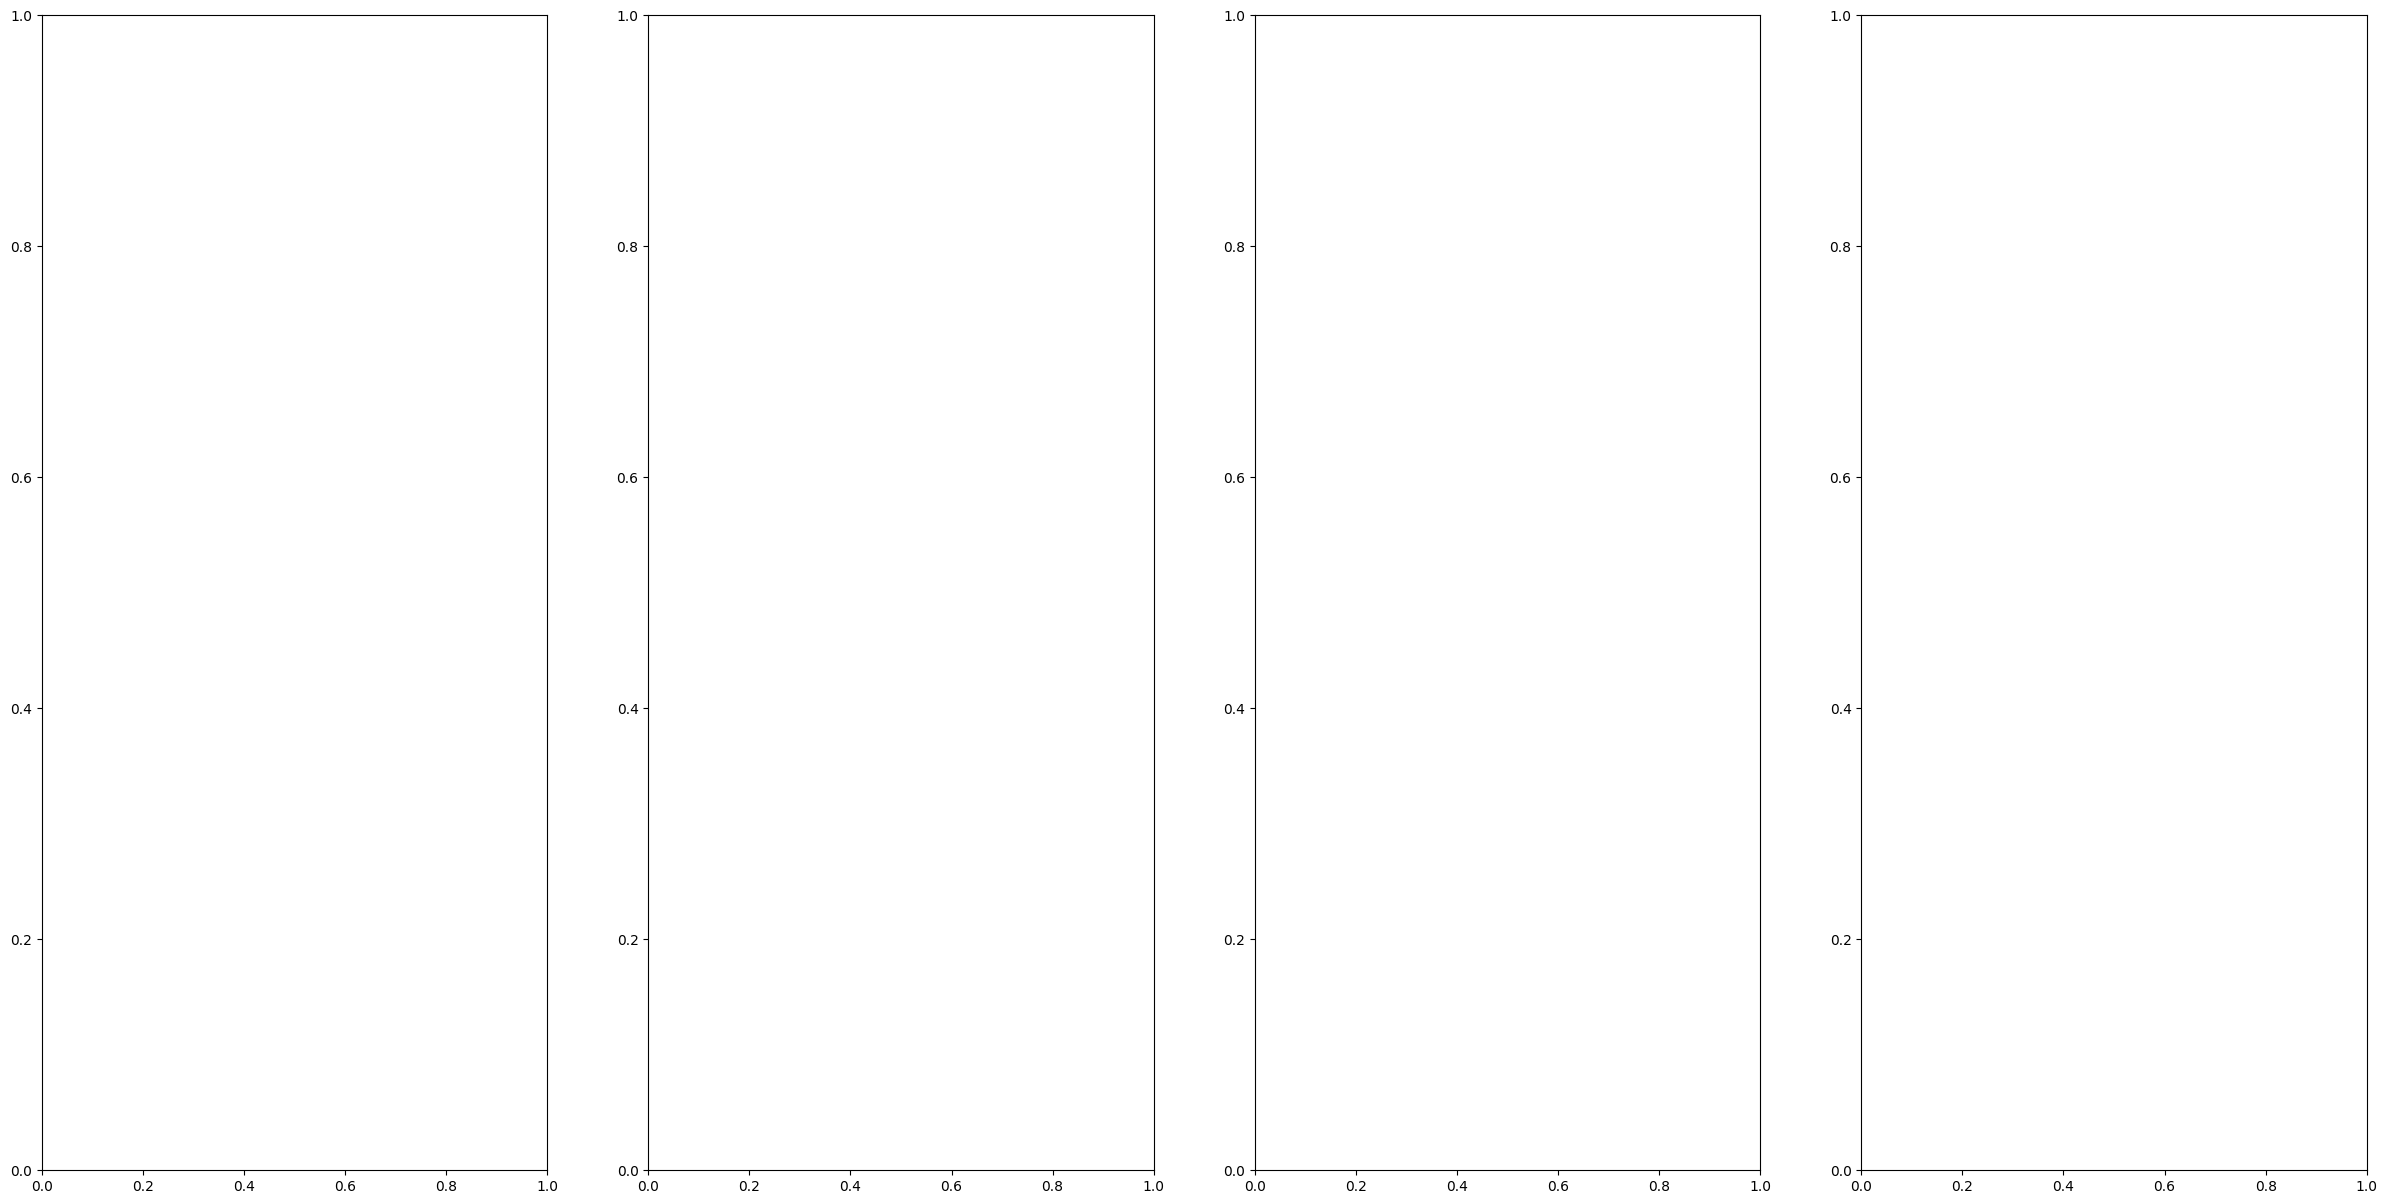

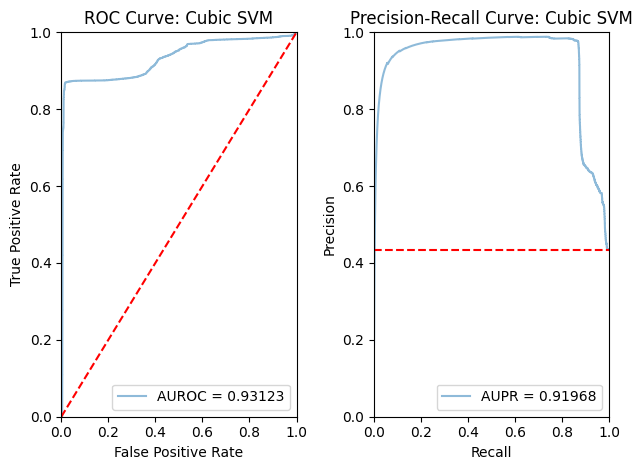

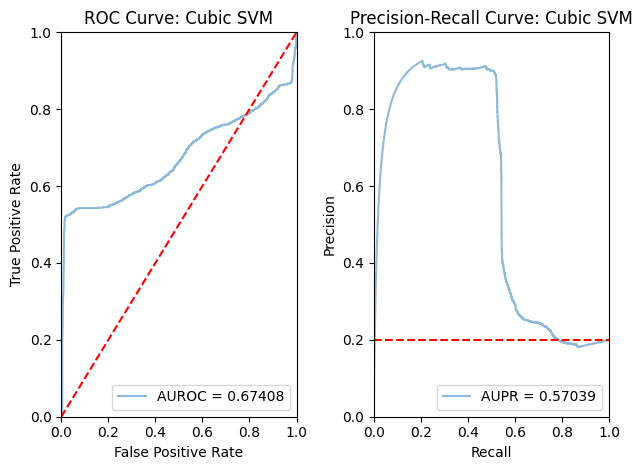

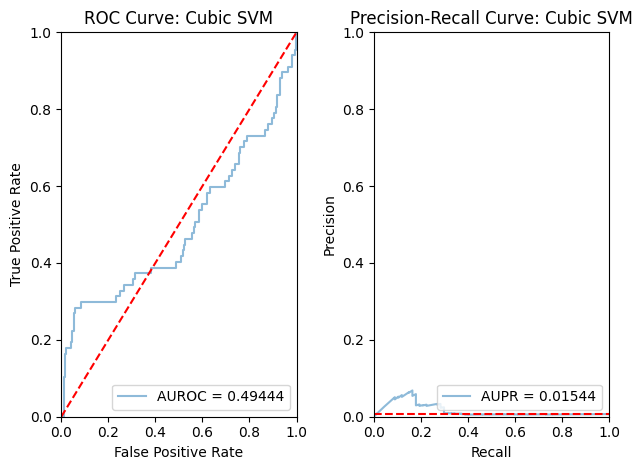

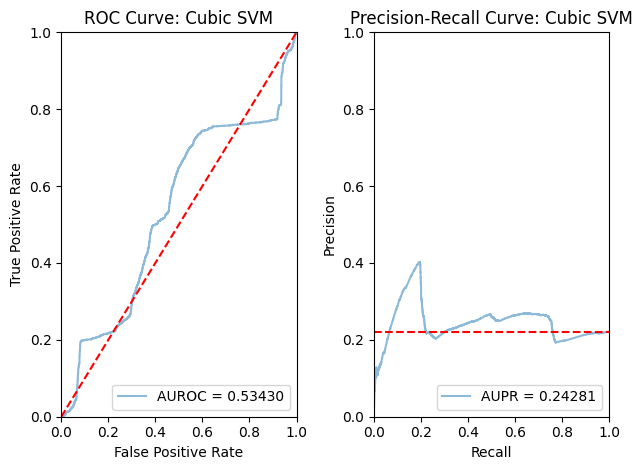

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


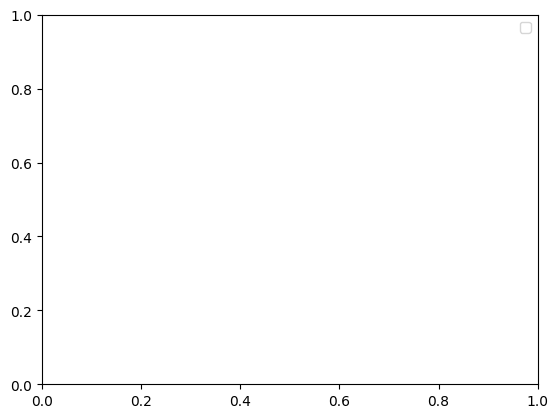

AUPR (Train): 0.9996480858751529+-0.0
AUPR (Test): 0.8667907064521212+-0.0


0  AUPR Mean  AUPR Std
1  0.919680   0.919680       NaN
2  0.570390   0.570390       NaN
3  0.015439   0.015439       NaN
4  0.242805   0.242805       NaN

([0.9996480858751529],
 [0.8667907064521212],
 {0: [0.9196797808266628,
   0.5703897604245793,
   0.015439224147647295,
   0.24280518250348027]})

In [49]:
model_name = 'Cubic SVM'
# model = SVC(kernel='poly', degree=3, random_state=0)

params = {"C": [0.01, 1., 100.], "class_weight": [None, "balanced"]}

# best_params = cross_validate(X, y, model, model_name, params)
best_params = {'C': 100.0, 'class_weight': 'balanced'}
# print(best_params)

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

auprs_test = []
auprs_train = []
aupr_attacks = dict()

for N in range(repeats):

#     svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=N)
    svm = SVC(random_state=N, kernel='poly', degree=3, **best_params)
    svm.fit(X, y)
    y_train = svm.decision_function(X)
    y_pred = svm.decision_function(x_test)
    
    aupr_train = get_metrics(y_train, y, model_name, plot=plot)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()


    indiv=new_attacks
    att_labels=test_df['attack_map']
    # get indiv auprs for different attacks
    y_normal = len(y_pred_pos)
    fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))

    aupr_attack = []
    for i, att in enumerate(indiv):
        y_att = y_pred[att_labels == att].squeeze()
    #             print(y_pred_pos.shape)
    #             print(y_att.shape)
    #             print(y_normal)
        aupr_attack.append(
            get_metrics(
                np.hstack((y_pred_pos, y_att)), 
                np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                model_name, plot=plot)
        )
        
        ax[i].set_title(f"Attack Pred")
        ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
        ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
        ax[i].legend()
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack

print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

# Unsupervised

In [12]:
from itertools import product
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import time

def cross_validate_unsupervised(Model, params_dict, model_name, seed=0, plot=False, folds=10):

    param_names = list(params_dict.keys())
    param_values = (zip(param_names, x) for x in product(*params_dict.values()))

    param_list = []
    cv_scores = []

    for paramset in param_values:
        
        params = dict(paramset)
        print("Params:", params)

        cv_scores.append(calculate_cv_score(Model, params, seed=seed, folds=folds))

        param_list.append(params)

    print("Get Min CV Score")
    i = np.argmin(cv_scores)
    params = param_list[i]
    
    # Visualization
    if seed:
        model = Model(random_state=seed, **params)
    else:
        model = Model(**params)
    
    model.fit(X)
    
    print("Train")
    y_pred = model.score_samples(X)
    eval_plot(y, y_pred, model_name)

    print("Test")
    y_pred = model.score_samples(x_test)
    eval_plot(y_test, y_pred, model_name)

    y_pred_pos = y_pred[y_test == 1]
    y_pred_neg = y_pred[y_test == 0]
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()

    if plot:
        y_pred = model.score_samples(data_viz)
        viz_boundary(data_viz, y_pred, grid=grid, model_name=model_name)
    
    return params


def calculate_cv_score(Model, params, seed=0, folds=10):

    kf = StratifiedKFold(n_splits=folds, shuffle=False)

    cv_loss = 0

    for i, (train_indices, val_indices) in enumerate(kf.split(X, y)):
        print("Fold", i+1, end=", ")
        x_train, y_train = X[train_indices], y[train_indices]
        x_val, y_val = X[val_indices], y[val_indices]
        
        start_time = time.time()
        
        if seed:
            model = Model(random_state=seed, **params)
        else:
            model = Model(**params)
        model.fit(x_train)
        
        end_time = time.time()
        print(f"Time: {end_time-start_time}s", end=", ")
        
        y_pred = model.score_samples(x_val)
        loss = metrics.log_loss(y_val, y_pred)
        
        print(f"Loss: {loss}")
        cv_loss += loss
    print(f"Total Loss: {cv_loss}")
    return cv_loss

Params: {'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'auto', 'shrinking': True}
Fold 1, Time: 986.6963763237s, Loss: 14.009527253924318
Fold 2, Time: 988.7129762172699s, Loss: 14.010235955786253
Fold 3, Time: 983.3874220848083s, Loss: 14.012336509831629
Total Loss: 42.0320997195422
Params: {'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'scale', 'shrinking': True}
Fold 1, Time: 986.0450766086578s, Loss: 14.009662133919646
Fold 2, Time: 982.5204164981842s, Loss: 14.01033939084052
Fold 3, Time: 975.8684074878693s, Loss: 14.012580247351433
Total Loss: 42.0325817721116
Get Min CV Score
Train


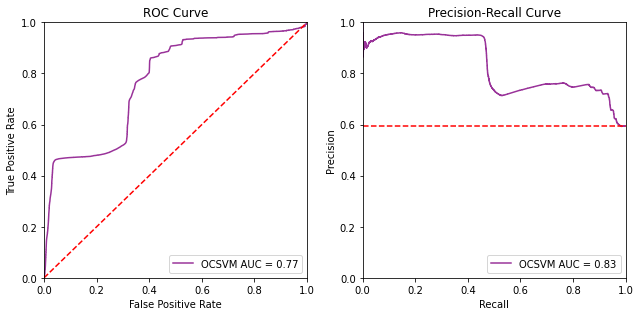

Test


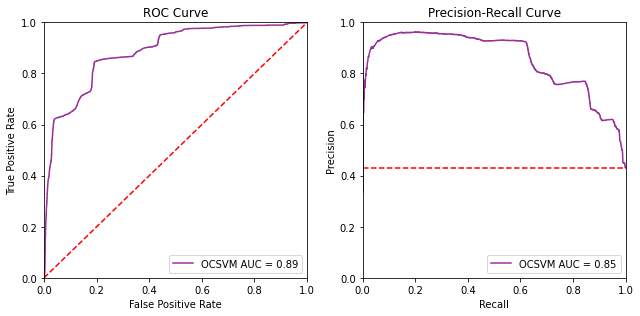

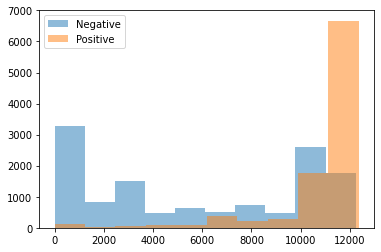

{'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'auto', 'shrinking': True}


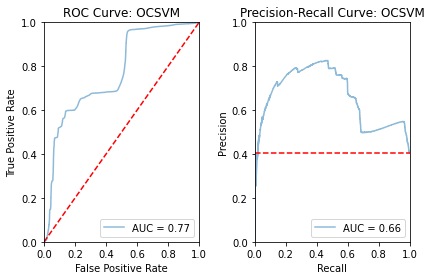

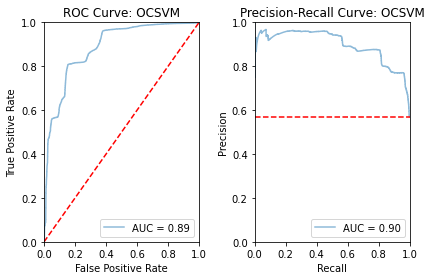

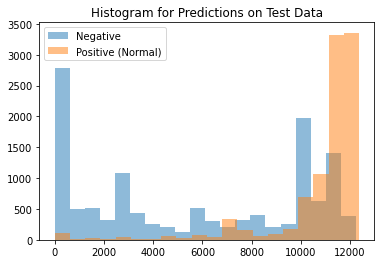

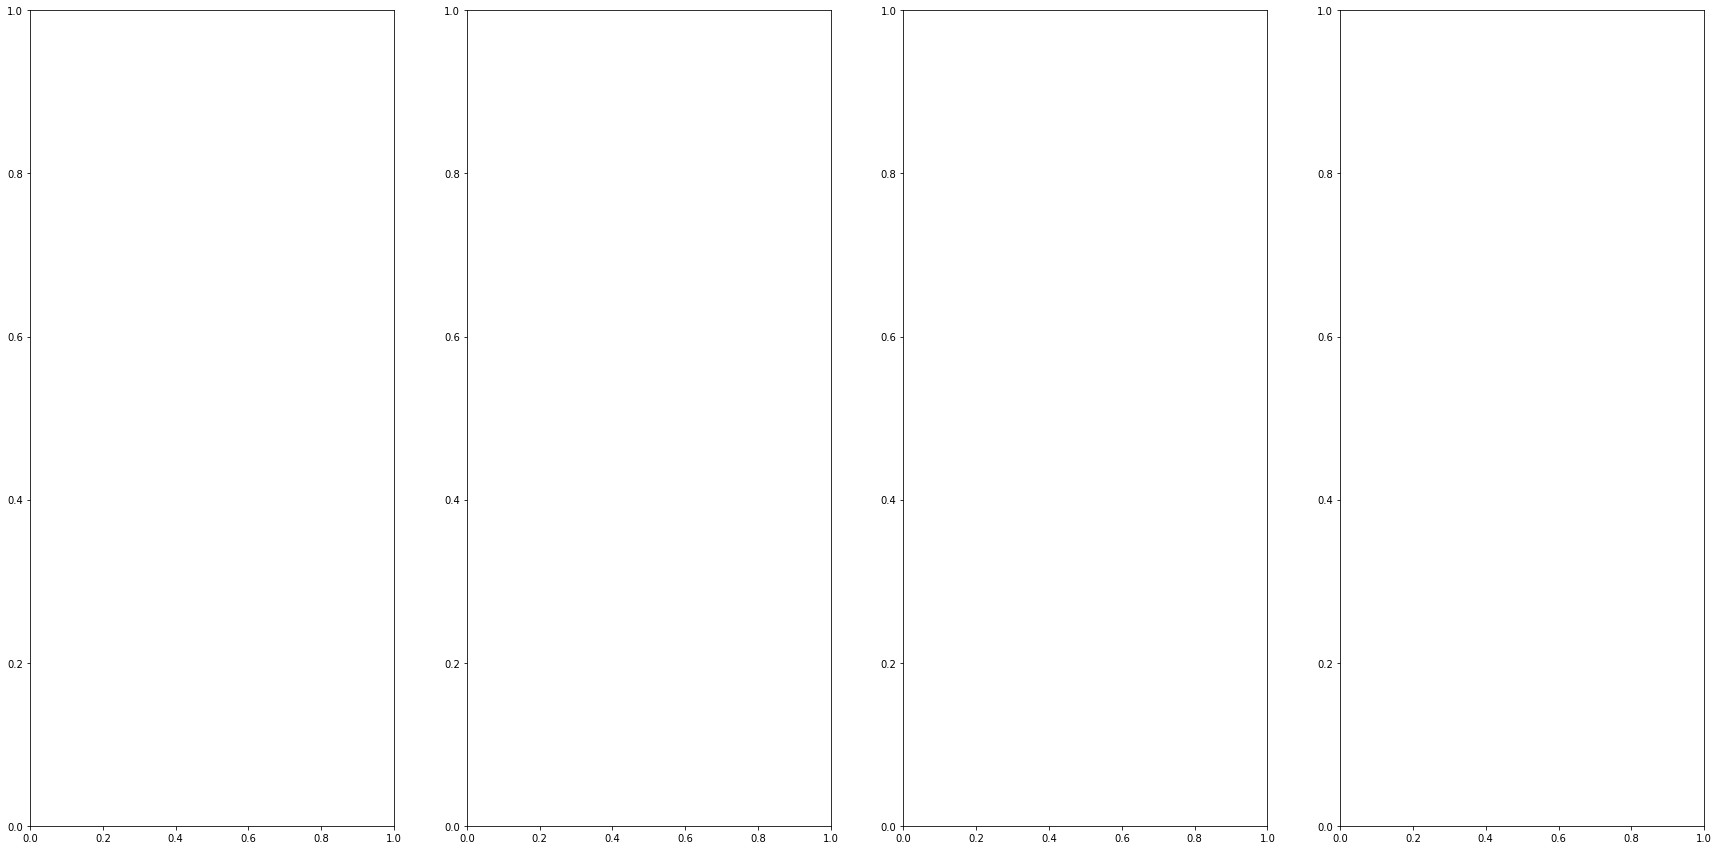

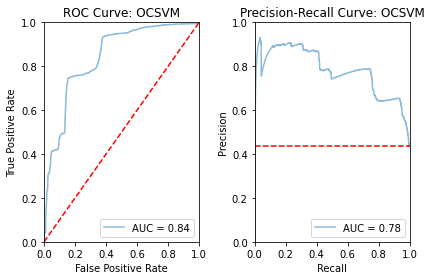

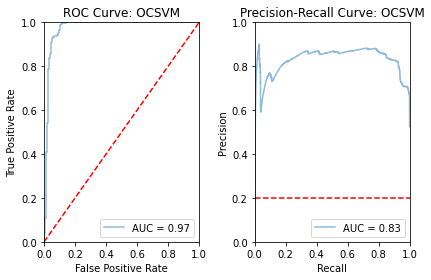

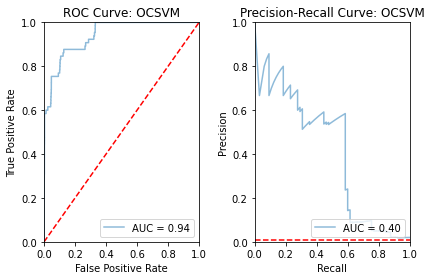

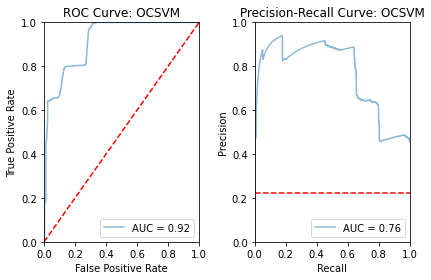

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


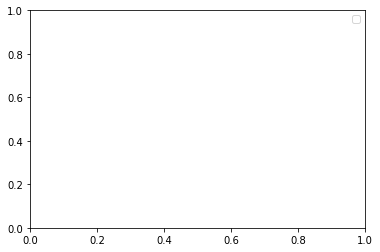

AUPR (Train): 0.6552928402083422+-0.0
AUPR (Test): 0.8973125529798536+-0.0


0  AUPR Mean  AUPR Std
1  0.778874   0.778874       NaN
2  0.827485   0.827485       NaN
3  0.404611   0.404611       NaN
4  0.760111   0.760111       NaN

([0.6552928402083422],
 [0.8973125529798536],
 {0: [0.7788735663139467,
   0.8274852623693578,
   0.40461107811817776,
   0.7601110844710725]})

In [15]:
# CROSS VALIDATION

model_name ="OCSVM"
params_dict = {
    "kernel": ["rbf"],
    "nu": [1 - np.sum(y)/len(y)],
    "gamma": ["auto", "scale"],
    "shrinking": [True]
         }

best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False, folds=3)
# best_params = {'kernel': 'rbf',
#                'nu': 1 - np.sum(y)/len(y),
#                'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

# no variance
repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Params: {'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'auto', 'shrinking': True}
Fold 1, Time: 0.08331561088562012s, Loss: 15.218698333034226
Fold 2, Time: 0.07599711418151855s, Loss: 8.914795770729764
Fold 3, Time: 0.06809306144714355s, Loss: 8.925543048072244
Total Loss: 33.059037151836236
Params: {'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'scale', 'shrinking': True}
Fold 1, Time: 0.23720026016235352s, Loss: 15.627637183465918
Fold 2, Time: 0.24596166610717773s, Loss: 8.928355164210558
Fold 3, Time: 0.2287130355834961s, Loss: 8.975126739909756
Total Loss: 33.531119087586234
Get Min CV Score
Train


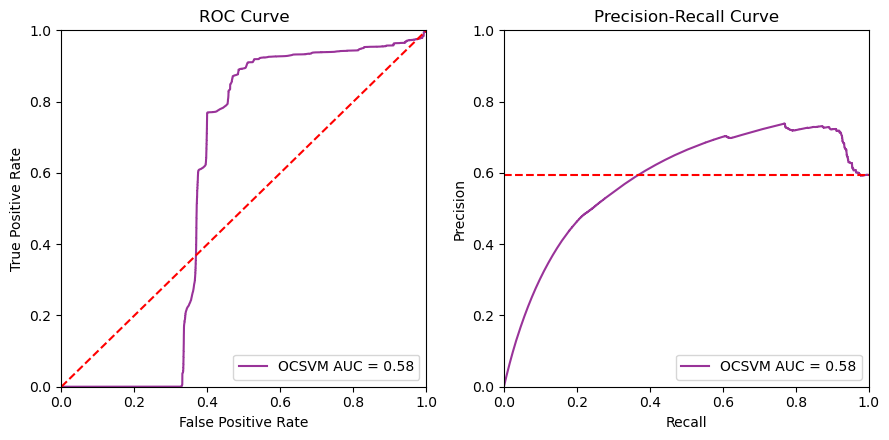

Test


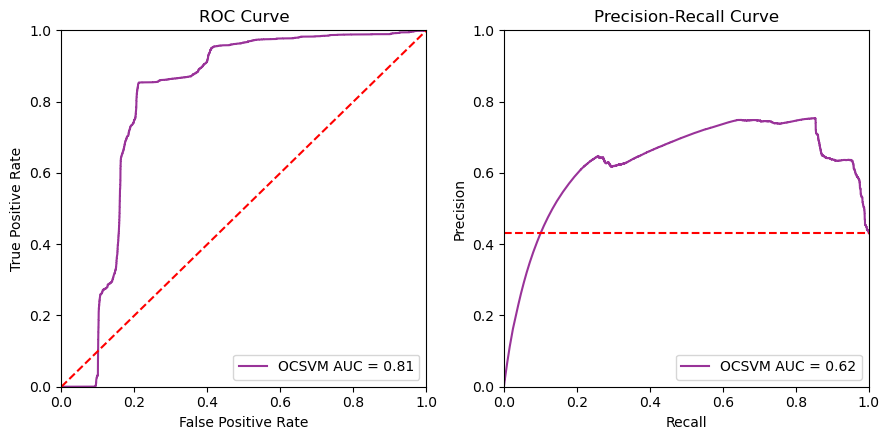

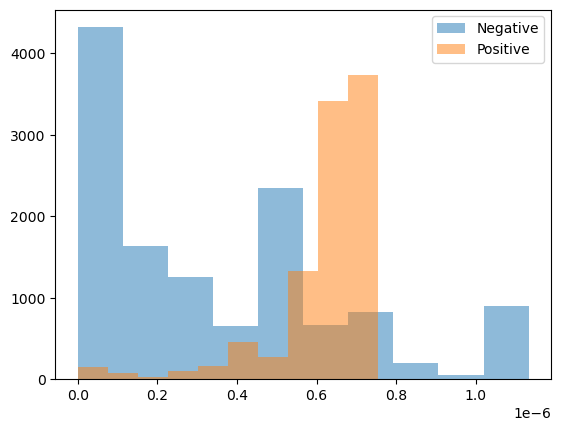

{'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'auto', 'shrinking': True}


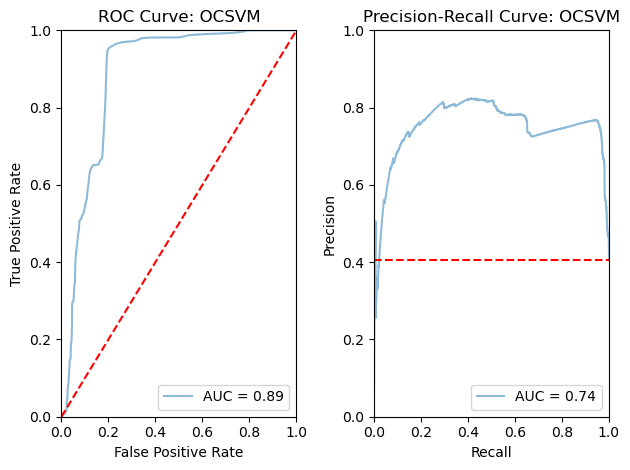

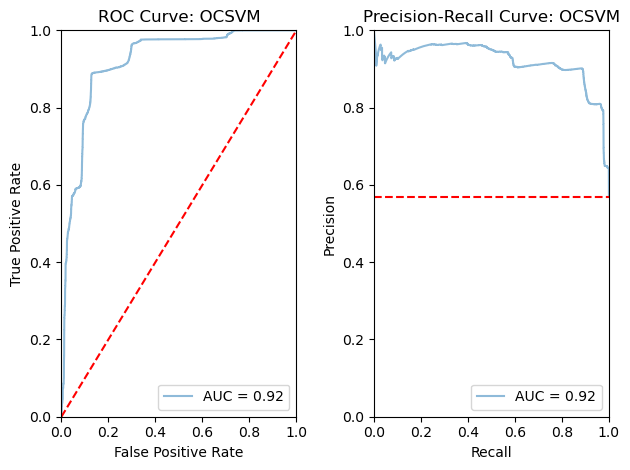

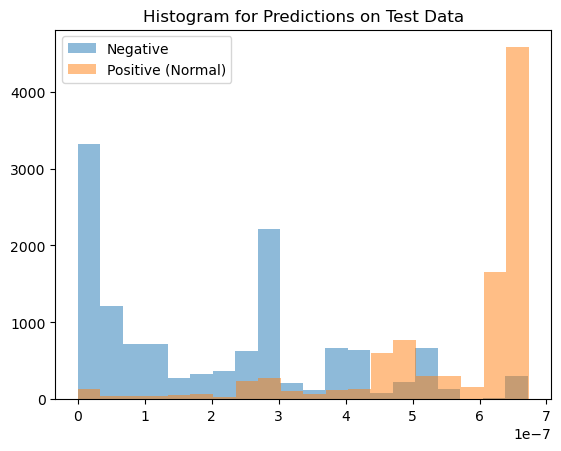

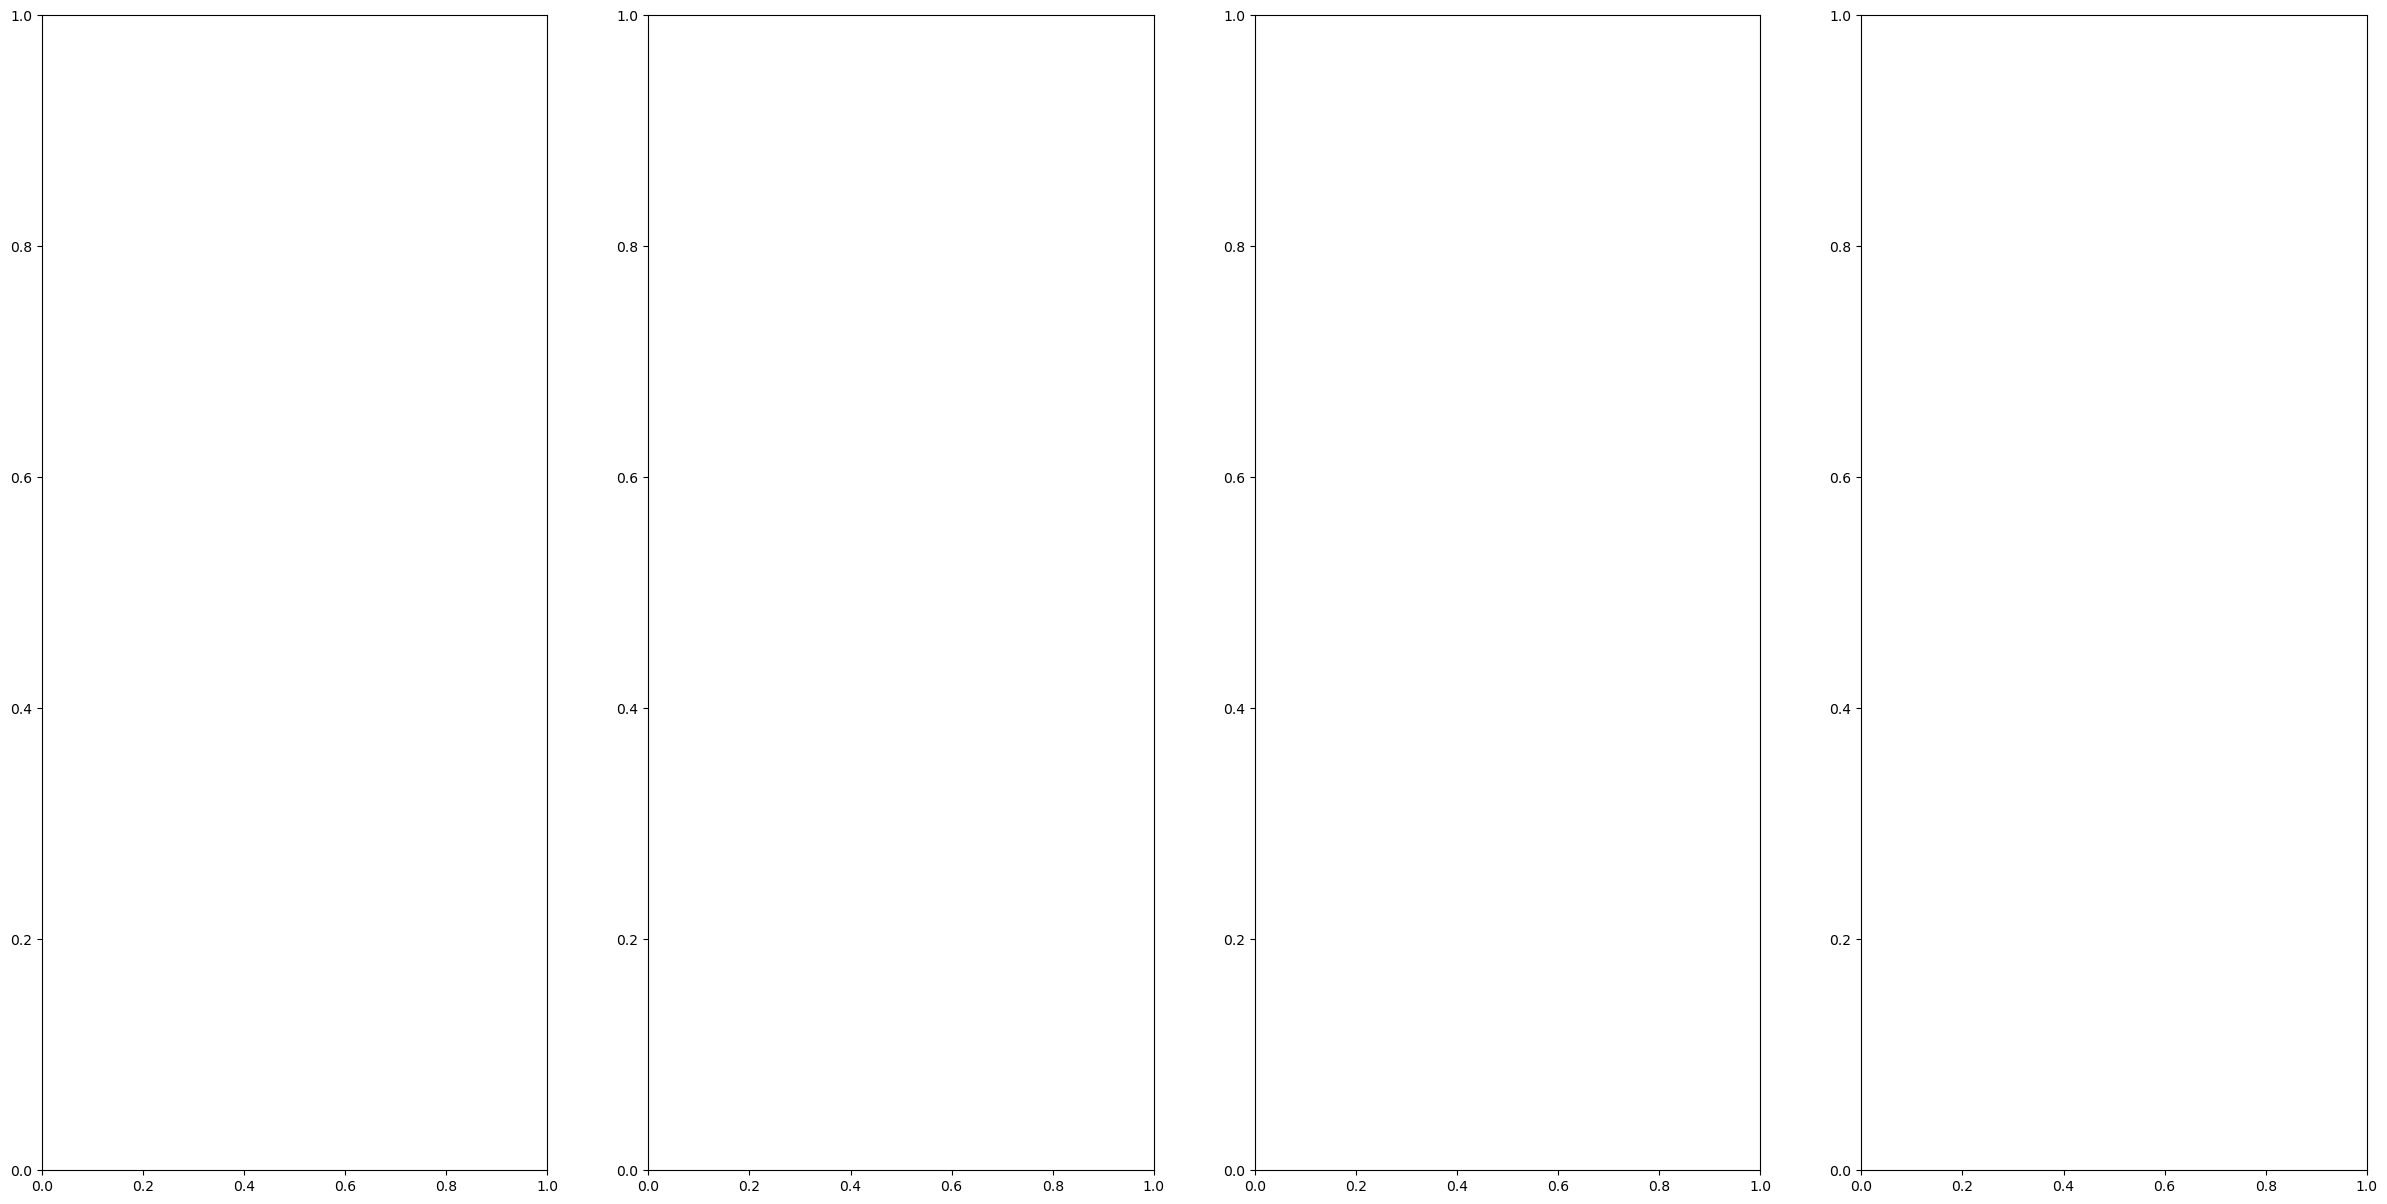

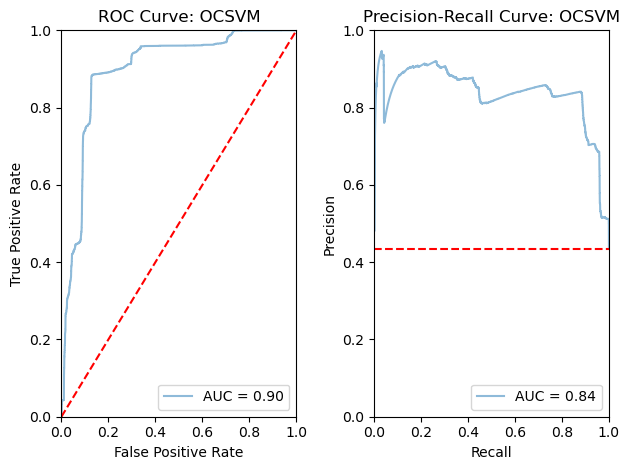

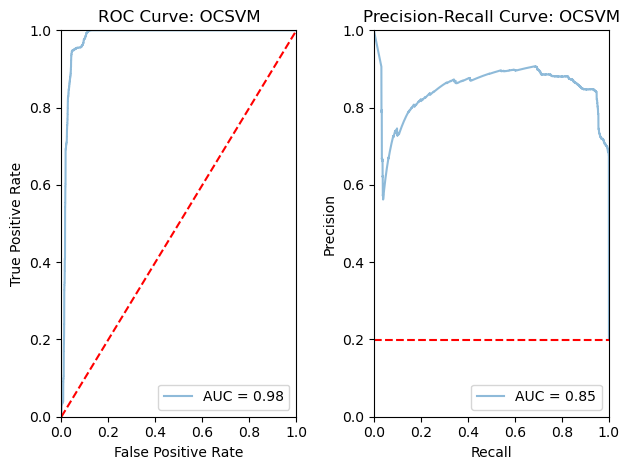

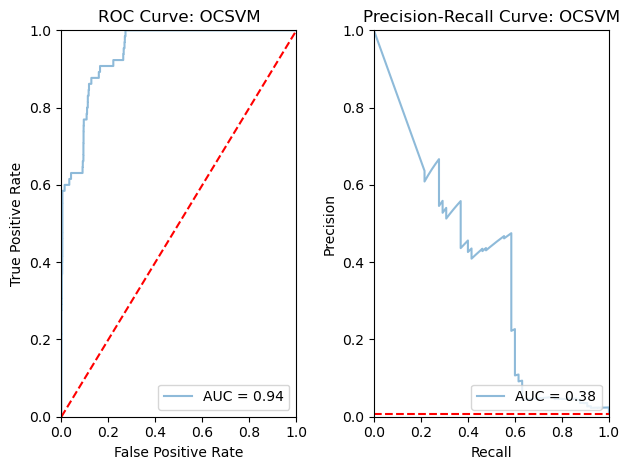

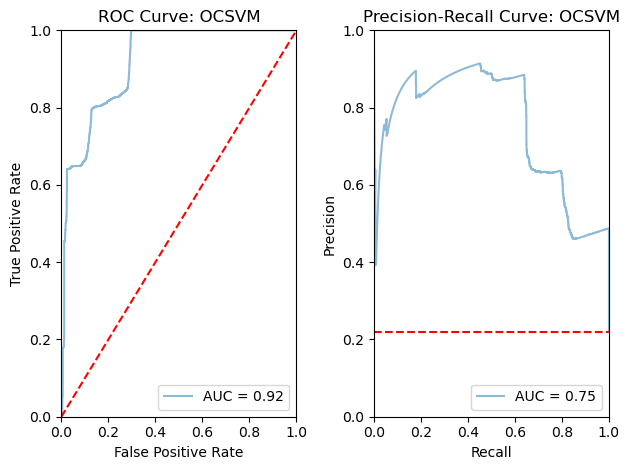

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


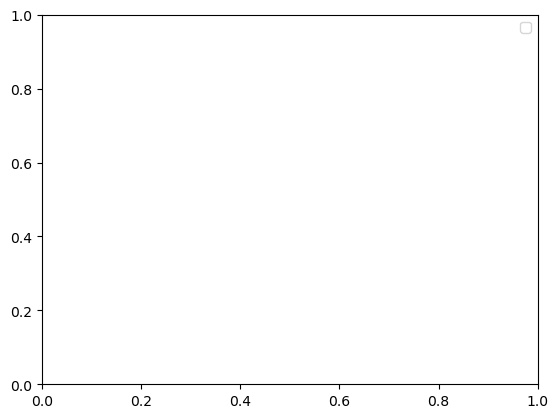

AUPR (Train): 0.74319521485351+-0.0
AUPR (Test): 0.9195074528031113+-0.0


0  AUPR Mean  AUPR Std
1  0.835292   0.835292       NaN
2  0.846722   0.846722       NaN
3  0.382155   0.382155       NaN
4  0.745096   0.745096       NaN

([0.74319521485351],
 [0.9195074528031113],
 {0: [0.8352924238683158,
   0.8467222062149918,
   0.38215519904416656,
   0.7450960939923835]})

In [16]:
# CROSS VALIDATION

model_name ="OCSVM"
params_dict = {
    "kernel": ["rbf"],
    "nu": [0.00000000001],
    "gamma": ["auto", "scale"],
    "shrinking": [True]
         }

best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False, folds=3)
# best_params = {'kernel': 'rbf',
#                'nu': 1 - np.sum(y)/len(y),
#                'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X[y==1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 'auto

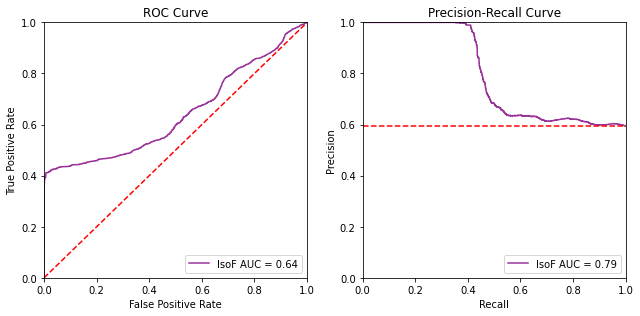

Test


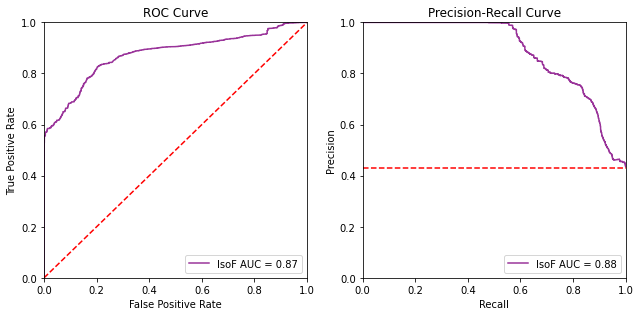

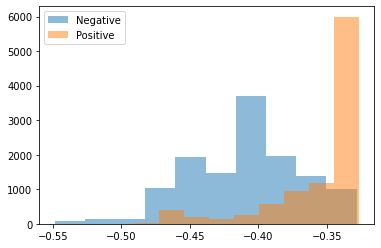

{'n_estimators': 50, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}


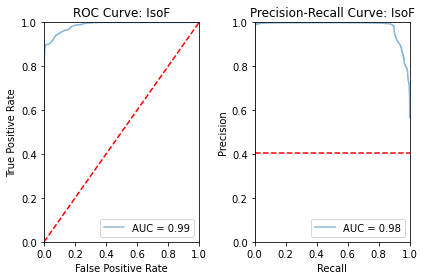

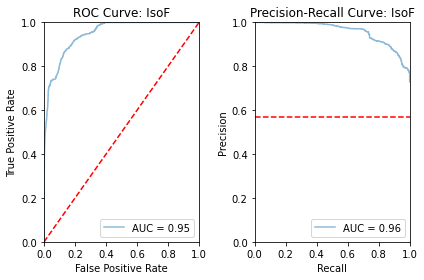

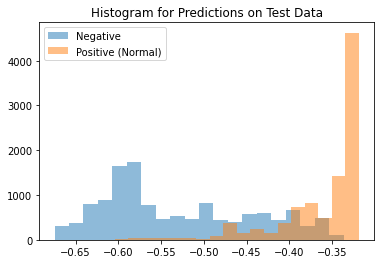

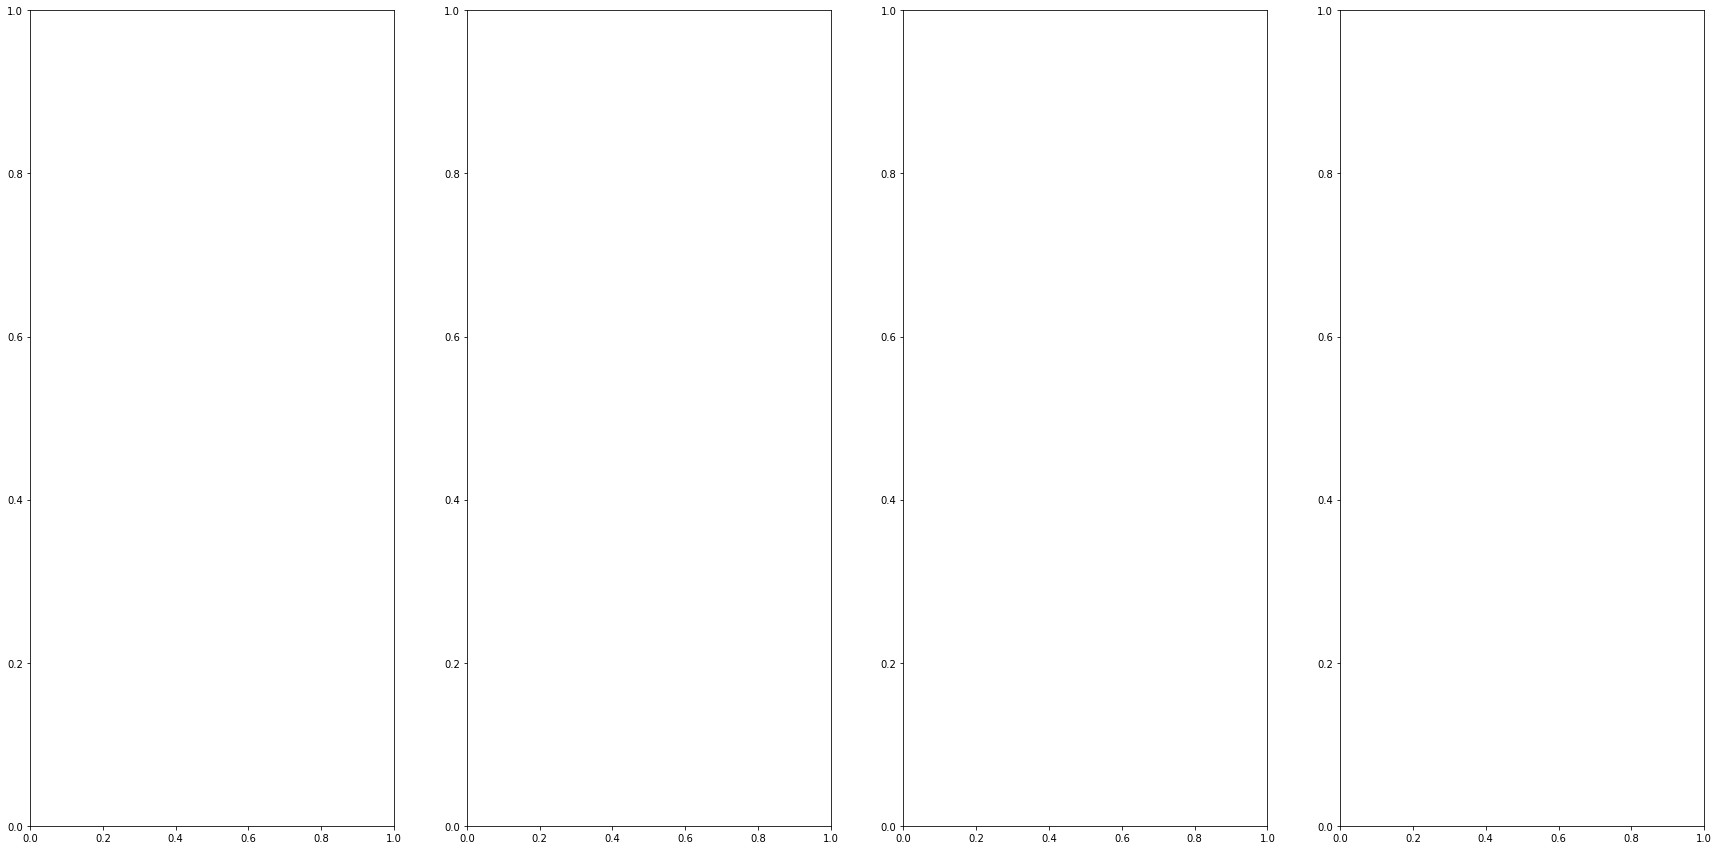

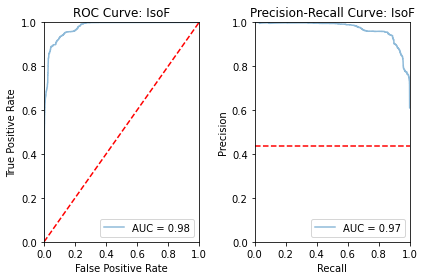

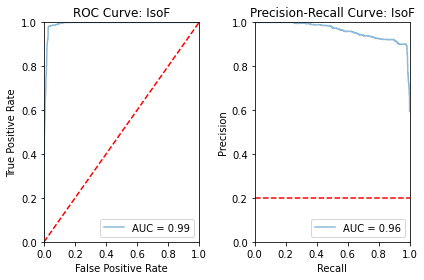

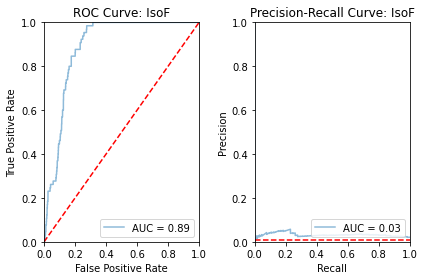

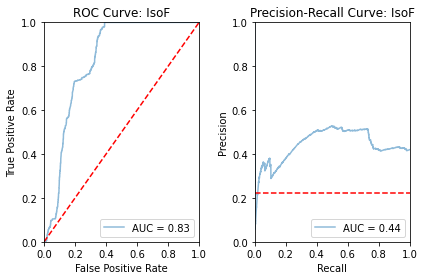

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


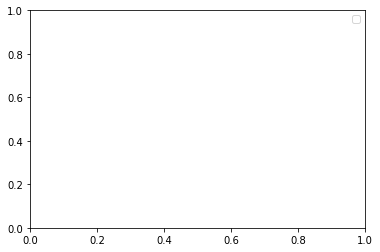

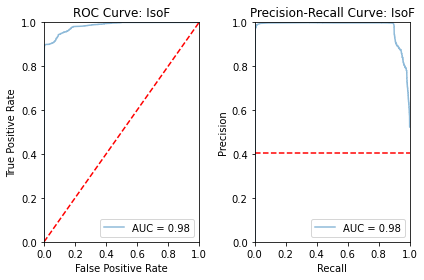

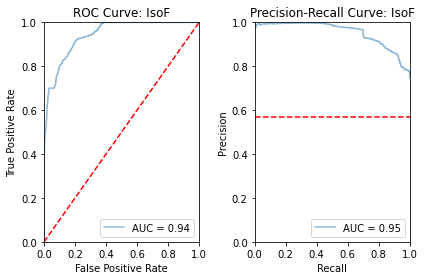

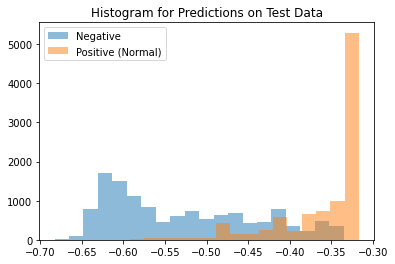

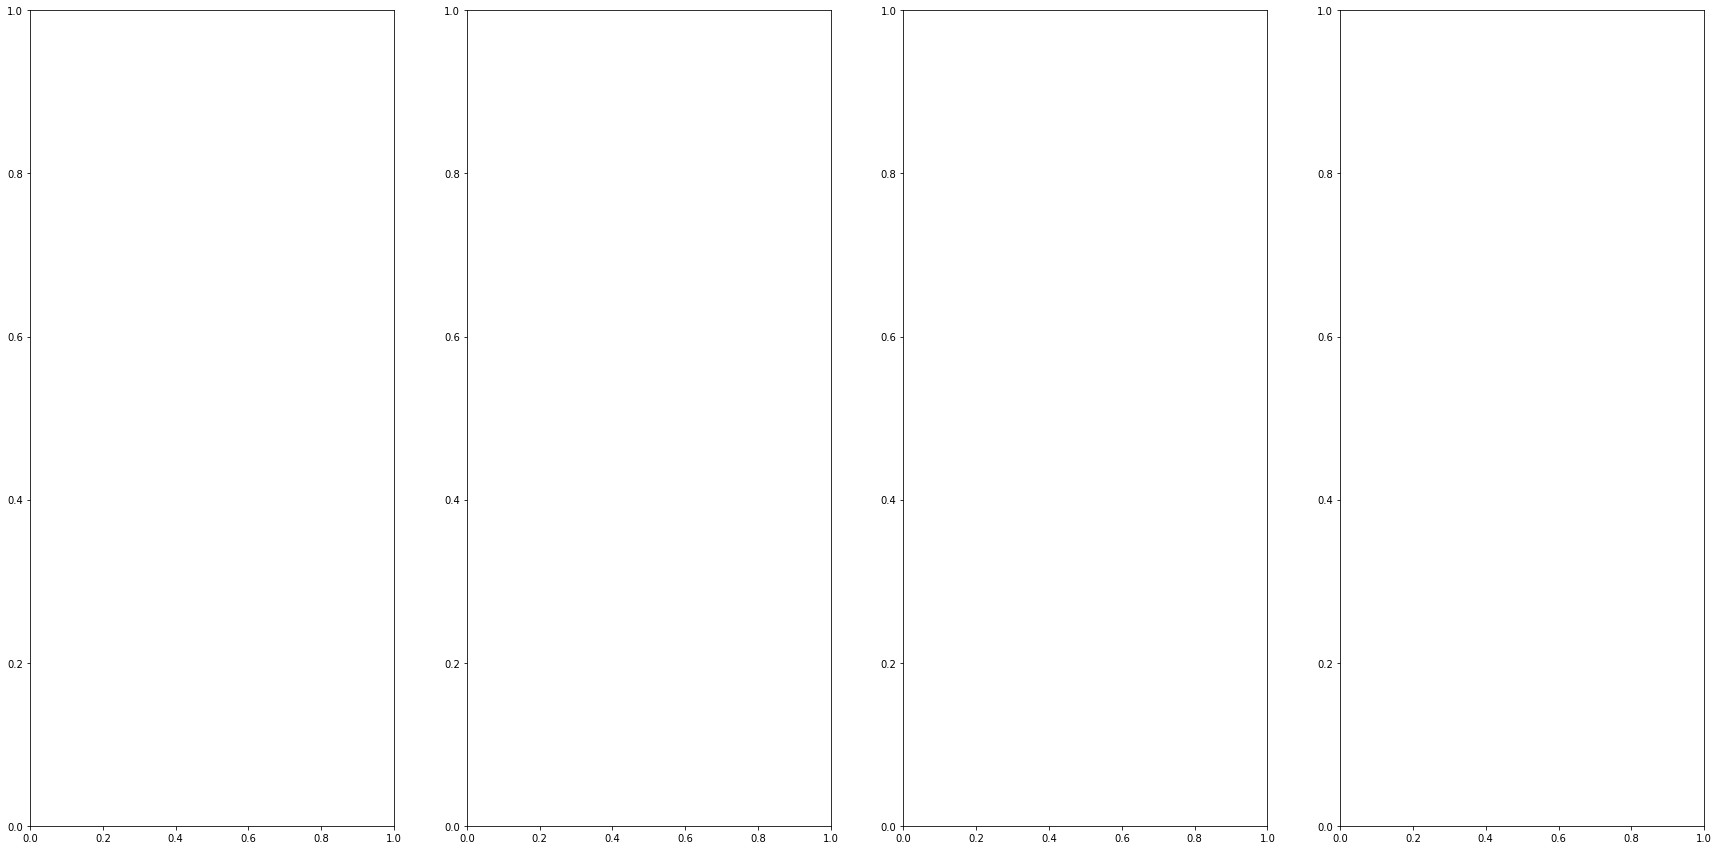

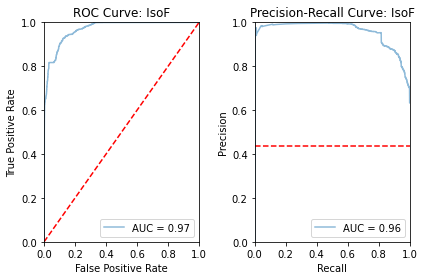

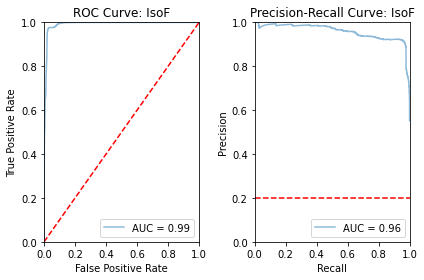

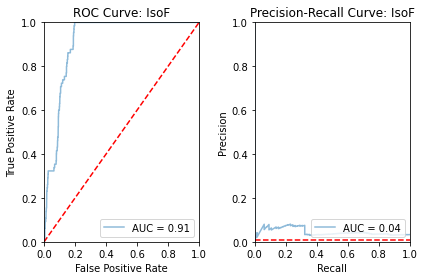

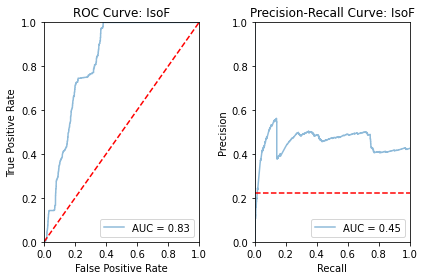

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


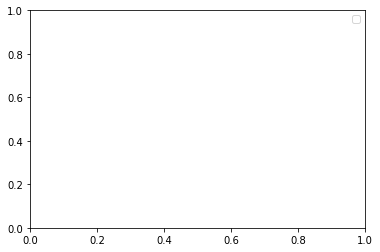

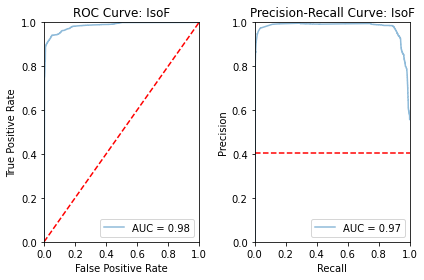

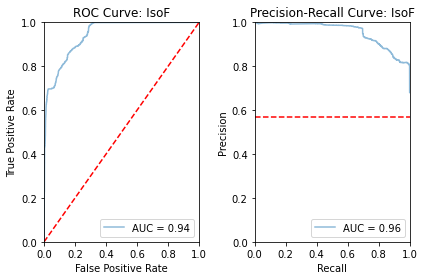

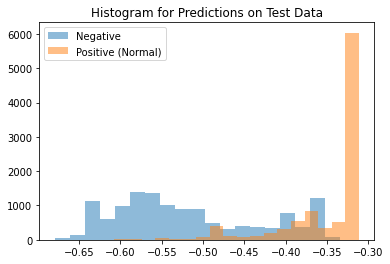

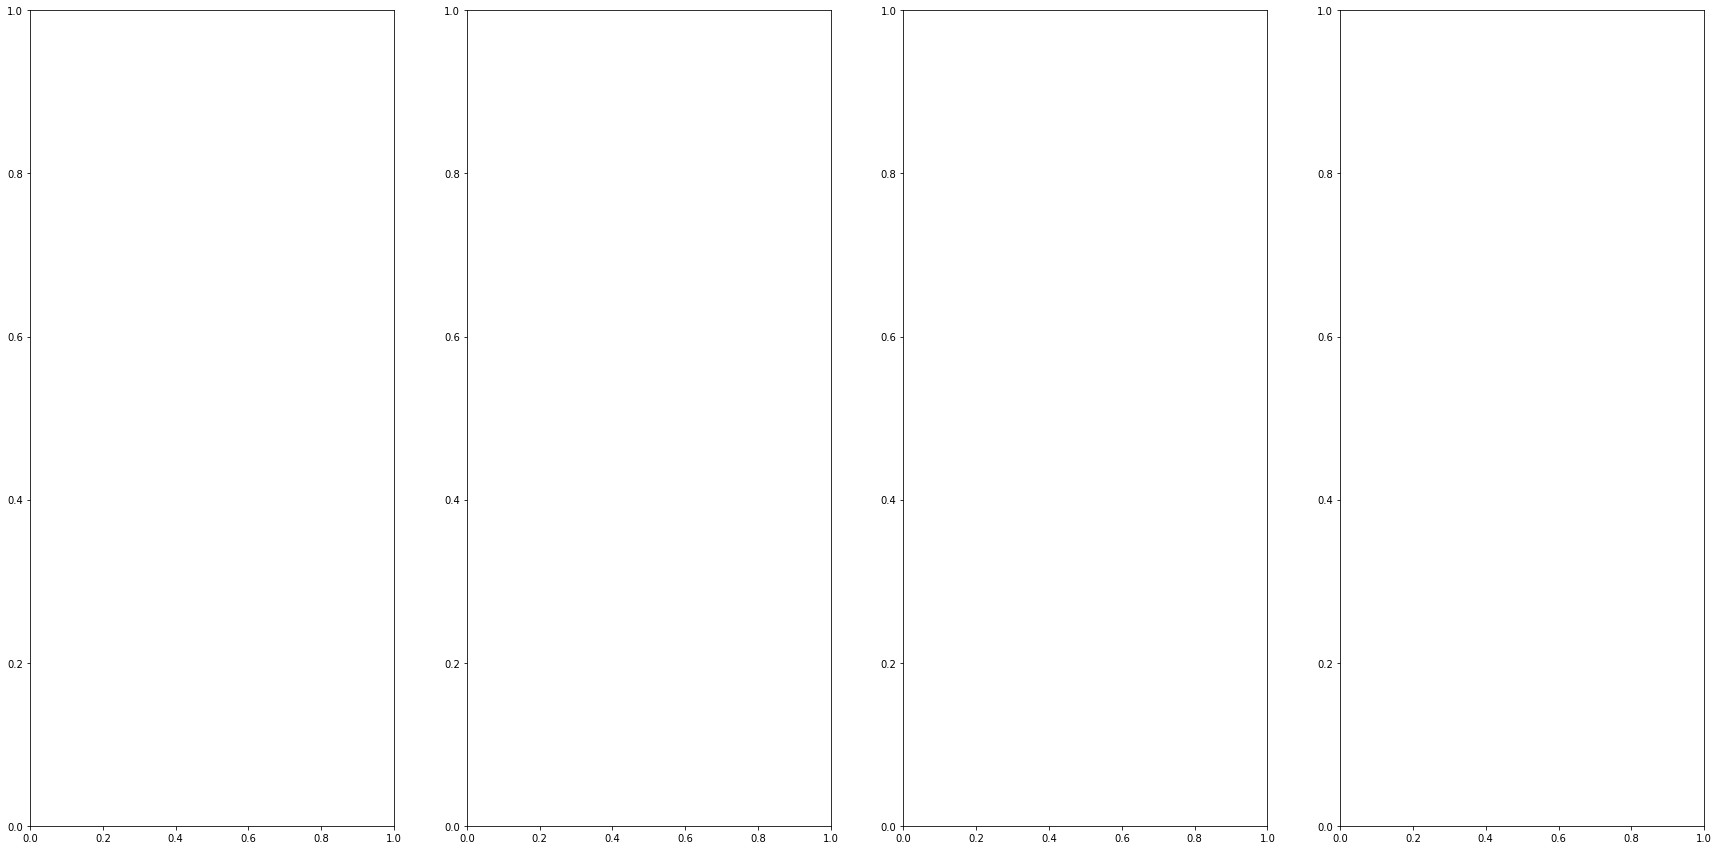

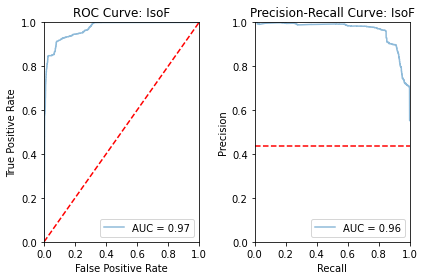

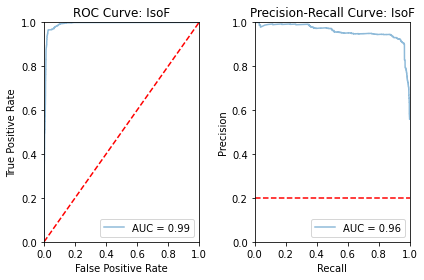

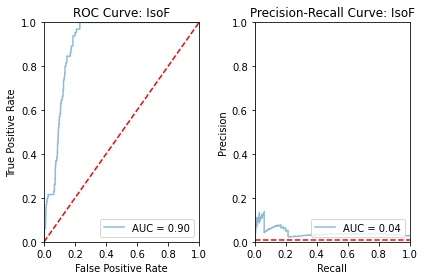

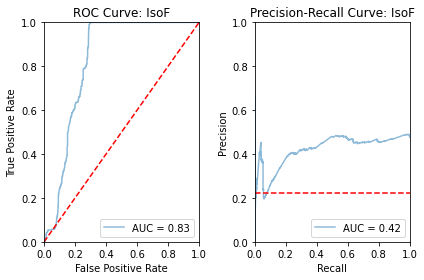

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


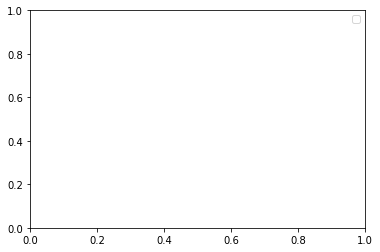

AUPR (Train): 0.9790789196357781+-0.003348154083681815
AUPR (Test): 0.9565368582856651+-0.001994905740015534


0         1         2  AUPR Mean  AUPR Std
1  0.970147  0.958362  0.964513   0.964341  0.005895
2  0.963068  0.958585  0.958728   0.960127  0.002548
3  0.031967  0.044798  0.041243   0.039336  0.006625
4  0.439000  0.452579  0.422355   0.437978  0.015138

([0.9826682290154911, 0.9799587456963929, 0.9746097841954504],
 [0.9593041300918426, 0.9546776927511421, 0.9556287520140108],
 {0: [0.9701474001988334,
   0.9630678069419103,
   0.031966870351756195,
   0.4390004964166022],
  1: [0.958361798733186,
   0.9585852531556923,
   0.044797967595525276,
   0.45257859846647075],
  2: [0.9645129845225066,
   0.9587279245627042,
   0.04124261764068193,
   0.4223545769071653]})

In [17]:
model_name = "IsoF"
params_dict = {
    "n_estimators": [50, 100],
          "contamination": [0.0, "auto"],
          "max_samples": ["auto", 0.9, 1.],
          "max_features": [1.0]
         }

best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X[y==1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}


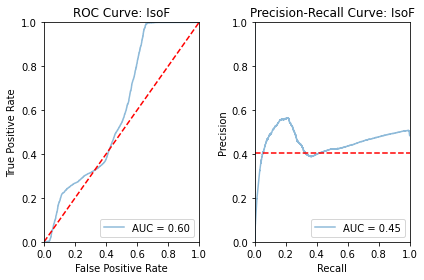

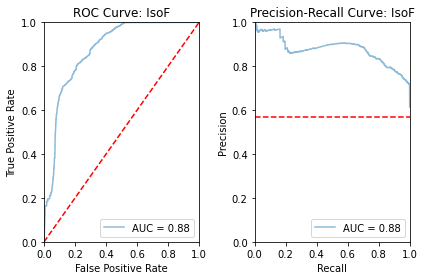

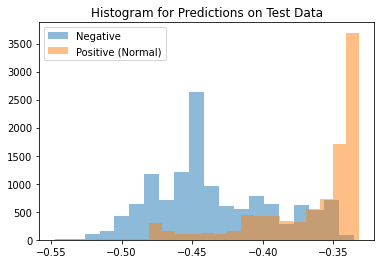

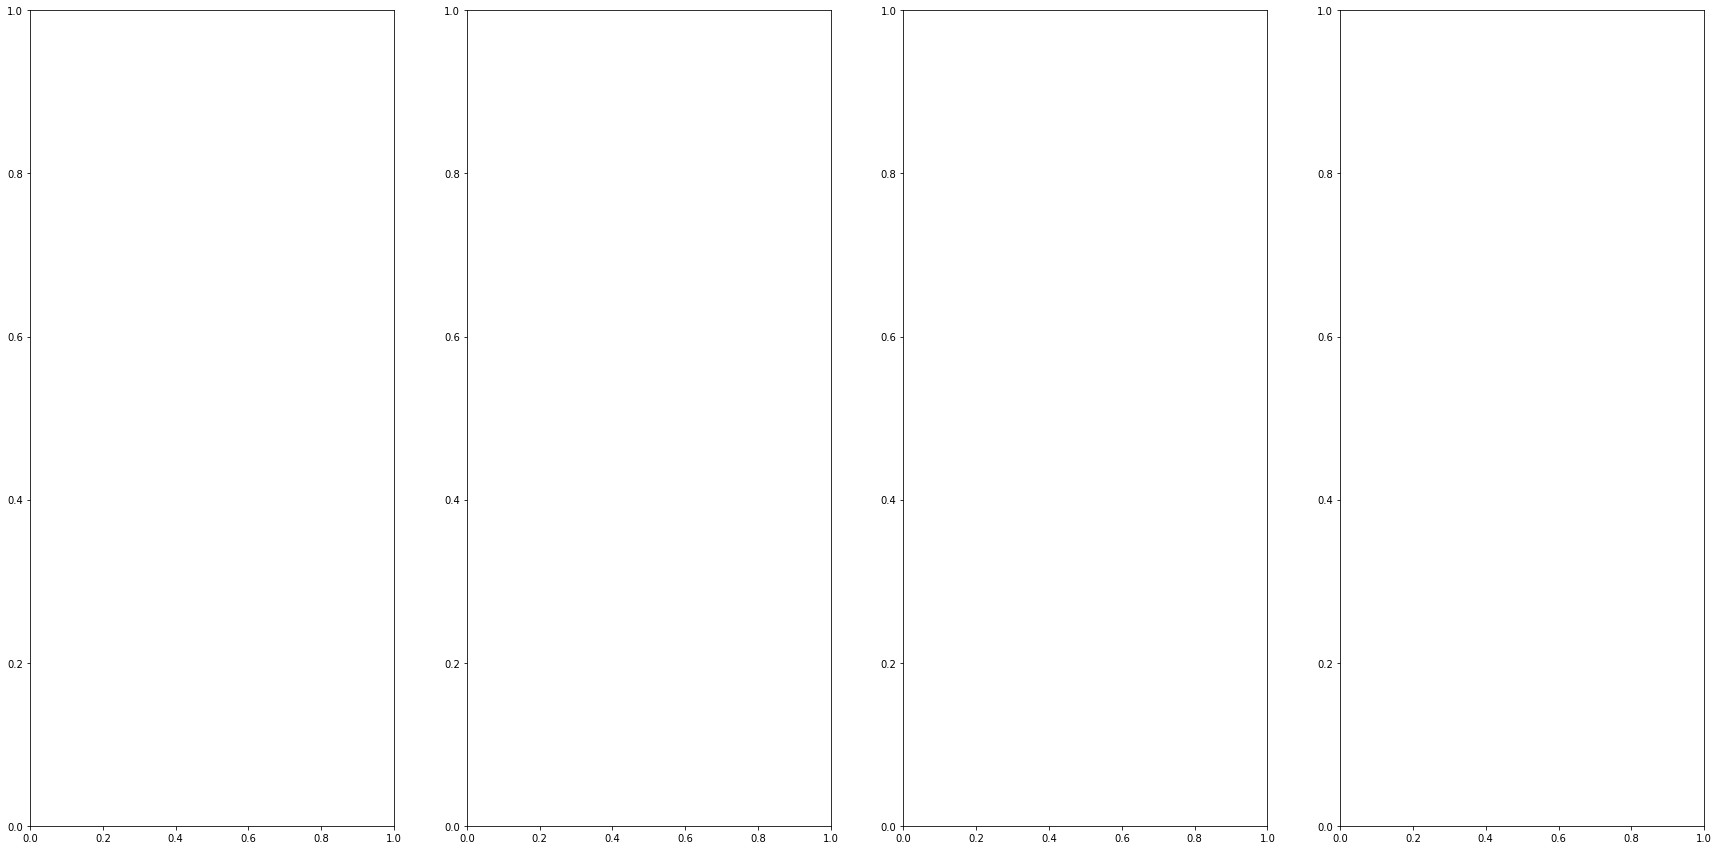

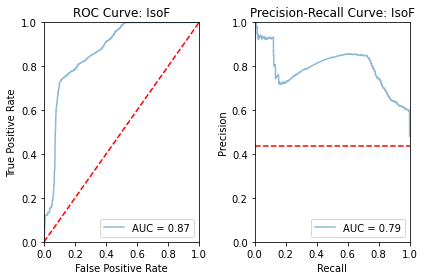

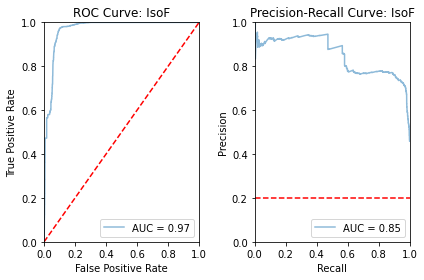

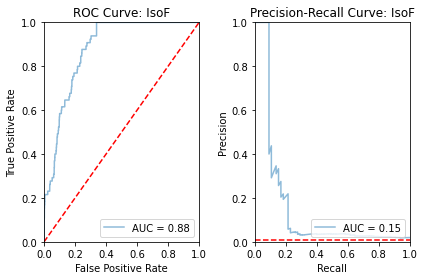

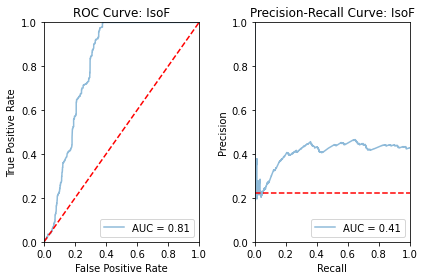

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


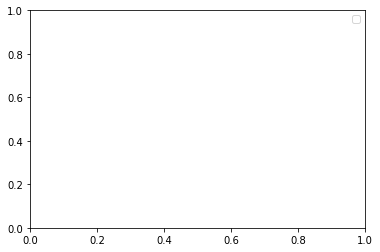

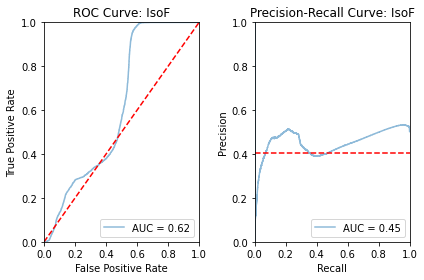

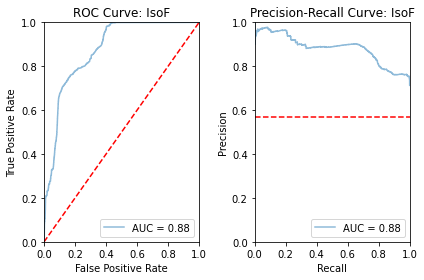

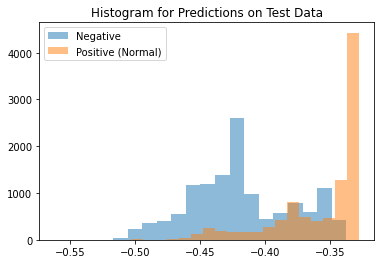

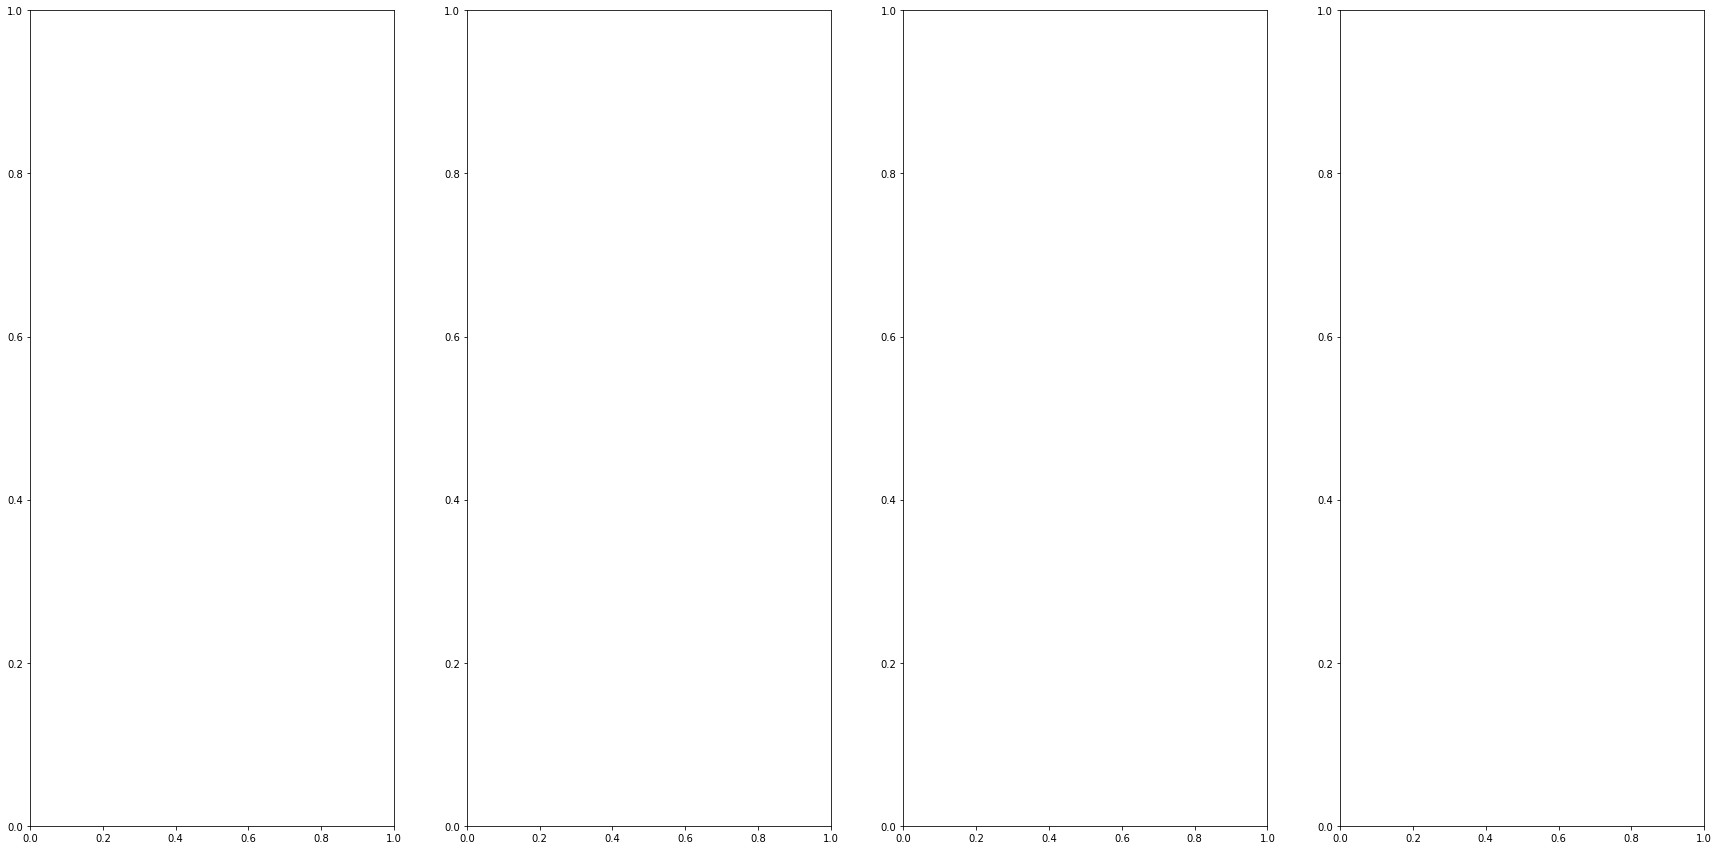

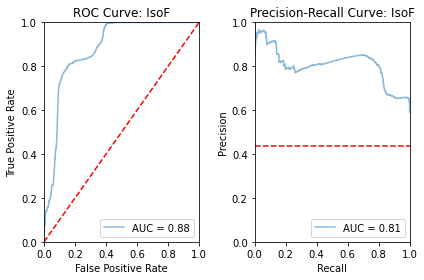

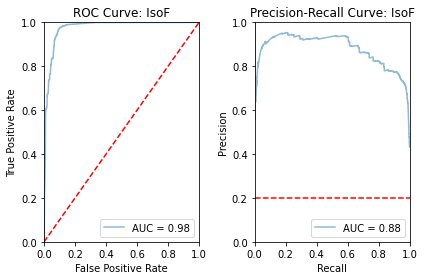

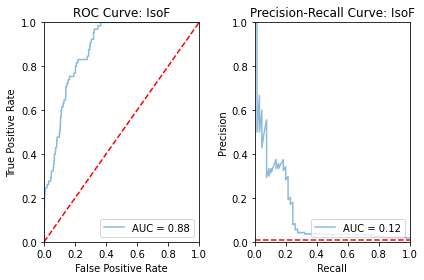

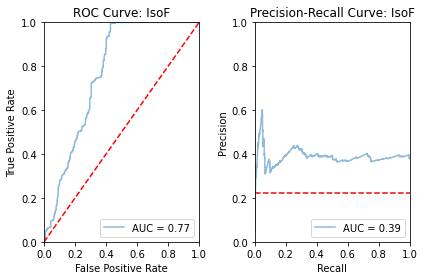

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


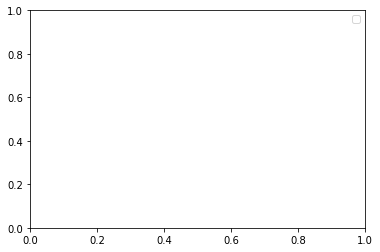

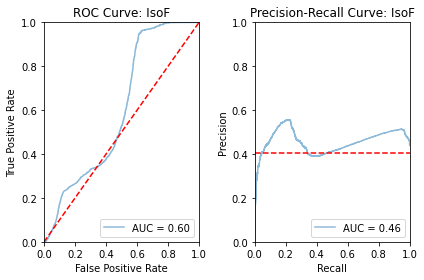

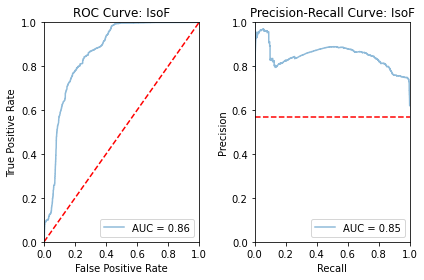

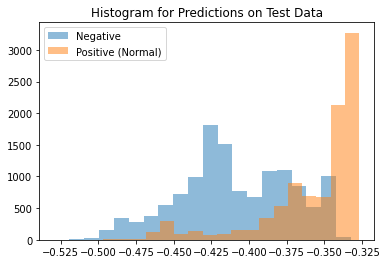

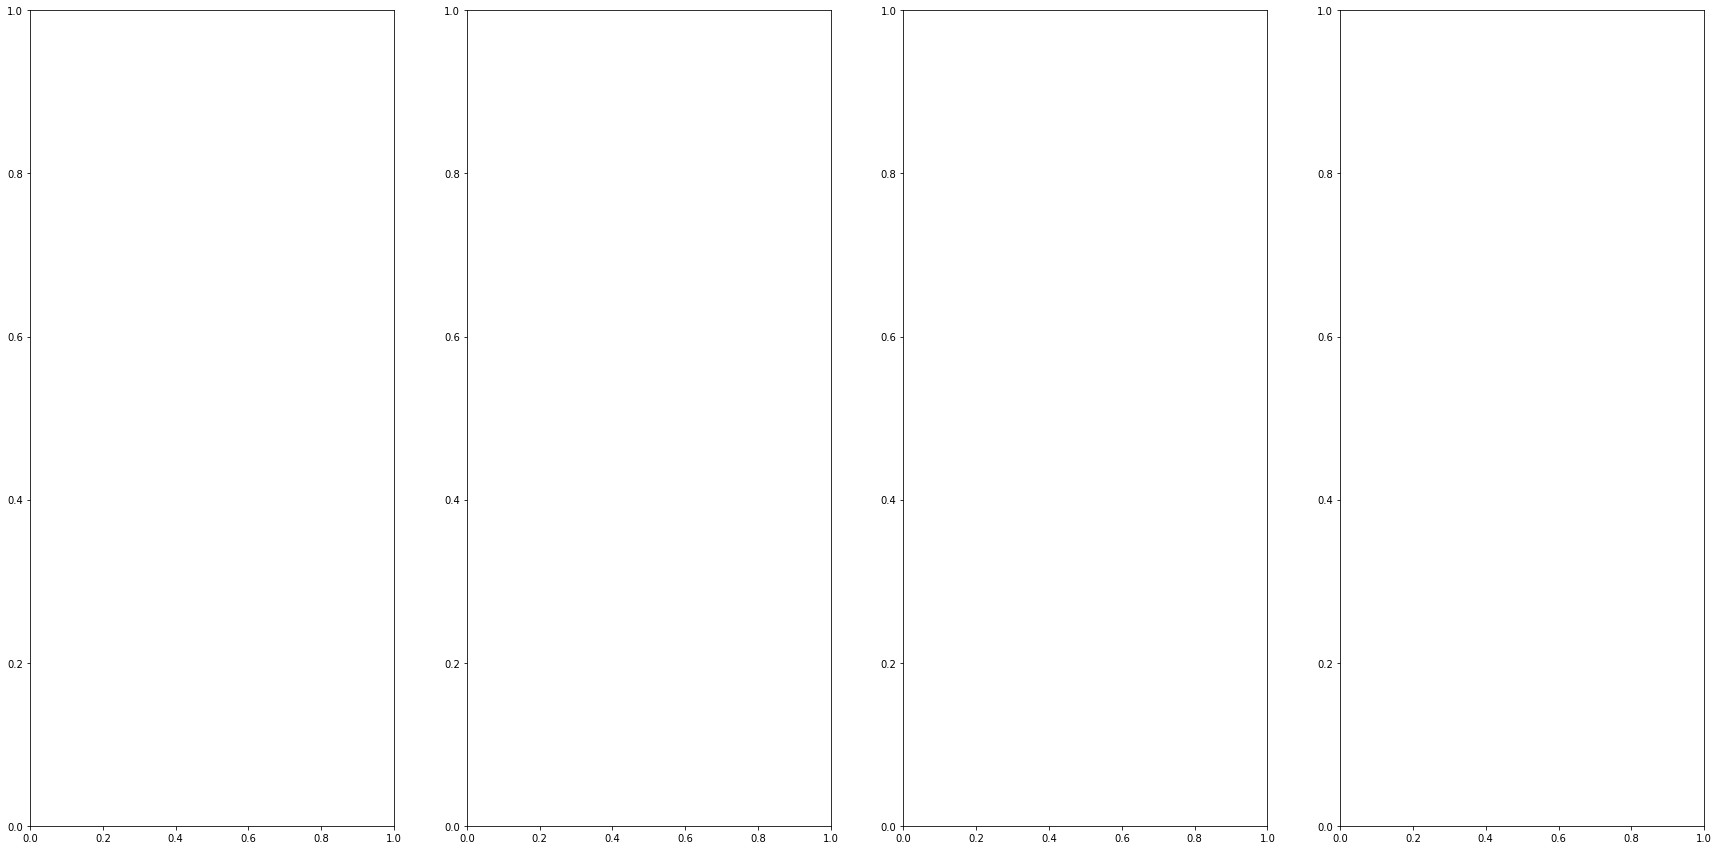

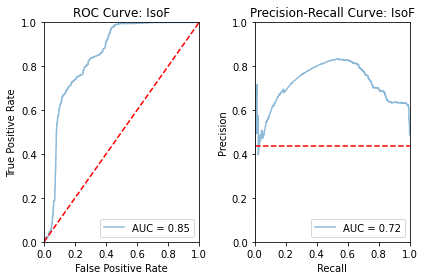

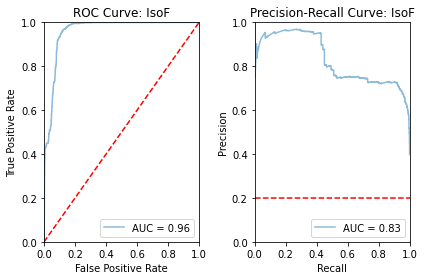

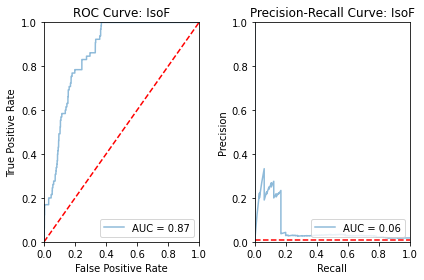

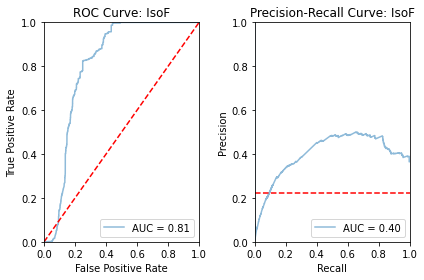

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


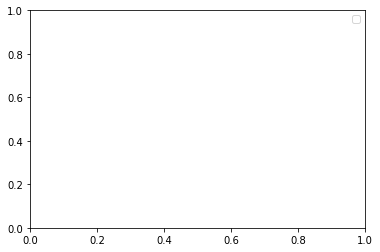

AUPR (Train): 0.45467335323599506+-0.0009427780417930774
AUPR (Test): 0.8693491483967858+-0.014120375652915181


0         1         2  AUPR Mean  AUPR Std
1  0.791164  0.806908  0.715674   0.771249  0.048768
2  0.851071  0.876904  0.828373   0.852116  0.024282
3  0.151022  0.123789  0.058932   0.111248  0.047309
4  0.407493  0.387398  0.397034   0.397308  0.010050

([0.454235002851943, 0.4538020549713374, 0.4559830018847049],
 [0.8765230878848228, 0.8819015236529724, 0.8496228336525621],
 {0: [0.791164024133618,
   0.8510707688992215,
   0.15102223888504543,
   0.407492569736754],
  1: [0.8069084088491786,
   0.8769041513131456,
   0.12378879545003728,
   0.3873984064361111],
  2: [0.7156744963425171,
   0.8283734124400753,
   0.05893185007663453,
   0.3970337122737577]})

In [18]:
model_name = "IsoF"
# params_dict = {
#     "n_estimators": [50, 100],
#           "contamination": ["auto", 0.25],
#           "max_samples": ["auto", 0.9, 1.],
#           "max_features": [1.0]
#          }

# best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
best_params = {
    "n_estimators": 50,
          "contamination": "auto",
          "max_samples": "auto",
          "max_features": 1.0
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Get Min CV Score
Train


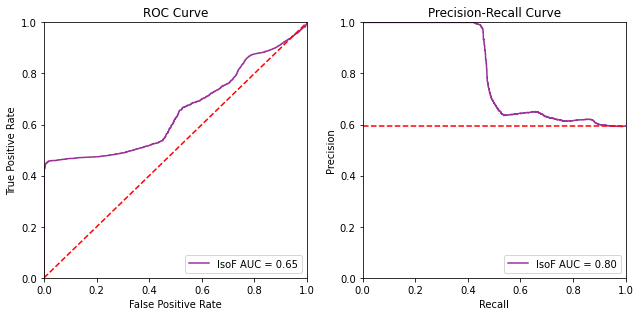

Test


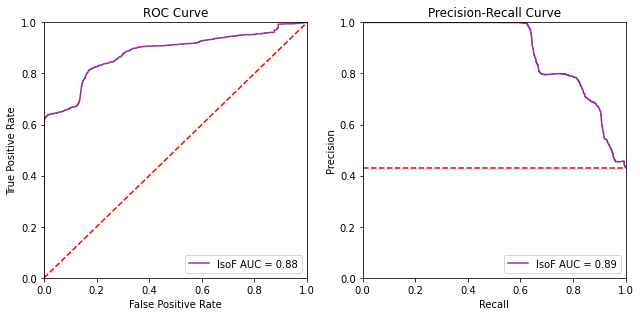

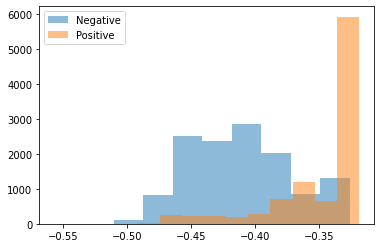

{'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}


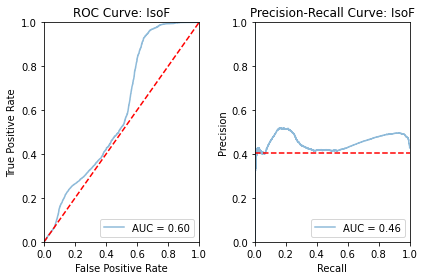

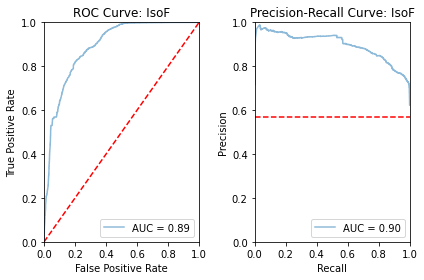

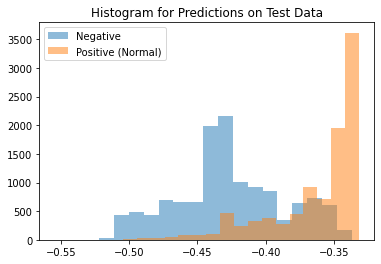

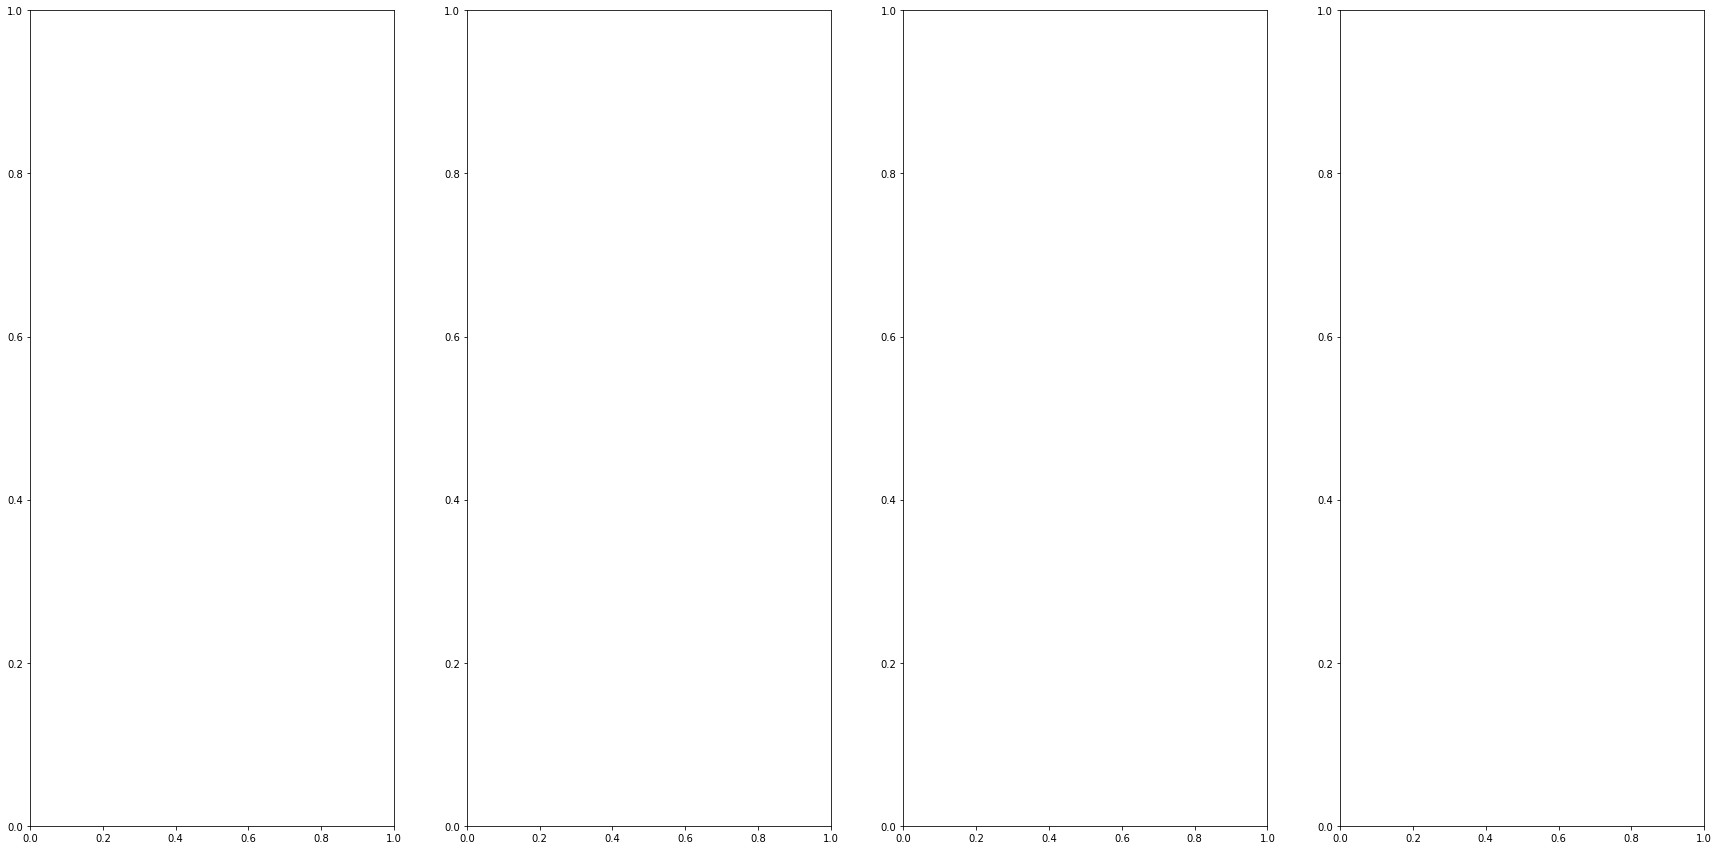

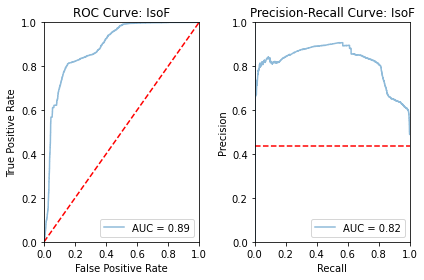

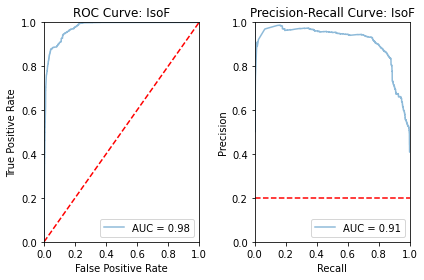

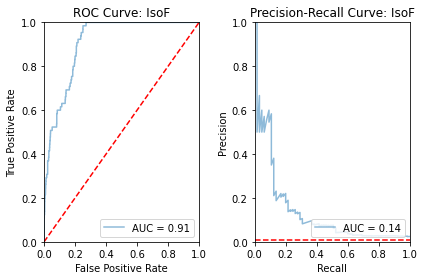

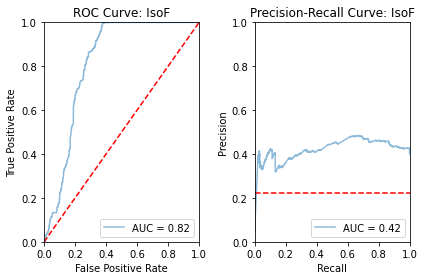

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


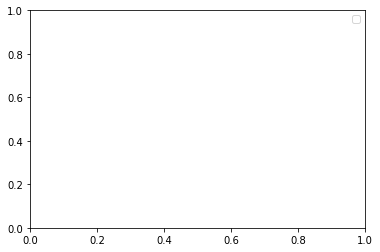

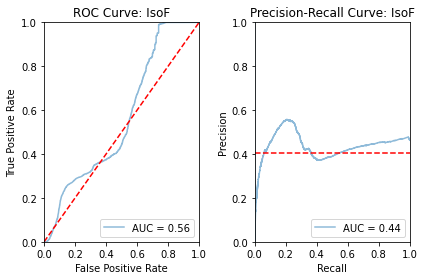

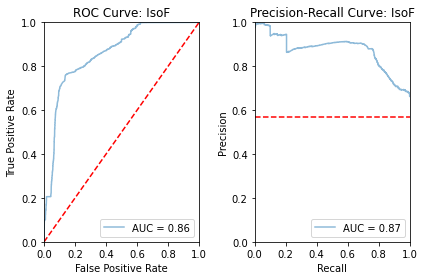

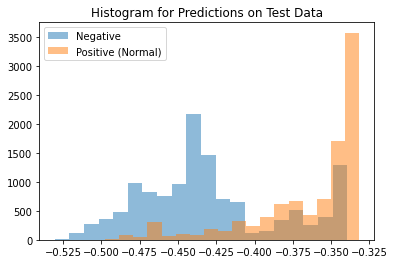

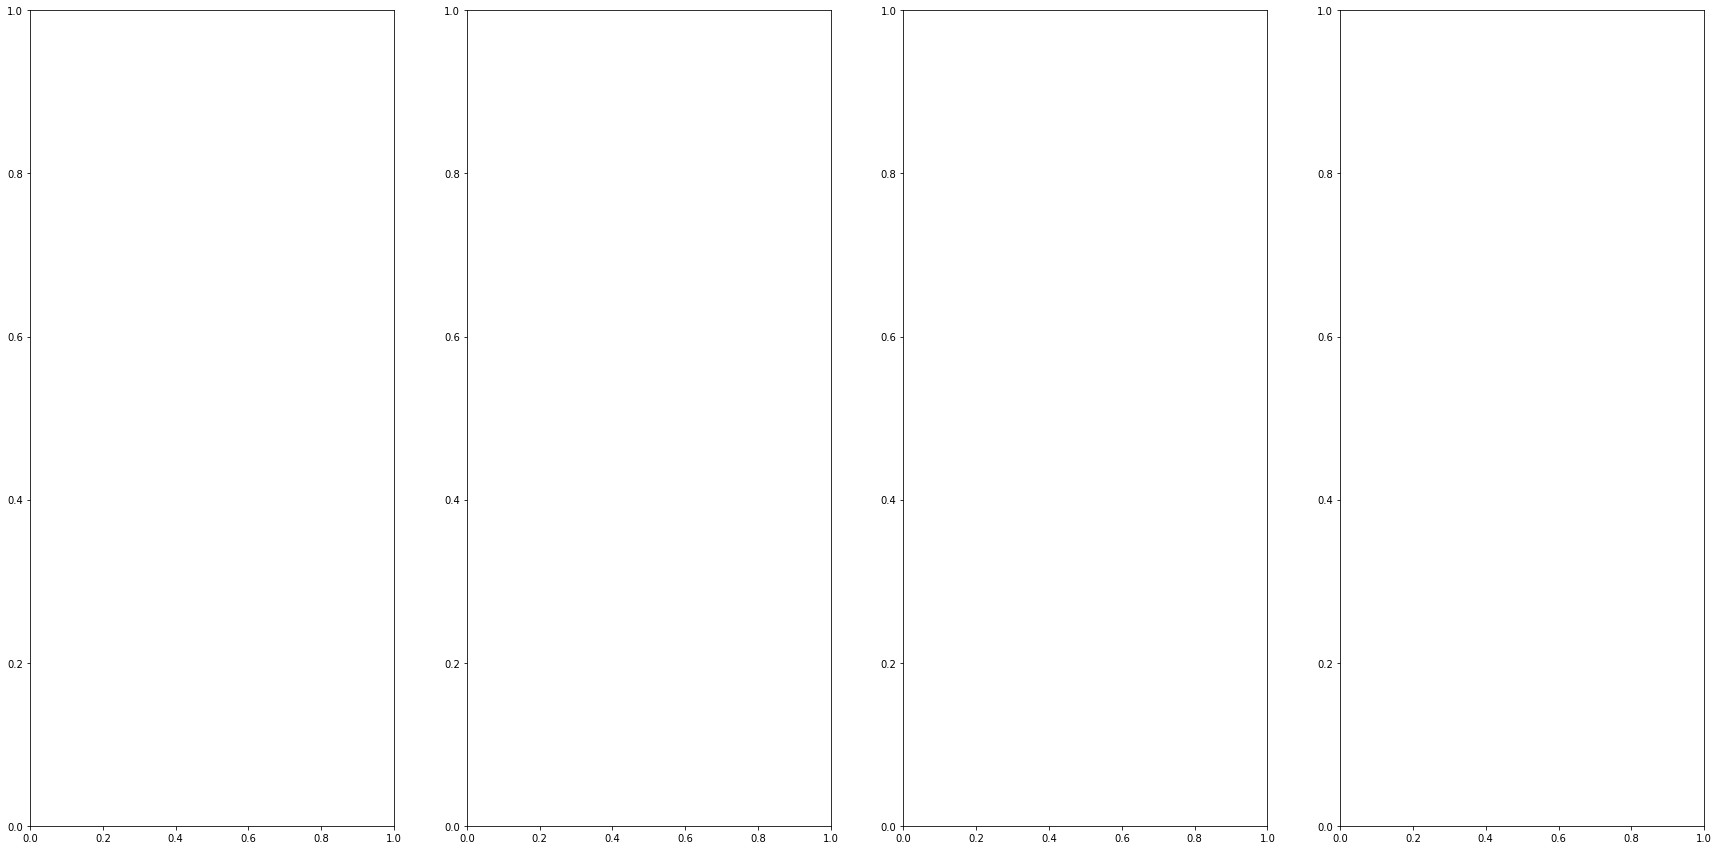

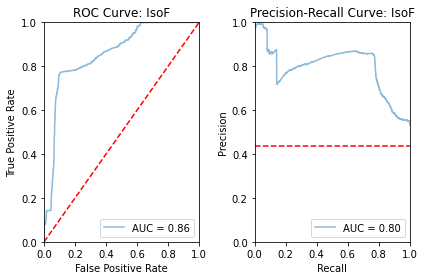

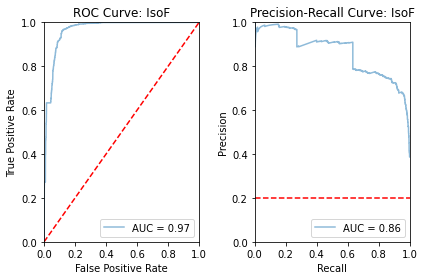

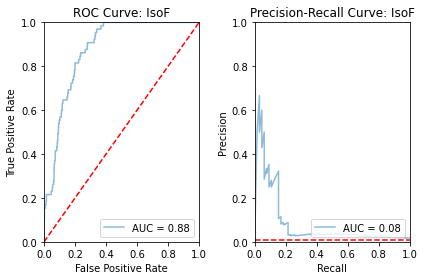

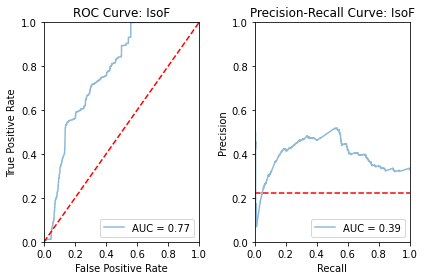

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


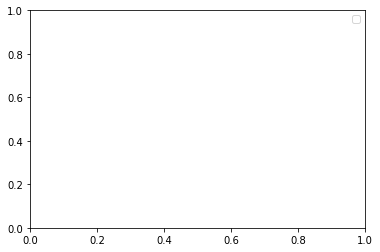

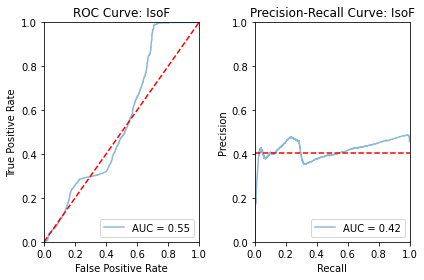

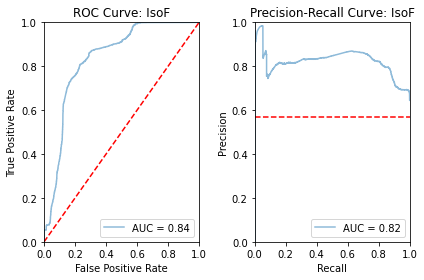

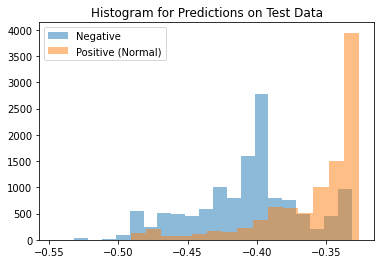

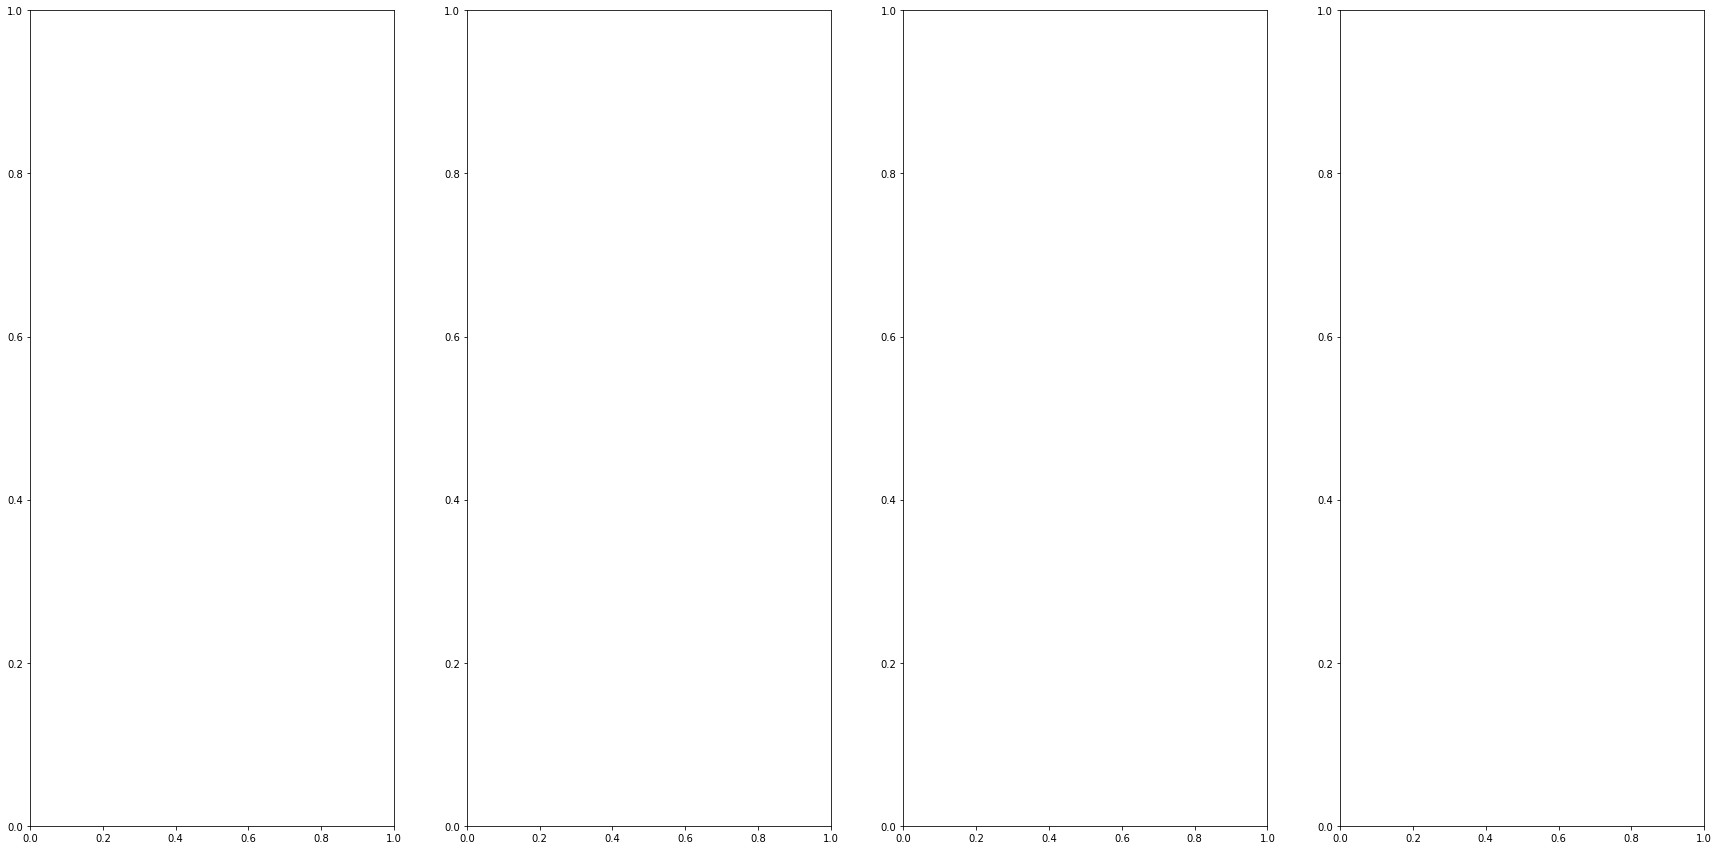

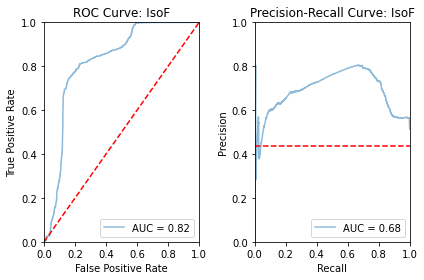

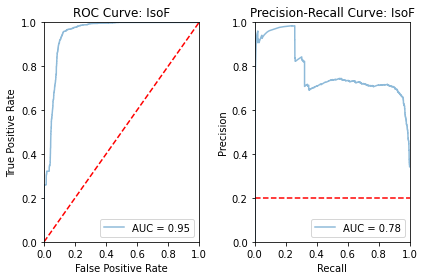

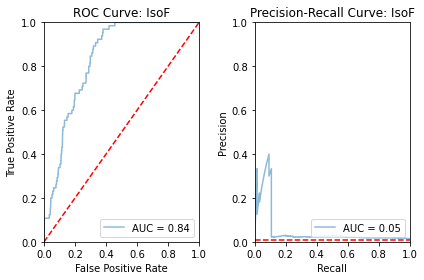

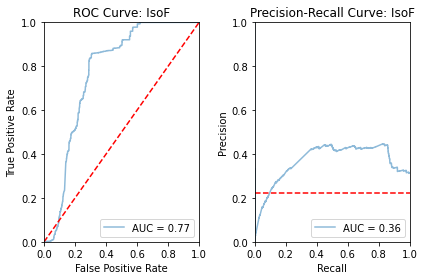

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


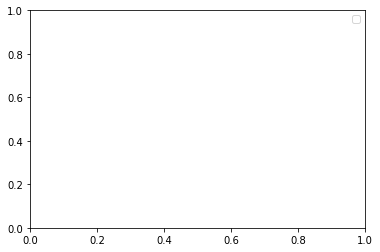

AUPR (Train): 0.438014401809816+-0.013792460421694437
AUPR (Test): 0.8653978763554105+-0.031437086952938564


0         1         2  AUPR Mean  AUPR Std
1  0.818083  0.795586  0.681940   0.765203  0.072980
2  0.908187  0.863167  0.778656   0.850003  0.065761
3  0.135192  0.083846  0.047959   0.088999  0.043844
4  0.421372  0.391698  0.362725   0.391932  0.029325

([0.45517502968806534, 0.43746419277935855, 0.4214039829620242],
 [0.8983455156296514, 0.8747750809498523, 0.8230730324867281],
 {0: [0.8180830420974055,
   0.9081869143770693,
   0.13519151258359244,
   0.4213724071155063],
  1: [0.7955857532108094,
   0.8631673513051391,
   0.0838462557237371,
   0.3916975416702606],
  2: [0.6819403300025271,
   0.7786559072786637,
   0.0479585287594344,
   0.3627247483700824]})

In [19]:
model_name = "IsoF"
params_dict = {
    "n_estimators": [50, 100],
          "contamination": ["auto", 1 - np.sum(y)/len(y)],
          "max_samples": ["auto", 0.9, 1.],
          "max_features": [1.0]
         }
# params_dict = {
#     "n_estimators": [50],
#           "contamination": ["auto"],
#           "max_samples": ["auto"],
#           "max_features": [1.0]
#          }

best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
# best_params = {
#     "n_estimators": 50,
#           "contamination": "auto",
#           "max_samples": "auto",
#           "max_features": 1.0
#          }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_neighbors': 5, 'contamination': 'auto', 'leaf_size': 30, 'novelty': True}


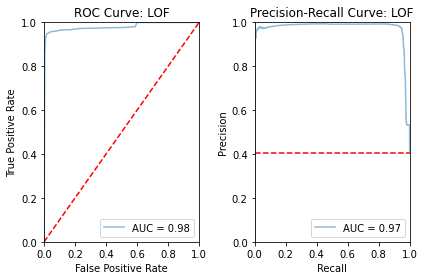

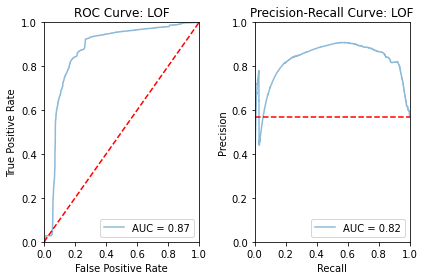

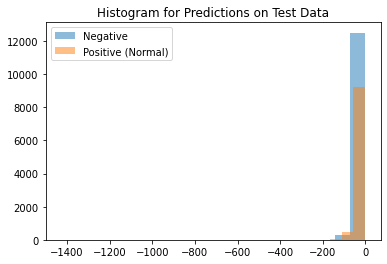

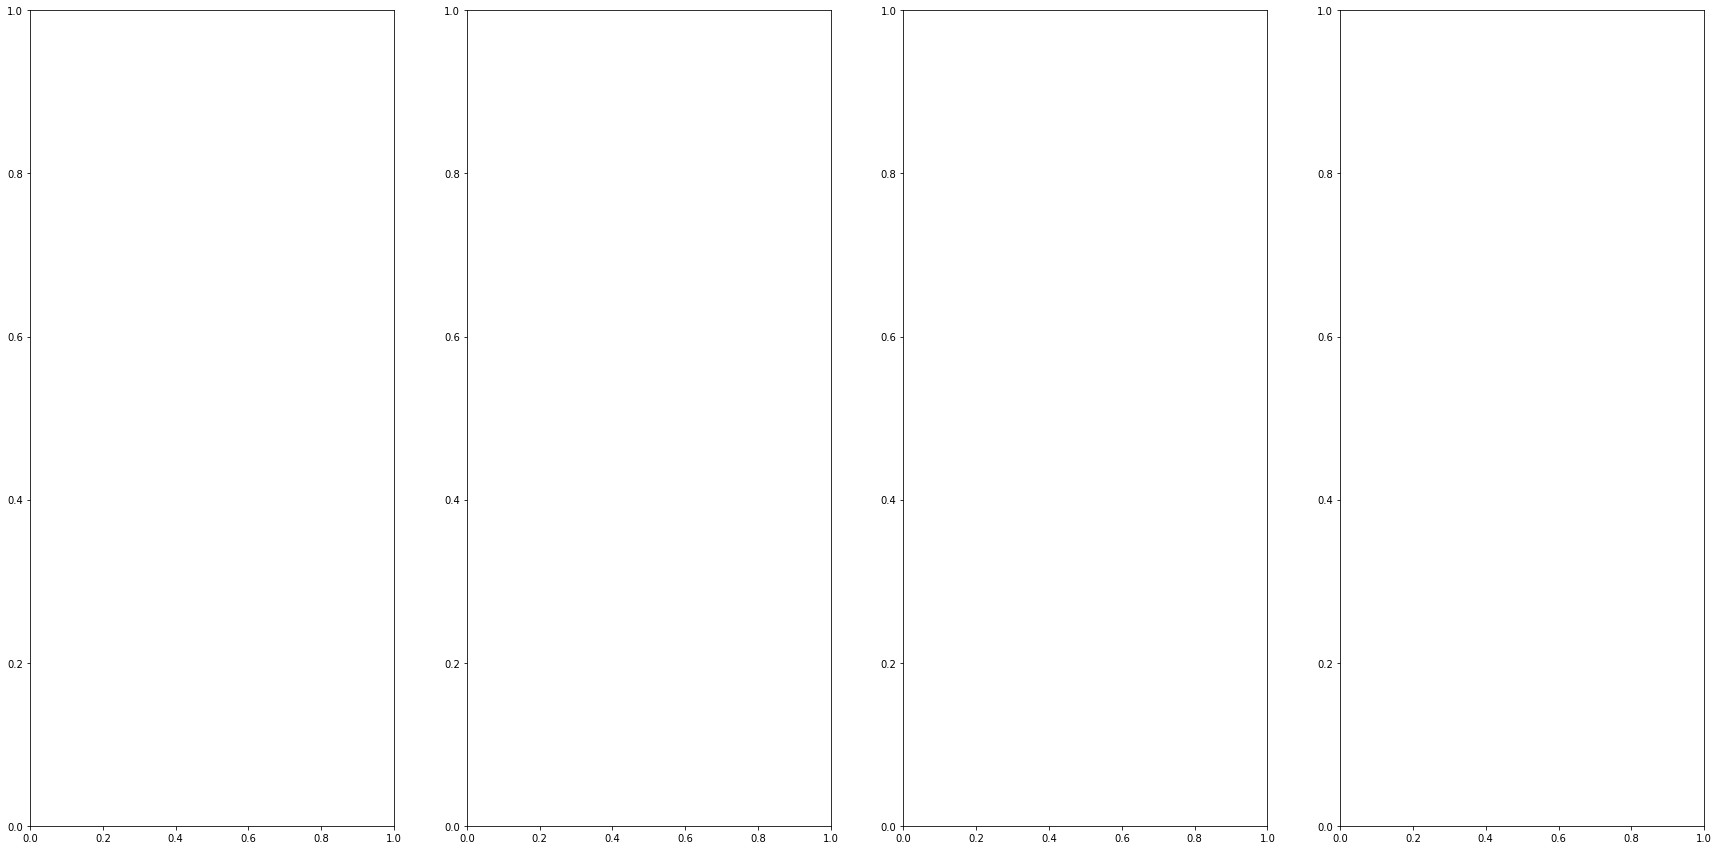

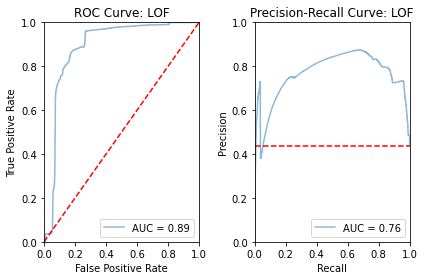

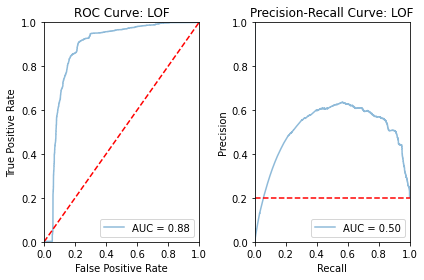

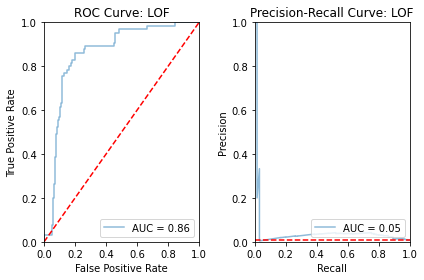

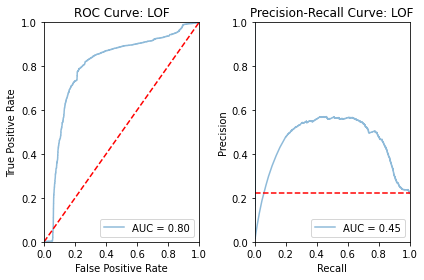

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


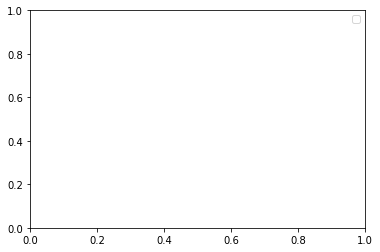

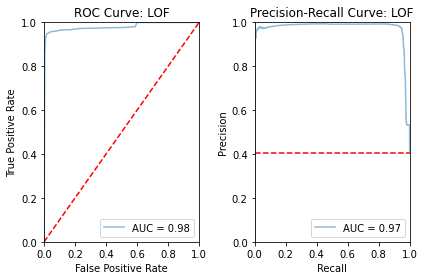

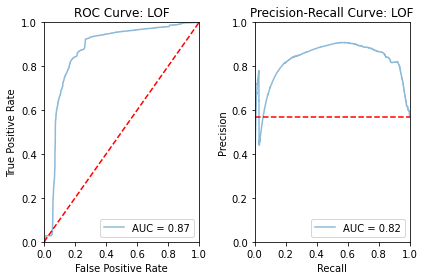

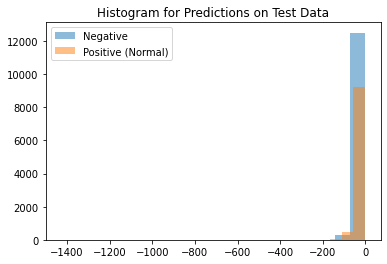

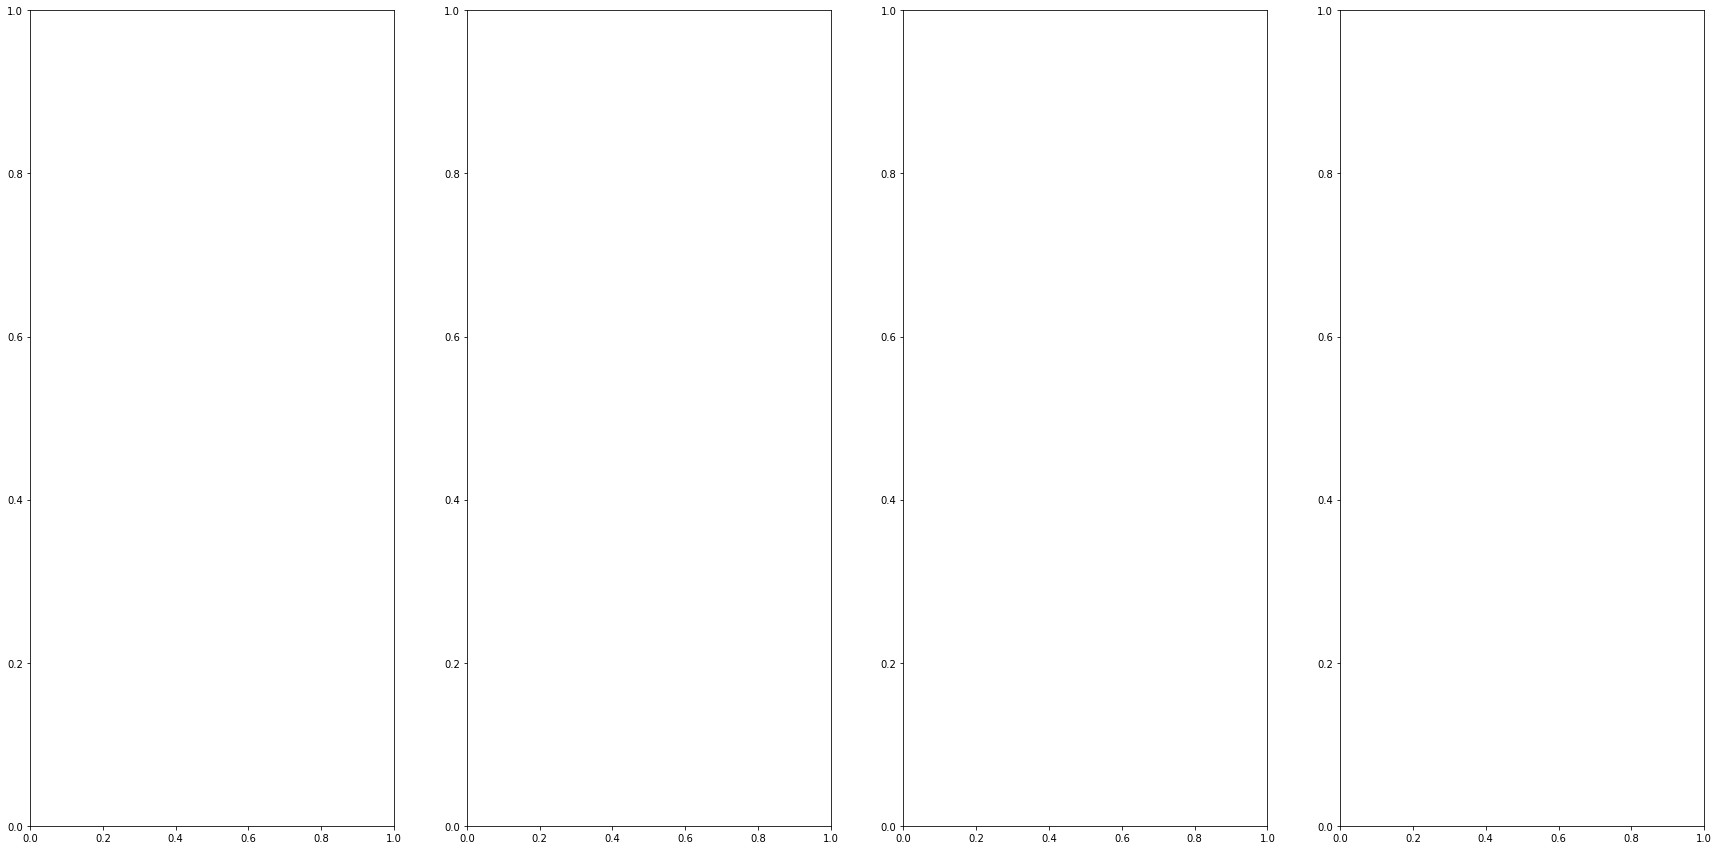

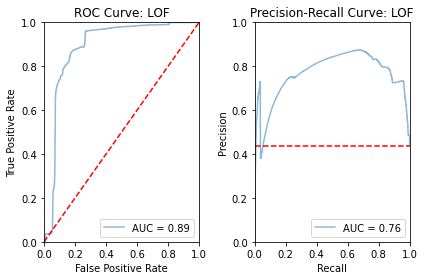

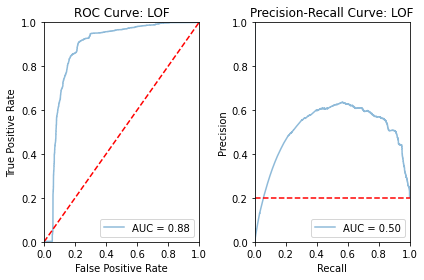

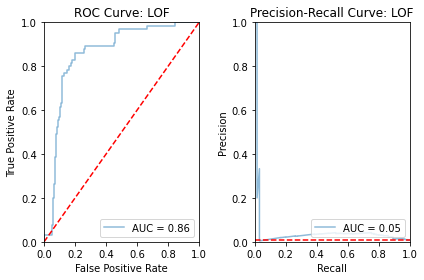

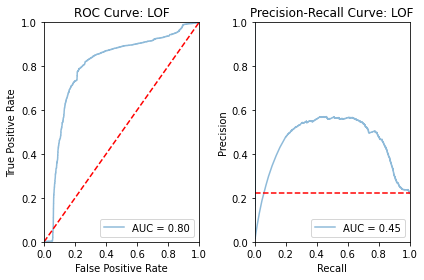

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


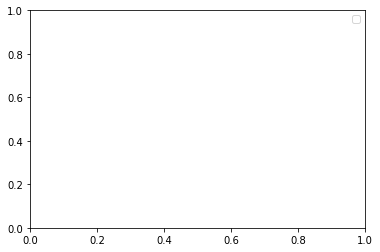

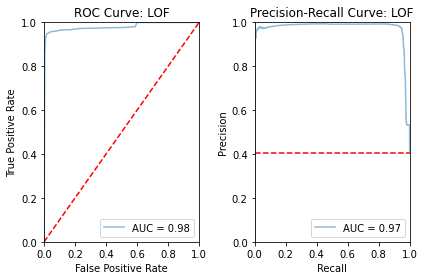

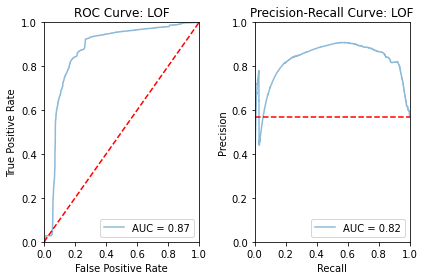

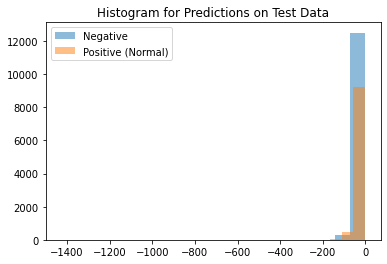

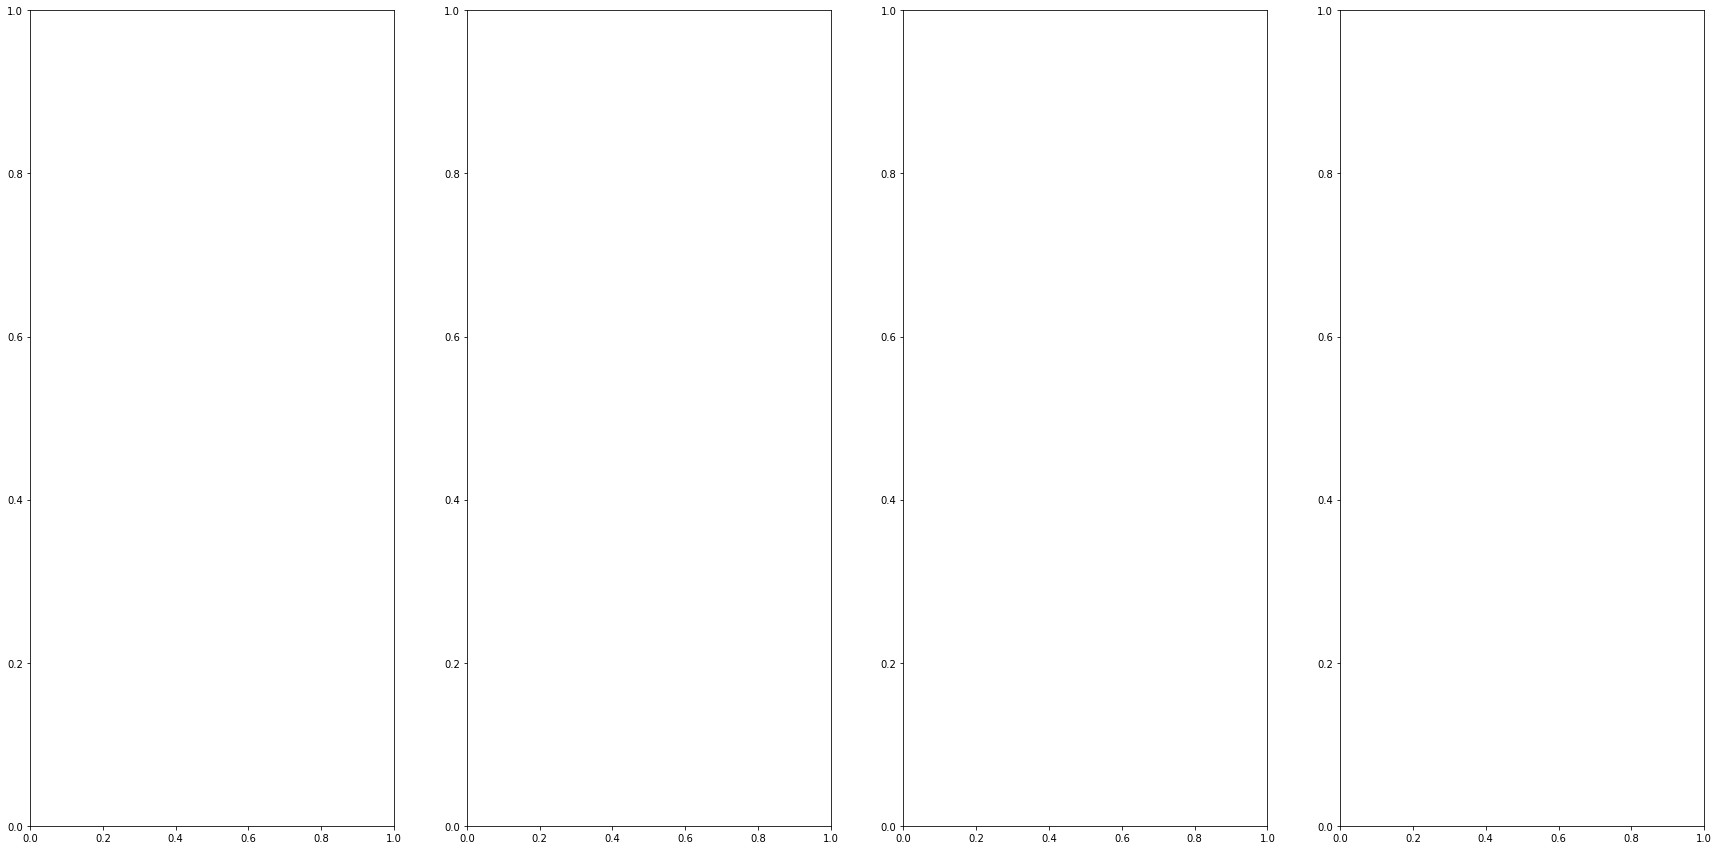

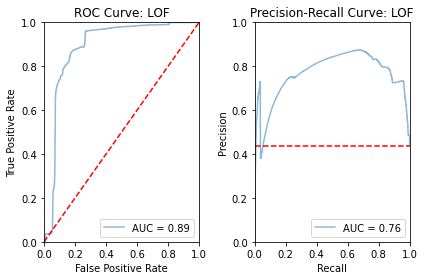

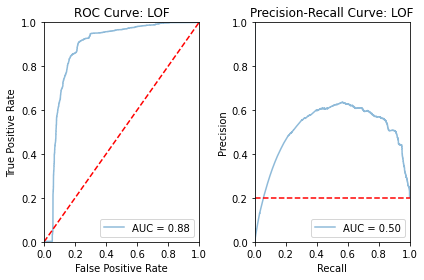

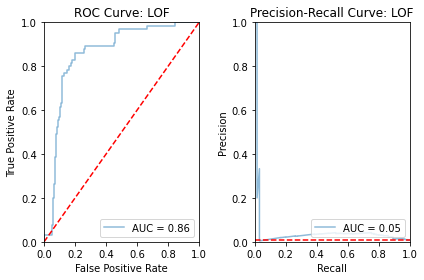

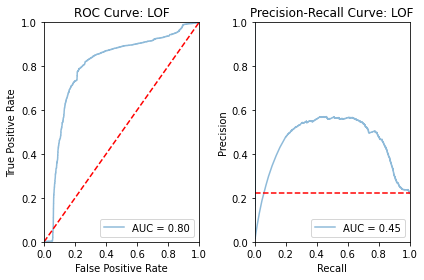

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


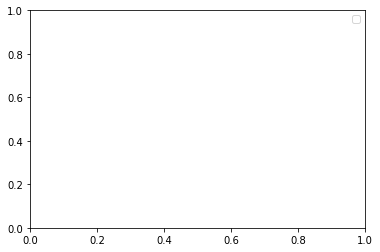

AUPR (Train): 0.9735745787722876+-0.0
AUPR (Test): 0.823648929967444+-0.0


0         1         2  AUPR Mean      AUPR Std
1  0.758786  0.758786  0.758786   0.758786  0.000000e+00
2  0.501287  0.501287  0.501287   0.501287  0.000000e+00
3  0.046297  0.046297  0.046297   0.046297  8.498375e-18
4  0.451314  0.451314  0.451314   0.451314  0.000000e+00

([0.9735745787722876, 0.9735745787722876, 0.9735745787722876],
 [0.823648929967444, 0.823648929967444, 0.823648929967444],
 {0: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467],
  1: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467],
  2: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467]})

In [20]:
model_name ="LOF"
# params_dict = {
#     "n_neighbors": [5, 10, 15],
#     "contamination": ["auto", 0.25],
#     "leaf_size": [30, 8],
#     "novelty": [True]
#          }

# best_params = cross_validate_unsupervised(LOF, params_dict, model_name, seed=False)
best_params = {
    "n_neighbors": 5,
    "contamination": "auto",
    "leaf_size": 30,
    "novelty": True
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = LOF(**best_params)
    
    model.fit(X[y == 1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_neighbors': 5, 'contamination': 0.405512054308389, 'leaf_size': 30, 'novelty': True}


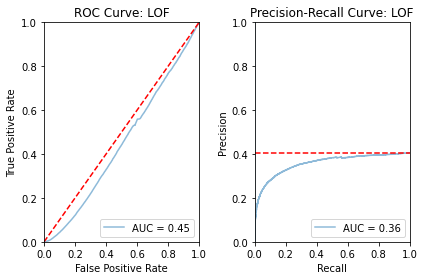

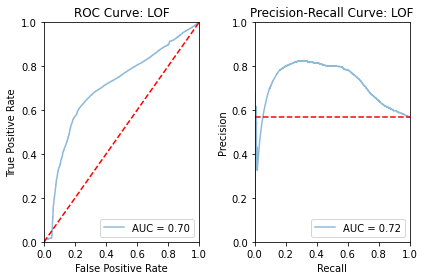

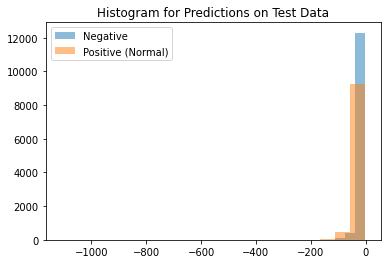

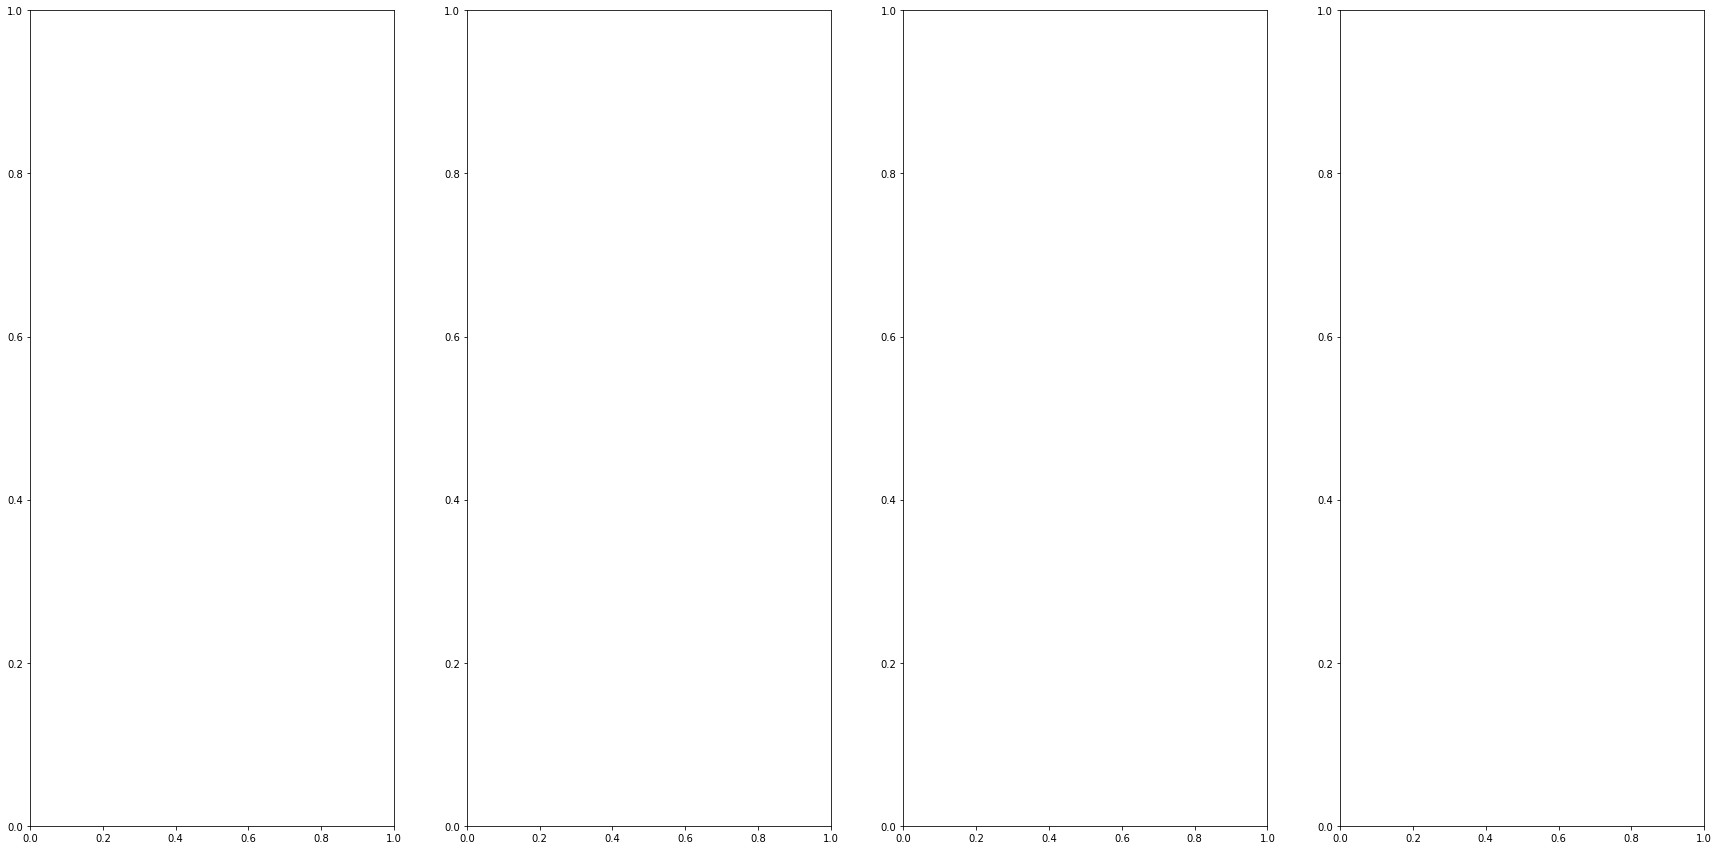

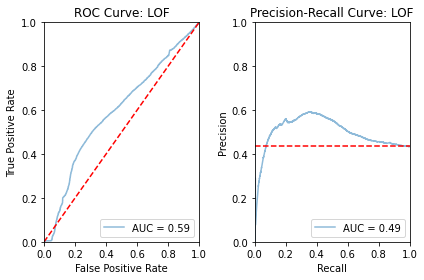

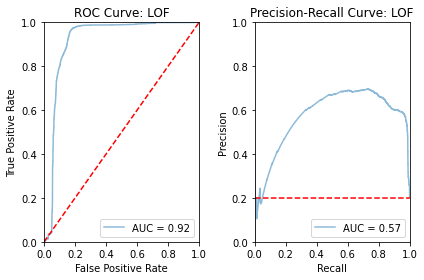

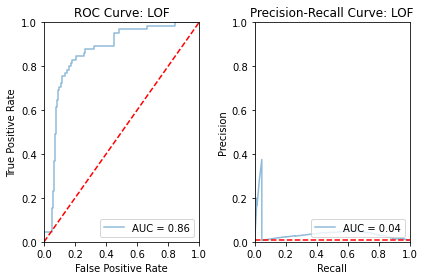

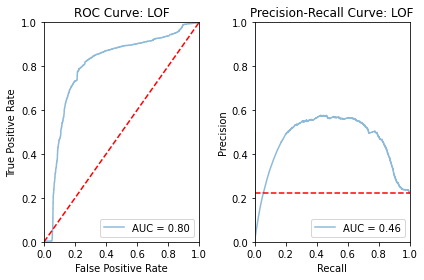

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


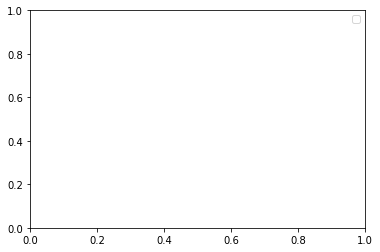

AUPR (Train): 0.35756333836270904+-0.0
AUPR (Test): 0.7184306373293136+-0.0


0  AUPR Mean  AUPR Std
1  0.494760   0.494760       NaN
2  0.566976   0.566976       NaN
3  0.039250   0.039250       NaN
4  0.455199   0.455199       NaN

([0.35756333836270904],
 [0.7184306373293136],
 {0: [0.49476040843222563,
   0.5669762676691681,
   0.0392500554419305,
   0.45519852756271584]})

In [21]:
model_name ="LOF"
# params_dict = {
#     "n_neighbors": [5, 10, 15],
#     "contamination": ["auto", 1 - np.sum(y)/len(y)],
#     "leaf_size": [30, 8],
#     "novelty": [True]
#          }

# best_params = cross_validate_unsupervised(LOF, params_dict, model_name, seed=False)
best_params = {
    "n_neighbors": 5,
    "contamination": 1 - np.sum(y)/len(y),
    "leaf_size": 30,
    "novelty": True
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = LOF(**best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks